In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.animation as animation
from matplotlib import ticker
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from matplotlib.animation import FuncAnimation,PillowWriter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import f_oneway
# from scipy.stats import friedman, kruskalwallis
from scipy.stats import friedmanchisquare
from scipy.stats.mstats import kruskal
# from lmfit import Model
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [75]:
columns = [str(year) for year in range(2011, 2023)]
rows = ['Population (Million)','Population Change(%)','Divorce (Couples)', 'Married (Couples)', 'Divorce (%)','Birth (population)','Birth Rate (%)','Death (population)', 'Death Rate (%)', 'GDP (Billion Dollars)','GDP Change (%)','GDP Per Capita (Dollars)', 'GDP Per Capita Rate (%)', 'GDP Per Capita Change (%)' ]
df = pd.DataFrame(index=rows, columns=columns)

# pop_data = [68.712,69.157,69.579,69.961,70.294,70.607,70.898,71.128,71.308,71.476,71.601,71.697]
pop_data = [68.712846,69.157023,69.578602,69.960943,70.294397,70.607037,70.898202,71.127802,71.307763,71.475664,71.601103,71.697030]
pop_change_rate = [0.65,0.65, 0.61,0.55,0.48,0.44,0.41,0.32,0.25,0.24,0.18,0.13]
div_data = [109312, 111377,107031, 111810, 117880, 118539, 121617, 127265, 128514, 121011, 110942, 146159]
marriage_data = [308048, 314338,295519,296258,304392, 307746,297501,307936,328875,271344,240979,305487]
birth_data = [float('nan'),818901,782129,776370,736352,704058,7002755,666109,618193,587368,544570,502107]
birth_rate = [11.682,11.461,11.240,11.084,10.929,10.773,10.618,10.462,10.276,10.090,9.904,9.718]
death_data = [float('nan'),423213,438648,448601,456391,480434,468911,473541,506211,501438,563650,595965]
death_rate = [6.39,6.46,6.55,6.63,6.72,6.81,6.9,7.03,7.14,7.26,7.92,8.31]
GDP_data = [370.82,397.56,420.33,407.34,401.30,413.37,456.3,506.75,543.98,500.46,505.57,495.34]
# GDP_rate = [0.8,7.2,2.7,1,3.1,3.4,4.2,4.2,2.1,-6.1,1.5,2.6]
GDP_change =[0.08712,0.07211,0.05727,-0.03090,-0.01482,0.03007,0.10399,0.11041,0.07346,-0.08000,0.01021,-0.02023]
GDP_per_capita = [5396.6,5748.6,6041.1,5822.4,5708.8,5854.5,6436.8,7124.6,7628.6,7001.8,7060.9,6908.8]
GDP_per_capita_rate = [8.01,6.52,5.09,-3.62,-1.95,2.55,9.95,10.68,7.07,-8.22,0.84,-2.15]
GDP_per_capita_change = [0.08009,0.06521,0.05088,-0.03620,-0.01951,0.02552,0.09946,0.10685,0.07074,-0.08216,0.008844,-0.02153]
div_rate =[]

for i in range(len(df.iloc[0])):
    df.iloc[0,i] = pop_data[i]
    df.iloc[1,i] = pop_change_rate[i]
    df.iloc[2,i] = div_data[i]
    df.iloc[3,i] = marriage_data[i]
    df.iloc[4,i] = (div_data[i] / marriage_data[i]) * 100
    div_rate.append((div_data[i] / marriage_data[i]) * 100)
    df.iloc[5,i] = birth_data[i]
    df.iloc[6,i] = birth_rate[i]
    df.iloc[7,i] = death_data[i]
    df.iloc[8,i] = death_rate[i]
    df.iloc[9,i] = GDP_data[i]
    # df.iloc[10,i] = GDP_rate[i]
    df.iloc[10,i] = GDP_change[i]
    df.iloc[11,i] = GDP_per_capita[i]
    df.iloc[12,i] = GDP_per_capita_rate[i] 
    df.iloc[13,i] = GDP_per_capita_change[i]

# print('Divorce rate net change (on average) =',df.loc['Divorce (%)'].mean())
df

2011       2012       2013       2014  \
Population (Million)       68.712846  69.157023  69.578602  69.960943   
Population Change(%)            0.65       0.65       0.61       0.55   
Divorce (Couples)             109312     111377     107031     111810   
Married (Couples)             308048     314338     295519     296258   
Divorce (%)                35.485379  35.432242  36.217976  37.740753   
Birth (population)               NaN     818901     782129     776370   
Birth Rate (%)                11.682     11.461      11.24     11.084   
Death (population)               NaN     423213     438648     448601   
Death Rate (%)                  6.39       6.46       6.55       6.63   
GDP (Billion Dollars)         370.82     397.56     420.33     407.34   
GDP Change (%)               0.08712    0.07211    0.05727    -0.0309   
GDP Per Capita (Dollars)      5396.6     5748.6     6041.1     5822.4   
GDP Per Capita Rate (%)         8.01       6.52       5.09      -3.62   
GDP Per Capita Change (%)    0.08009    0.06521    0.05088    -0.0362   

                                2015       2016       2017       2018  \
Population (Million)       70.294397  70.607037  70.898202  71.127802   
Population Change(%)            0.48       0.44       0.41       0.32   
Divorce (Couples)             117880     118539     121617     127265   
Married (Couples)             304392     307746     297501     307936   
Divorce (%)                38.726379  38.518454  40.879526  41.328393   
Birth (population)            736352     704058    7002755     666109   
Birth Rate (%)                10.929     10.773     10.618     10.462   
Death (population)            456391     480434     468911     473541   
Death Rate (%)                  6.72       6.81        6.9       7.03   
GDP (Billion Dollars)          401.3     413.37      456.3     506.75   
GDP Change (%)              -0.01482    0.03007    0.10399    0.11041   
GDP Per Capita (Dollars)      5708.8     5854.5     6436.8     7124.6   
GDP Per Capita Rate (%)        -1.95       2.55       9.95      10.68   
GDP Per Capita Change (%)   -0.01951    0.02552    0.09946    0.10685   

                                2019       2020       2021       2022  
Population (Million)       71.307763  71.475664  71.601103   71.69703  
Population Change(%)            0.25       0.24       0.18       0.13  
Divorce (Couples)             128514     121011     110942     146159  
Married (Couples)             328875     271344     240979     305487  
Divorce (%)                39.076853  44.596895  46.038037  47.844589  
Birth (population)            618193     587368     544570     502107  
Birth Rate (%)                10.276      10.09      9.904      9.718  
Death (population)            506211     501438     563650     595965  
Death Rate (%)                  7.14       7.26       7.92       8.31  
GDP (Billion Dollars)         543.98     500.46     505.57     495.34  
GDP Change (%)               0.07346      -0.08    0.01021   -0.02023  
GDP Per Capita (Dollars)      7628.6     7001.8     7060.9     6908.8  
GDP Per Capita Rate (%)         7.07      -8.22       0.84      -2.15  
GDP Per Capita Change (%)    0.07074   -0.08216   0.008844   -0.02153

      Divorce Rate  Population Growth  Birth Rate  Death Rate  GDP Growth
2011     35.485379               0.65      11.682        6.39     0.08712
2012     35.432242               0.65      11.461        6.46     0.07211
2013     36.217976               0.61      11.240        6.55     0.05727
2014     37.740753               0.55      11.084        6.63    -0.03090
2015     38.726379               0.48      10.929        6.72    -0.01482
2016     38.518454               0.44      10.773        6.81     0.03007
2017     40.879526               0.41      10.618        6.90     0.10399
2018     41.328393               0.32      10.462        7.03     0.11041
2019     39.076853               0.25      10.276        7.14     0.07346
2020     44.596895               0.24      10.090        7.26    -0.08000
2021     46.038037               0.18       9.904        7.92     0.01021
2022     47.844589               0.13       9.718        8.31    -0.02023


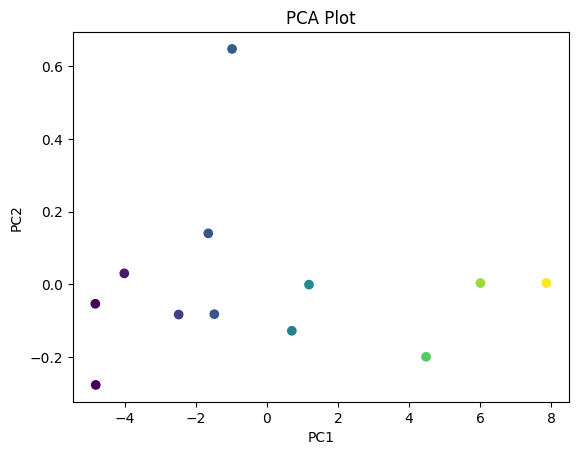

[[ 0.98038502 -0.04070963 -0.1396507   0.13282613 -0.0065455 ]
 [-0.19032032 -0.2678153  -0.8232682   0.45975522  0.05392352]
 [ 0.04745495 -0.1235307  -0.46236144 -0.8760189  -0.03606911]
 [ 0.01912806 -0.15586459  0.0779364  -0.05858389  0.98276864]
 [ 0.00235289 -0.9418408   0.28788014 -0.01188142 -0.17295733]]


array([9.95281737e-01, 3.02513046e-03, 1.50674631e-03, 1.57193732e-04,
       2.91925219e-05])

In [147]:
df6 = pd.DataFrame({
    # 'Year': [year for year in range(2011, 2020)],
    'Divorce Rate': div_rate,
    'Population Growth': pop_change_rate,
    'Birth Rate': birth_rate,
    'Death Rate': death_rate,
    'GDP Growth': GDP_change
})

print(df6)

pca5 = PCA()
pca_fit5 = pca5.fit(df6)
principal_components5 = pca_fit5.components_
explained_variance5 = pca_fit5.explained_variance_ratio_
pca_data5 = pca5.transform(df6)
plt.scatter(pca_data5[:, 0], pca_data5[:, 1], c=df6['Divorce Rate'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()

print(principal_components5)
explained_variance5

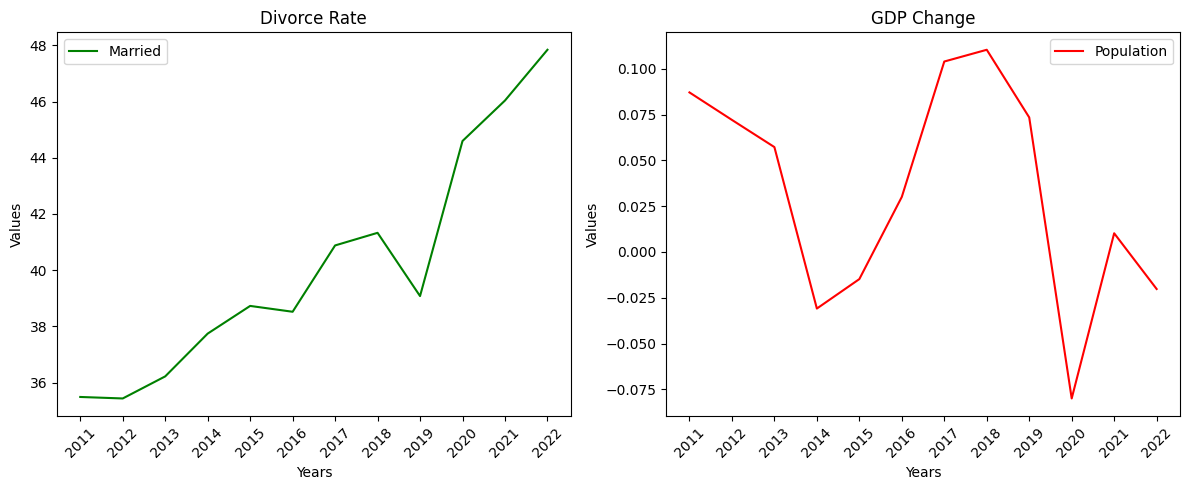

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

time = [i for i in range(2011,2023)]

ax1.set_title('Divorce Rate')
ax1.plot(time, div_rate, color='green', label='Married')
ax1.set_xlabel('Years')
ax1.set_ylabel('Values')
ax1.set_xticks(time)
ax1.set_xticklabels(time, rotation=45)
ax1.legend()

ax2.set_title('GDP Change')
ax2.plot(time, GDP_change, color='red', label='Population')
ax2.set_xlabel('Years')
ax2.set_ylabel('Values')
ax2.set_xticks(time)
ax2.set_xticklabels(time, rotation=45)
ax2.legend()

plt.tight_layout()

plt.show()

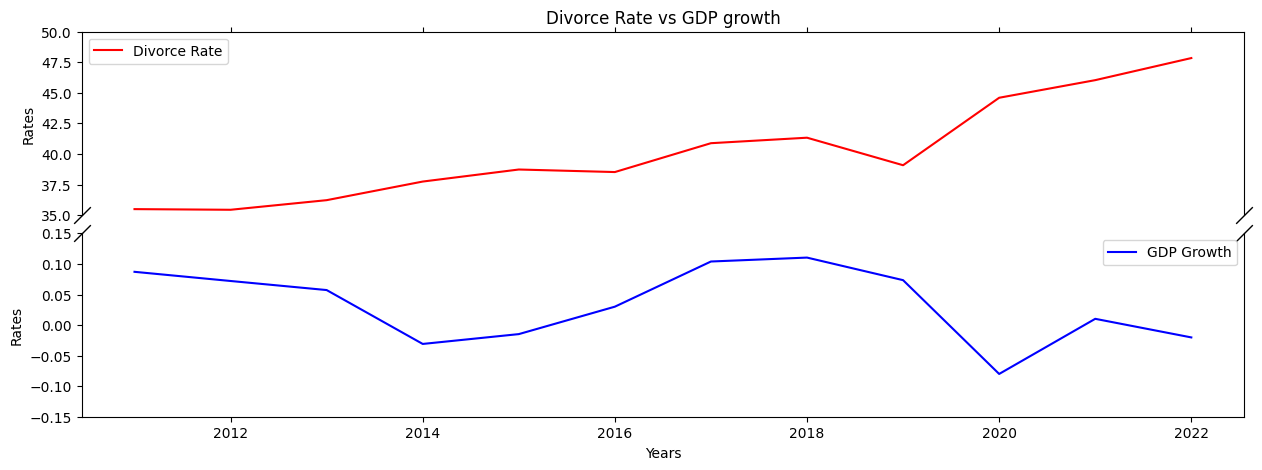

In [77]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,5))
fig.subplots_adjust(hspace=0.1) 

plt.xlabel('Years')

yearss = [i for i in range(2011,2023)]

ax1.plot(yearss, div_rate, color='red', label='Divorce Rate')
ax2.plot(yearss, GDP_change, color='blue', label='GDP Growth')

ax1.set_ylim(35, 50)
ax2.set_ylim(-0.15, 0.15)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=True)
ax2.xaxis.tick_bottom()
ax2.set_ylabel('Rates')
ax1.set_ylabel('Rates')
ax1.set_title('Divorce Rate vs GDP growth')

d = 1
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.legend()
ax2.legend()

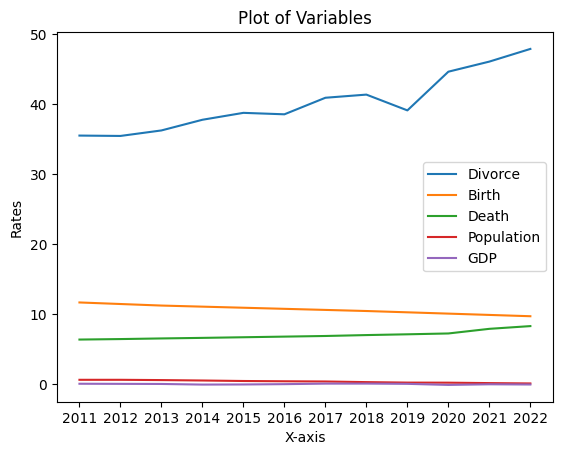

In [78]:
# Plotting data
plt.plot(columns,div_rate, label='Divorce')
plt.plot(columns,birth_rate, label='Birth')
plt.plot(columns,death_rate, label='Death')
plt.plot(columns,pop_change_rate, label='Population')
plt.plot(columns,GDP_change, label='GDP')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Rates')
plt.title('Plot of Variables')
plt.legend()

# Showing plot
plt.show()

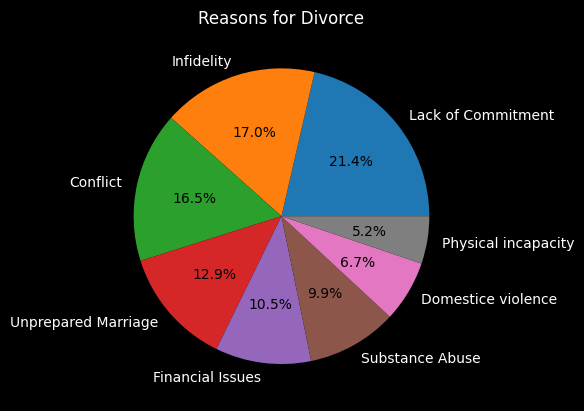

In [79]:
Reasons = ['Lack of Commitment','Infidelity','Conflict','Unprepared Marriage', 'Financial Issues', 'Substance Abuse', 'Domestice violence','Physical incapacity']
values = [75,59.6,57.7,45.1,36.7,34.6,23.5,18.2]

# Create a pie chart
pie = plt.pie(values, labels=Reasons, autopct='%1.1f%%')

# Set the background color
fig = plt.gcf()
fig.patch.set_facecolor('black')

# Set the text color for pie chart labels
for text in pie[1]:
    text.set_color('white')

# Set the title color
plt.title('Reasons for Divorce', color='white')

# Save the chart as an image file with black background
plt.savefig('pie_chart_reasons.png', facecolor='black')

# Display the chart
plt.show()

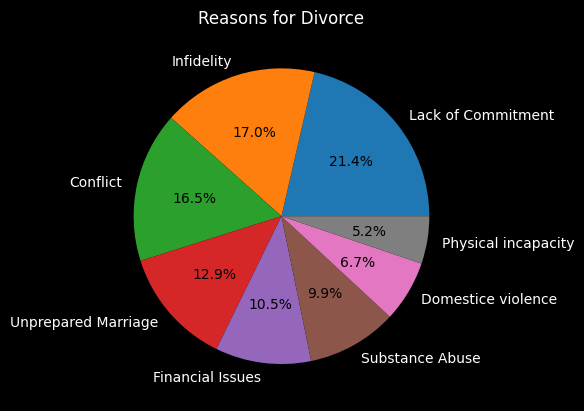

In [80]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set the background color
fig.patch.set_facecolor('black')

# Initialize the pie chart with the actual percentages
pie = ax.pie(values, labels=Reasons, autopct='%1.1f%%')

# Set the text color
for text in pie[1]:
    text.set_color('white')

# Add a title
ax.set_title('Reasons for Divorce', color='white')

# Update function to animate the pie chart
def update(frame):
    # Clear previous patches
    for patch in pie[0]:
        patch.set_visible(False)

    # Update the pie chart data
    for i in range(frame + 1):
        pie[0][i].set_visible(True)

    return tuple(pie[0])

# Create the animation
animation = FuncAnimation(fig, update, frames=len(values), interval=500, blit=True)

# Save the animation as a GIF file
animation.save('pie_chart_animation_reasons.gif', writer=PillowWriter(fps=2))

# Display the animation
plt.show()


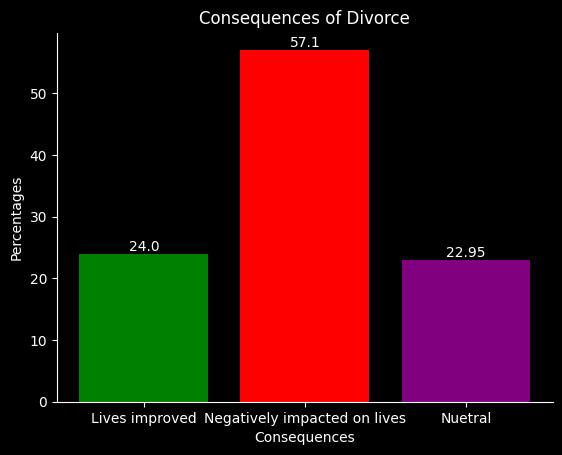

In [81]:
Consequences = ['Lives improved', 'Negatively impacted on lives','Nuetral']
value = [24, 57.1,22.95]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the background color for the chart area and figure
ax.set_facecolor('black')
fig.set_facecolor('black')

# Create the bar chart with custom colors
bars = ax.bar(Consequences, value, color=['green', 'red','purple'])

# Add labels and a title with white text color
ax.set_xlabel('Consequences', color='white')
ax.set_ylabel('Percentages', color='white')
ax.set_title('Consequences of Divorce', color='white')

# Set the text color to white for text annotations above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', color='white')

# Set the color of the graph line
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Set the color of the text outside the chart
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Save the chart as an image file with black background
plt.savefig('bar_chart_consequences.png', facecolor='black')

# Display the bar chart
plt.show()

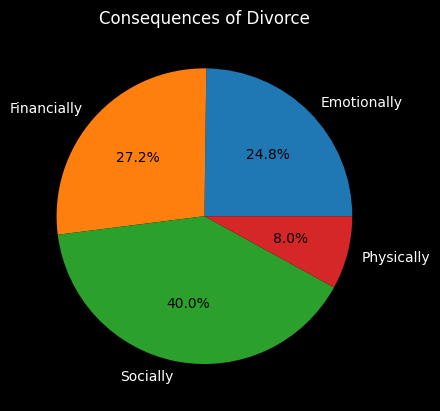

In [82]:
consequences = ['Emotionally', 'Financially', 'Socially', 'Physically']
Cvalue = [62, 68, 100, 20]

# Create a pie chart
pie = plt.pie(Cvalue, labels=consequences, autopct='%1.1f%%')

# Set the background color
fig = plt.gcf()
fig.patch.set_facecolor('black')

# Set the text color for pie chart labels
for text in pie[1]:
    text.set_color('white')

# Set the title color
plt.title('Consequences of Divorce', color='white')

# Save the chart as an image file with black background
plt.savefig('pie_chart_consequences.png', facecolor='black')

# Display the chart
plt.show()

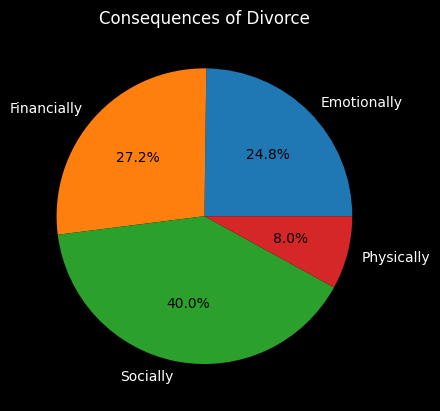

In [83]:
# Define the data for the bar chart
Cpercentages = [24.8, 27.2, 40.0, 8.0]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the background color
fig.patch.set_facecolor('black')

# Initialize the pie chart with the actual percentages
pie = ax.pie(Cpercentages, labels=consequences, autopct='%1.1f%%')

# Set the text color
for text in pie[1]:
    text.set_color('white')

# Add a title
ax.set_title('Consequences of Divorce',color = 'white')

# Update function to animate the pie chart
def update(frame):
    # Clear previous patches
    for patch in pie[0]:
        patch.set_visible(False)

    # Update the pie chart data
    for i in range(frame + 1):
        pie[0][i].set_visible(True)

    return tuple(pie[0])

# Create the animation
animation = FuncAnimation(fig, update, frames=len(Cpercentages), interval=500, blit=True)

# Save the animation as a GIF file
animation.save('pie_chart_animation_Consequences.gif', writer=PillowWriter(fps=2))

# Display the animation
plt.show()

**PART 1**

**FIRST HYPOTHESIS**

**Null Hypothesis ($H_0$): There is no statistically significant relationship between divorce rate and GDP in Thailand.**

**Alternative Hypothesis ($H_1$): There is a statistically significant relationship between divorce rate and GDP in Thailand.**

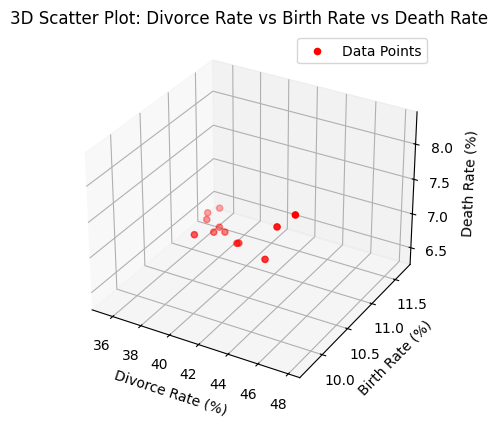

In [84]:
divorce_rate = df.loc['Divorce (%)']
Birth_rate = df.loc['Birth Rate (%)']
Death_rate = df.loc['Death Rate (%)']

# Assuming you have already loaded the data into the variables:
# divorce_rate, Birth_rate, Death_rate

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(divorce_rate, Birth_rate, Death_rate, c='r', marker='o', label='Data Points')

# Set labels for the axes
ax.set_xlabel('Divorce Rate (%)')
ax.set_ylabel('Birth Rate (%)')
ax.set_zlabel('Death Rate (%)')

# Set a title for the plot
ax.set_title('3D Scatter Plot: Divorce Rate vs Birth Rate vs Death Rate')

# Show the legend
ax.legend()

plt.show()

#hard to identify anything
#Based on this observation, I conclude that in this visual representation, there is no obvious relationship among these three variables.
#From the 3D scatter plot, it appears that there may not be a clear and discernible pattern or clustering of data points.
# The data points seem to be scattered rather evenly throughout the plot which it makes it hard to identify the relationship among them.

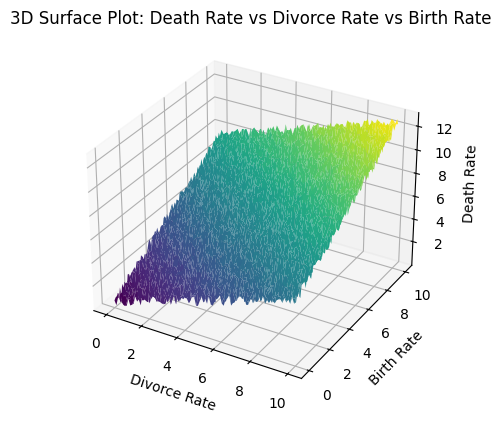

In [85]:
# Create synthetic data for demonstration (replace with your actual data)
divorce_rate = np.linspace(0, 10, 100)
birth_rate = np.linspace(0, 10, 100)
divorce_rate, birth_rate = np.meshgrid(divorce_rate, birth_rate)
death_rate = 0.5 * divorce_rate + 0.7 * birth_rate + np.random.rand(*divorce_rate.shape)

# Create the 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(divorce_rate, birth_rate, death_rate, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Divorce Rate')
ax.set_ylabel('Birth Rate')
ax.set_zlabel('Death Rate')

# Set a title for the plot
ax.set_title('3D Surface Plot: Death Rate vs Divorce Rate vs Birth Rate')

plt.show()

#the 3D surface plot offers a visual representation of the complex interplay between Divorce Rate, Birth Rate, and Death Rate. 
#It suggests that the relationships among these variables may not be complex.

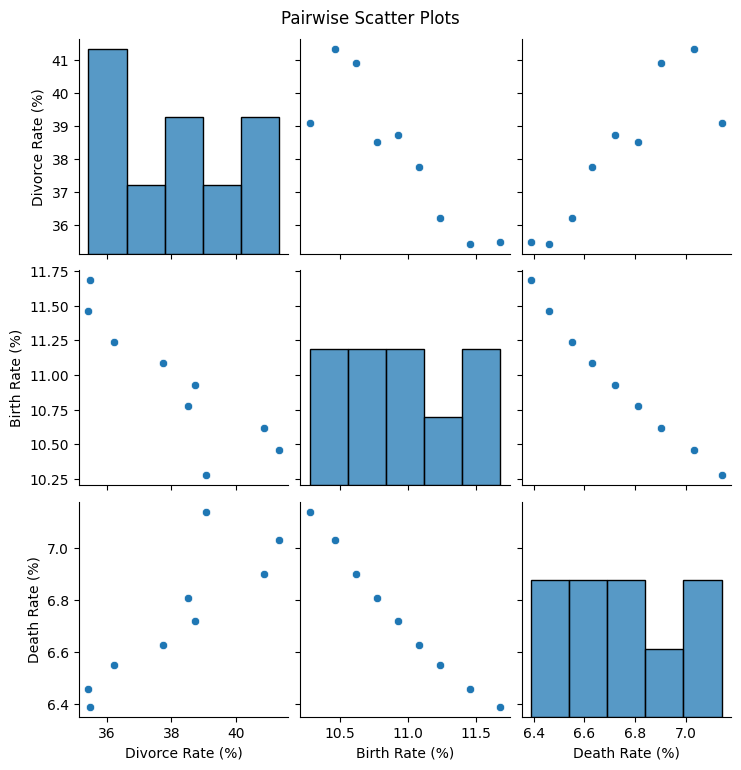

In [86]:
divorce_rate = df.loc['Divorce (%)'][:9]
Birth_rate = df.loc['Birth Rate (%)'][:9]
Death_rate = df.loc['Death Rate (%)'][:9]

# Create pairwise scatter plots
pairwise_plot = sns.pairplot(pd.DataFrame({'Divorce Rate (%)': divorce_rate,
                                           'Birth Rate (%)': Birth_rate,
                                           'Death Rate (%)': Death_rate}))
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()


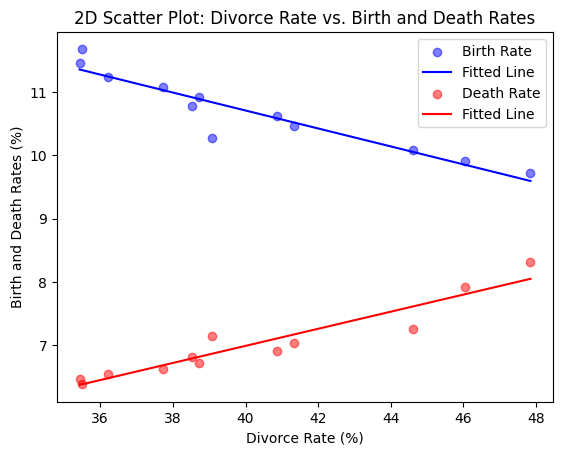

correlation birth vs divorce = -0.9407886163624869
correlation death vs divorce = 0.9500060489821728


In [87]:
divorce_rate = df.loc['Divorce (%)'].astype(float)
birth_rate = df.loc['Birth Rate (%)'].astype(float)
death_rate = df.loc['Death Rate (%)'].astype(float)

x = np.linspace(min(divorce_rate), max(divorce_rate), 100)

coefficients1 = np.polyfit(divorce_rate, birth_rate, 1)
poly1 = np.poly1d(coefficients1)
y1 = poly1(x)
plt.scatter(divorce_rate, birth_rate, label='Birth Rate', c='blue', alpha=0.5)
plt.plot(x, y1, color='blue', label='Fitted Line')

coefficients2 = np.polyfit(divorce_rate, death_rate, 1)
poly2 = np.poly1d(coefficients2)
y2 = poly2(x)
plt.scatter(divorce_rate, death_rate, label='Death Rate', c='red', alpha=0.5)
plt.plot(x, y2, color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Divorce Rate (%)')
plt.ylabel('Birth and Death Rates (%)')
plt.title('2D Scatter Plot: Divorce Rate vs. Birth and Death Rates')

# Add a legend
plt.legend()

# Show the plot
plt.show()

birth__ = pd.to_numeric(df.loc['Birth Rate (%)'], errors='coerce')
death__ = pd.to_numeric(df.loc['Death Rate (%)'], errors='coerce')
divorce__ = pd.to_numeric(df.loc['Divorce (%)'], errors='coerce')
cor_1 = birth__ .corr(divorce__)
cor_2 = death__ .corr(divorce__)
print('correlation birth vs divorce =',cor_1)
print('correlation death vs divorce =',cor_2)

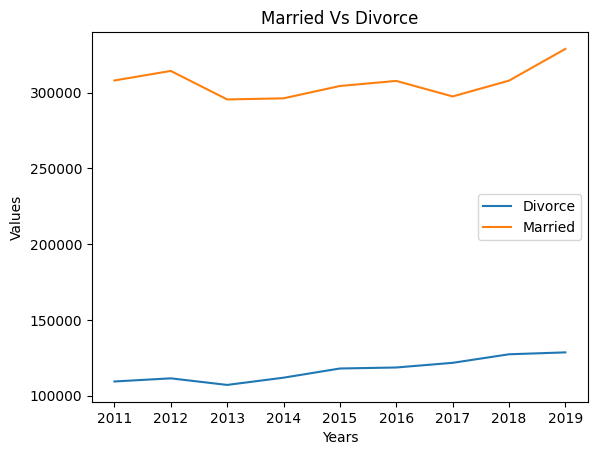

In [88]:
years = df.columns[:9]
divorce_rate = df.loc['Divorce (Couples)'][:9]
married_rate = df.loc['Married (Couples)'][:9]

my_plot1 = plt.figure()

plt.plot(years, divorce_rate, label= 'Divorce')
plt.plot(years, married_rate, label='Married')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Married Vs Divorce')

plt.legend()

plt.show()


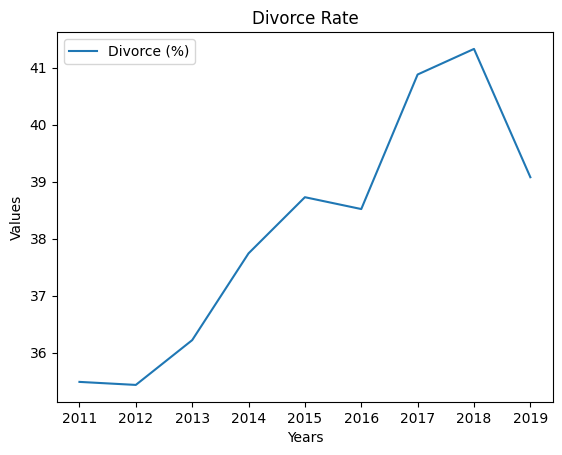

In [89]:
years = df.columns
my_plot2 = plt.figure()

plt.plot(years[:9], div_rate[:9], label= 'Divorce (%)')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Divorce Rate')

plt.legend()

plt.show()

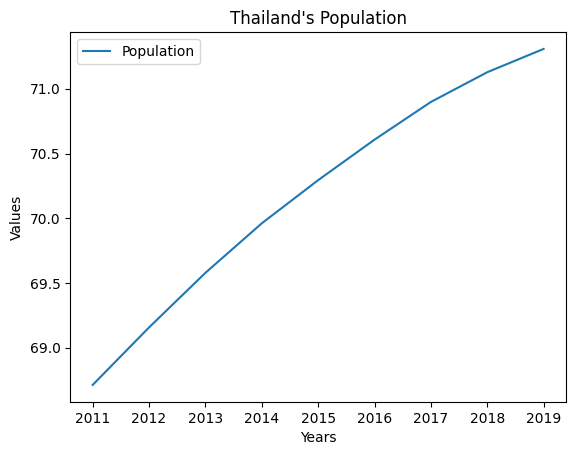

In [90]:
years = df.columns[:9]

my_plot3 = plt.figure()

plt.plot(years, pop_data[:9], label= 'Population')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Thailand\'s Population')

plt.legend()

plt.show()

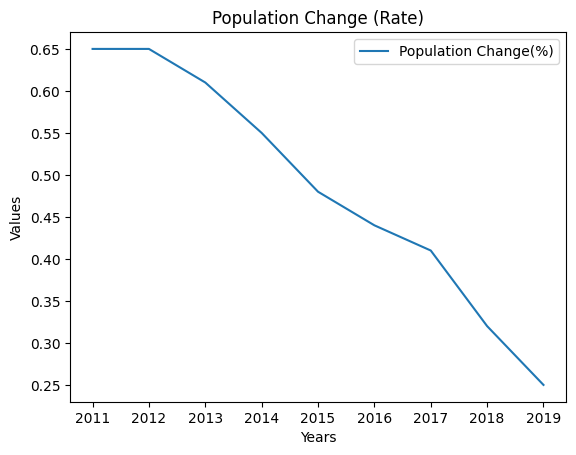

In [91]:
years = df.columns[:9]
pop_change_rate = df.loc['Population Change(%)'][:9]

my_plot3 = plt.figure()

plt.plot(years, pop_change_rate, label= 'Population Change(%)')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Population Change (Rate)')

plt.legend()

plt.show()

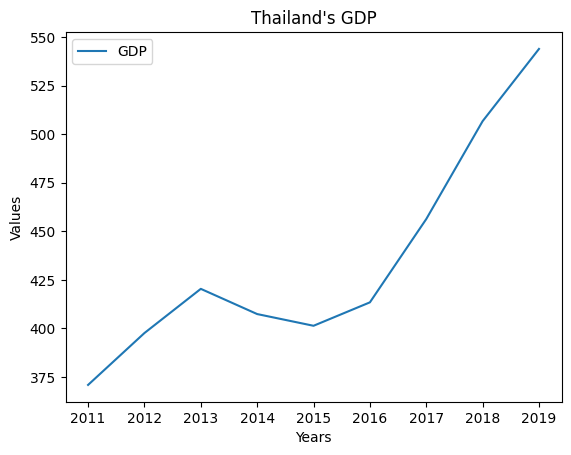

In [92]:
years = df.columns[:9]
my_plot = plt.figure()

plt.plot(years, GDP_data[:9], label= 'GDP')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Thailand\'s GDP')

plt.legend()

plt.show()

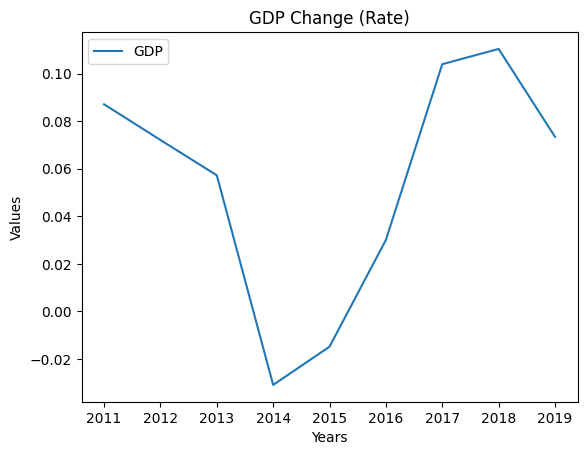

In [93]:
years = df.columns[:9]
my_plot = plt.figure()

plt.plot(years, GDP_change[:9], label= 'GDP')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('GDP Change (Rate)')

plt.legend()

plt.show()

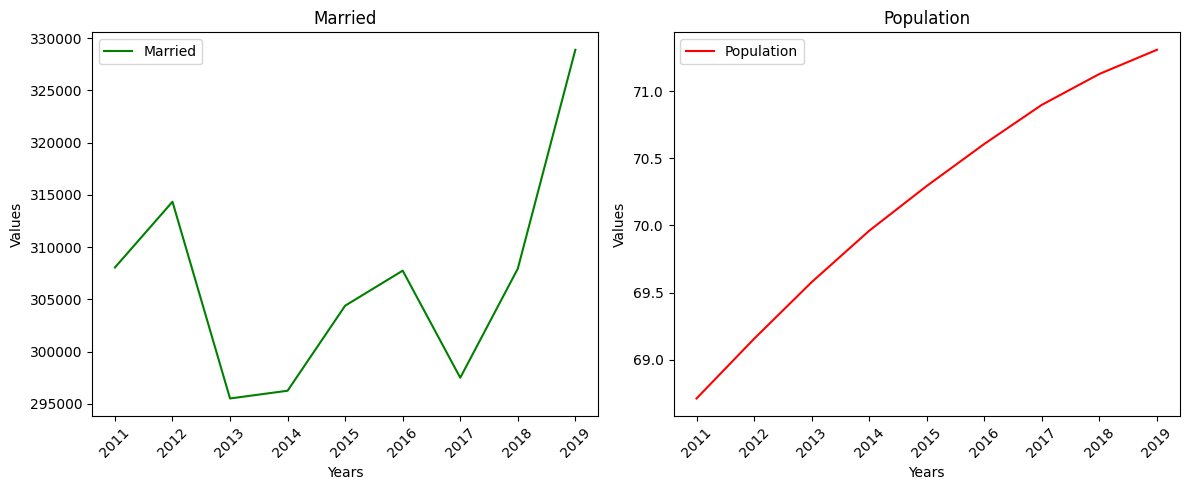

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plot 1 on the first subplot (ax1)
ax1.set_title('Married')
# ax1.plot(years, divorce_rate, color='purple', label='Divorce')
ax1.plot(years[:9], marriage_data[:9], color='green', label='Married')
ax1.set_xlabel('Years')
ax1.set_ylabel('Values')
ax1.set_xticks(years[:9])
ax1.set_xticklabels(years[:9], rotation=45)
ax1.legend()

# Plot 2 on the second subplot (ax2)
ax2.set_title('Population')
ax2.plot(years[:9], pop_data[:9], color='red', label='Population')
# ax2.plot(years, pop_change_rate, color='blue', label='Population Rate')
ax2.set_xlabel('Years')
ax2.set_ylabel('Values')
ax2.set_xticks(years[:9])
ax2.set_xticklabels(years[:9], rotation=45)
ax2.legend()

# # Plot 3 on the third subplot (ax3)
# ax3.set_title('Divorce Vs Population')
# ax3.plot(years, df.loc['Divorce (Couples)'], color='red', label='Divorce')
# ax3.plot(years, df.loc['Population (Million)'], color='blue', label='Population')
# ax3.set_xlabel('Years')
# ax3.set_ylabel('Values')
# ax3.set_xticks(years)
# ax3.set_xticklabels(years, rotation=45)
# ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

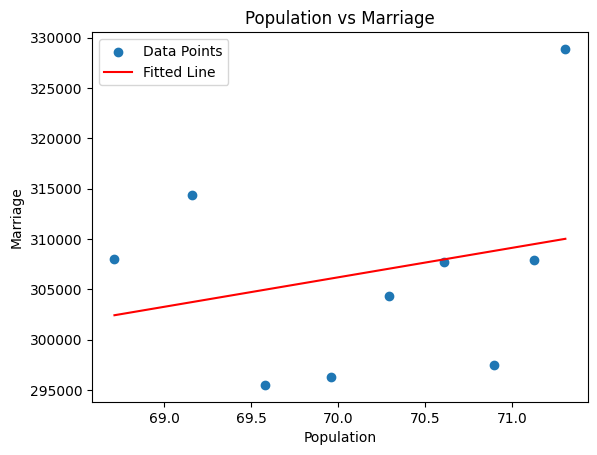

correlation = 0.2512982268112009 as they are positively correlated it implies that as population increases, Marriage would be increasing.


In [95]:
coefficients = np.polyfit(pop_data[:9], marriage_data[:9], 1)
poly = np.poly1d(coefficients)
x = np.linspace(min(pop_data[:9]), max(pop_data[:9]), 100)
y = poly(x)

plt.scatter(pop_data[:9], marriage_data[:9], label='Data Points')
plt.plot(x, y, color='red', label='Fitted Line')

plt.xlabel('Population')
plt.ylabel('Marriage')
plt.title('Population vs Marriage')

plt.legend()

plt.show()

correlation_matrix = np.corrcoef(pop_data[:9], marriage_data[:9])
correlation = correlation_matrix[0, 1]

print('correlation =', correlation, 'as they are positively correlated it implies that as population increases, Marriage would be increasing.')


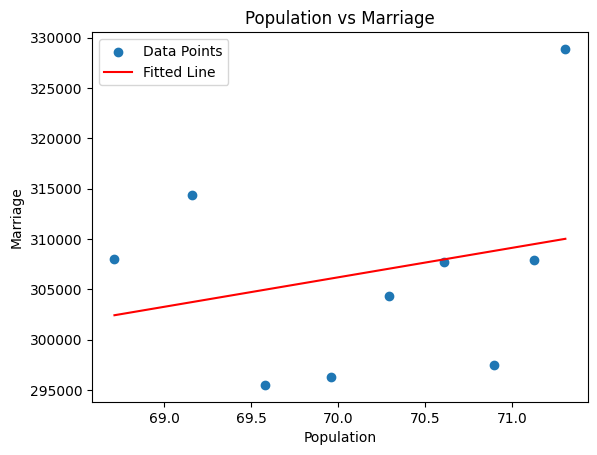

correlation = 0.2512982268112009 as they are negatively correlated it implies that as population increases, GDP would be increasing.


In [96]:
coefficients = np.polyfit(pop_data[:9], marriage_data[:9], 1)
poly = np.poly1d(coefficients)
x = np.linspace(min(pop_data[:9]), max(pop_data[:9]), 100)
y = poly(x)

plt.scatter(pop_data[:9], marriage_data[:9], label='Data Points')
plt.plot(x, y, color='red', label='Fitted Line')

plt.xlabel('Population')
plt.ylabel('Marriage')
plt.title('Population vs Marriage')

plt.legend()

plt.show()
# correlation = pd.to_numeric(pop_data, errors='coerce').corr(pd.to_numeric(marriage_data, errors='coerce'))
# print('correlation =',correlation,'as they are positively correlated it implies that as population increases, GDP would be increasing.')

pop = pd.to_numeric(df.loc['Population (Million)'][:9], errors='coerce')
mar= pd.to_numeric(df.loc['Married (Couples)'][:9], errors='coerce')
cor = mar.corr(pop)
print('correlation =',cor,'as they are negatively correlated it implies that as population increases, GDP would be increasing.')

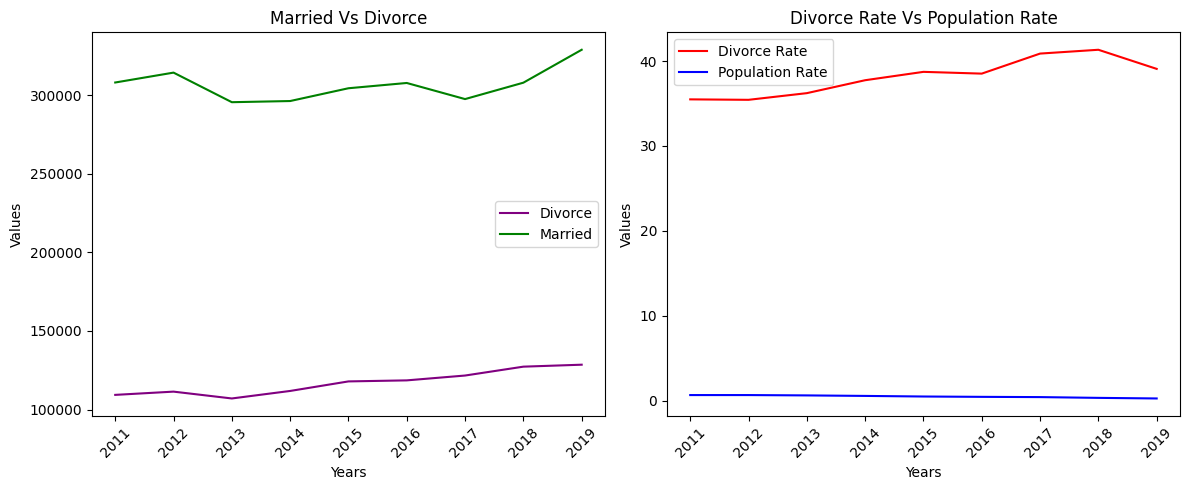

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plot 1 on the first subplot (ax1)
ax1.set_title('Married Vs Divorce')
ax1.plot(years[:9], divorce_rate[:9], color='purple', label='Divorce')
ax1.plot(years[:9], married_rate[:9], color='green', label='Married')
ax1.set_xlabel('Years')
ax1.set_ylabel('Values')
ax1.set_xticks(years[:9])
ax1.set_xticklabels(years[:9], rotation=45)
ax1.legend()

# Plot 2 on the second subplot (ax2)
ax2.set_title('Divorce Rate Vs Population Rate')
ax2.plot(years[:9], div_rate[:9], color='red', label='Divorce Rate')
ax2.plot(years[:9], pop_change_rate[:9], color='blue', label='Population Rate')
ax2.set_xlabel('Years')
ax2.set_ylabel('Values')
ax2.set_xticks(years[:9])
ax2.set_xticklabels(years[:9], rotation=45)
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

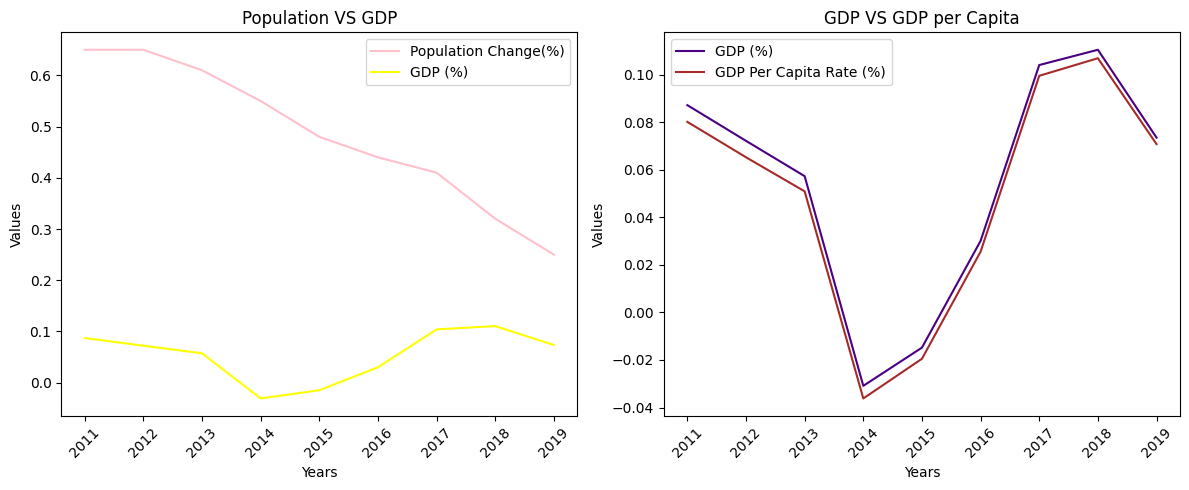

In [98]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12,5))

# Plot 3 on the first subplot (ax3)
ax3.set_title('Population VS GDP')
ax3.plot(years[:9], df.loc['Population Change(%)'][:9] , color='pink', label='Population Change(%)')
ax3.plot(years[:9], df.loc['GDP Change (%)'][:9] , color='yellow', label='GDP (%)')
ax3.set_xlabel('Years')
ax3.set_ylabel('Values')
ax3.set_xticks(years[:9])
ax3.set_xticklabels(years[:9], rotation=45)
ax3.legend()

# Plot 4 on the first subplot (ax4)
ax4.set_title('GDP VS GDP per Capita')
ax4.plot(years[:9], df.loc['GDP Change (%)'][:9], color='indigo', label='GDP (%)')
ax4.plot(years[:9], df.loc['GDP Per Capita Change (%)'][:9], color='brown', label='GDP Per Capita Rate (%)')
ax4.set_xlabel('Years')
ax4.set_ylabel('Values')
ax4.set_xticks(years[:9])
ax4.set_xticklabels(years[:9], rotation=45)
ax4.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

In [99]:
population = pd.to_numeric(df.loc['Population Change(%)'][:9], errors='coerce')
divorce_rate = pd.to_numeric(df.loc['Divorce (%)'][:9], errors='coerce')
correlation = population.corr(divorce_rate)
print('correlation =',correlation,'as they are negatively correlated it implies that as divorce rate increases, population growth rate would be decreasing.')

population_data = pd.to_numeric(df.loc['Population (Million)'][:9], errors='coerce')
gdp = pd.to_numeric(df.loc['GDP (Billion Dollars)'][:9], errors='coerce')
correlation = population_data.corr(gdp)
print('correlation =',correlation,'as they are positively correlated it implies that as population increases, GDP would be increasing.')

gdp_per_capita = pd.to_numeric(df.loc['GDP (Billion Dollars)'][:9], errors='coerce')
correlation = gdp.corr(gdp_per_capita)
print('correlation =',correlation,'as they are positively correlated it implies that as GDP increases, GDP per Capita would be increasing.')

correlation = -0.8574922395318257 as they are negatively correlated it implies that as divorce rate increases, population growth rate would be decreasing.
correlation = 0.835526986253874 as they are positively correlated it implies that as population increases, GDP would be increasing.
correlation = 1.0 as they are positively correlated it implies that as GDP increases, GDP per Capita would be increasing.


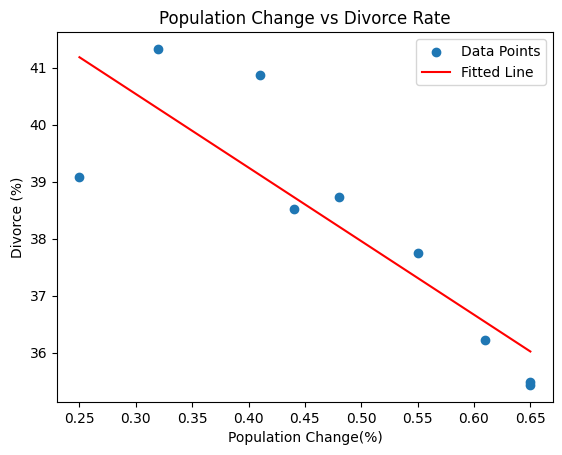

In [100]:
population = df.loc['Population Change(%)'][:9].astype(float)
divorce_rate = df.loc['Divorce (%)'][:9].astype(float)

coefficients = np.polyfit(population, divorce_rate, 1)
poly = np.poly1d(coefficients)
x = np.linspace(min(population), max(population), 100)
y = poly(x)

plt.scatter(population, divorce_rate, label='Data Points')
plt.plot(x, y, color='red', label='Fitted Line')

plt.xlabel('Population Change(%)')
plt.ylabel('Divorce (%)')
plt.title('Population Change vs Divorce Rate')

plt.legend()

plt.show()

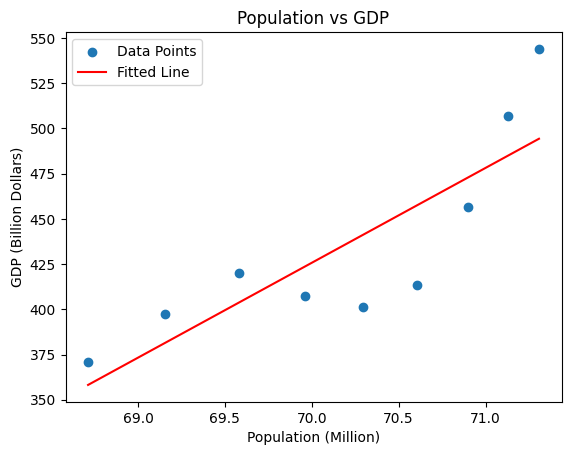

correlation = 0.835526986253874 as they are positively correlated it implies that as population increases, GDP would be increasing.


In [101]:
population = df.loc['Population (Million)'][:9].astype(float)
gdpth = df.loc['GDP (Billion Dollars)'][:9].astype(float)

coefficients = np.polyfit(population, gdpth, 1)
poly = np.poly1d(coefficients)
x = np.linspace(min(population), max(population), 100)
y = poly(x)

plt.scatter(population, gdpth, label='Data Points')
plt.plot(x, y, color='red', label='Fitted Line')

plt.xlabel('Population (Million)')
plt.ylabel('GDP (Billion Dollars)')
plt.title('Population vs GDP')

plt.legend()

plt.show()

popcor = pd.to_numeric(df.loc['Population (Million)'][:9], errors='coerce')
gdpcor= pd.to_numeric(df.loc['GDP (Billion Dollars)'][:9], errors='coerce')
correlation1 = popcor.corr(gdpcor)
print('correlation =',correlation1,'as they are positively correlated it implies that as population increases, GDP would be increasing.')

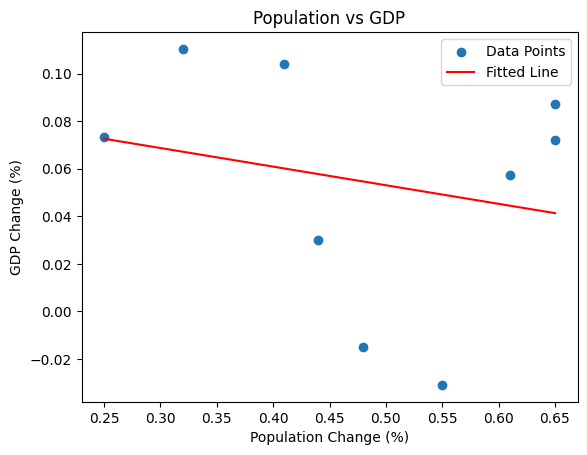

correlation = -0.2242686417200024 as they are positively correlated it implies that as population increases, GDP would be increasing.


In [102]:
#Not included, have no meaningful result

population = df.loc['Population Change(%)'][:9].astype(float)
gdpth_change = df.loc['GDP Change (%)'][:9].astype(float)

coefficients = np.polyfit(population, gdpth_change, 1)
poly = np.poly1d(coefficients)
x = np.linspace(min(population), max(population), 100)
y = poly(x)

plt.scatter(population, gdpth_change, label='Data Points')
plt.plot(x, y, color='red', label='Fitted Line')

plt.xlabel('Population Change (%)')
plt.ylabel('GDP Change (%)')
plt.title('Population vs GDP')

plt.legend()

plt.show()

popc = pd.to_numeric(df.loc['Population Change(%)'][:9], errors='coerce')
gdpc= pd.to_numeric(df.loc['GDP Change (%)'][:9], errors='coerce')
correlation = popc.corr(gdpc)
print('correlation =',correlation,'as they are positively correlated it implies that as population increases, GDP would be increasing.')

So, after we have seen the correlation and fit the line, we can see that these factors affect one and the other in some or the other way (positively or negatively impacting one another). 
Therefore
1. As divorce rate increases our population rate would drop as divorce rate affect both birth rate and death rate which affect the population rate directly as birth rate and death rate are the main factors affecting population growth
2. As population drop our GDP initially drop as well which affect the GDP per Capita direclty.

In [103]:
X = df.loc['Divorce (%)'][:9].values.reshape(-1, 1)  # Independent variable (Population Change(%))
y = df.loc['Population Change(%)'][:9].values  # Dependent variable (Divorce (%))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse} \nA Mean Squared Error (mse) value of {mse} can be considered quite good as this indicates that my model's predictions are relatively close to the actual Divorce rate value.")
print(f"R-squared: {r2} \nThis suggests that the divorce rate alone can account for about {r2}% of the differences we observe in the world population.\nThis means that changes in the divorce rate can explain most of the variations in population size.")


Mean Squared Error: 0.00034978098814892754 
A Mean Squared Error (mse) value of 0.00034978098814892754 can be considered quite good as this indicates that my model's predictions are relatively close to the actual Divorce rate value.
R-squared: 0.9871522134747869 
This suggests that the divorce rate alone can account for about 0.9871522134747869% of the differences we observe in the world population.
This means that changes in the divorce rate can explain most of the variations in population size.


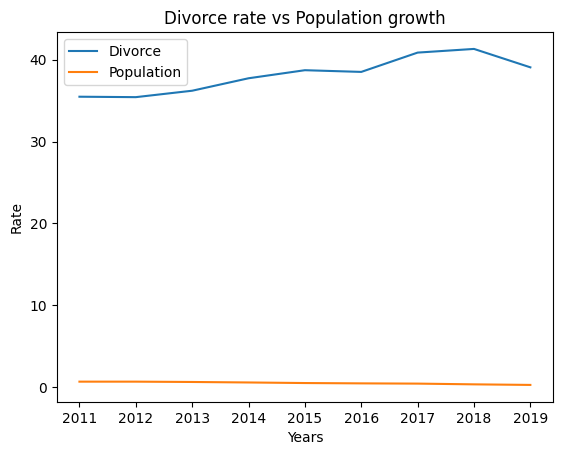

In [104]:
years = df.columns[:9]
# divorce_rate = df.loc['Divorce (%)']
# pop_rate = df.loc['Population Change(%)']

plt.figure()

plt.plot(years[:9], div_rate[:9], label= 'Divorce')
plt.plot(years[:9], pop_change_rate[:9], label= 'Population')

plt.xlabel('Years')
plt.ylabel('Rate')
plt.title('Divorce rate vs Population growth')

# plt.yticks([0, 1, 30, 50])
# plt.ylim((0, 1), (35, 50))
# plt.ylim(35, 50)

plt.legend()

plt.show()


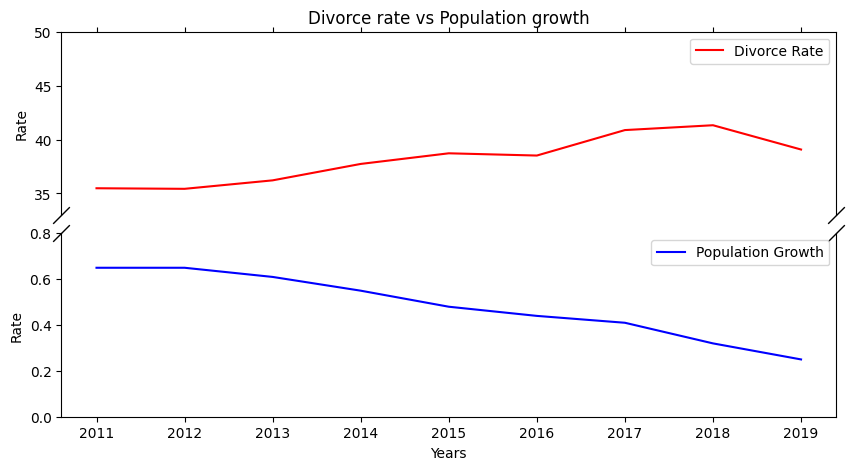

In [105]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5))
fig.subplots_adjust(hspace=0.1) 

plt.xlabel('Years')
plt.ylabel('Rate')

ax1.plot(div_rate[:9], color='red', label='Divorce Rate')
ax2.plot(pop_change_rate[:9], color='blue',label='Population Growth')

ax1.set_ylim(33, 50)
ax2.set_ylim(0, 0.8)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=True)
ax2.xaxis.tick_bottom()
ax1.set_ylabel('Rate')
ax1.set_title('Divorce rate vs Population growth')

d = 1
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.legend()
ax2.legend()

plt.show()

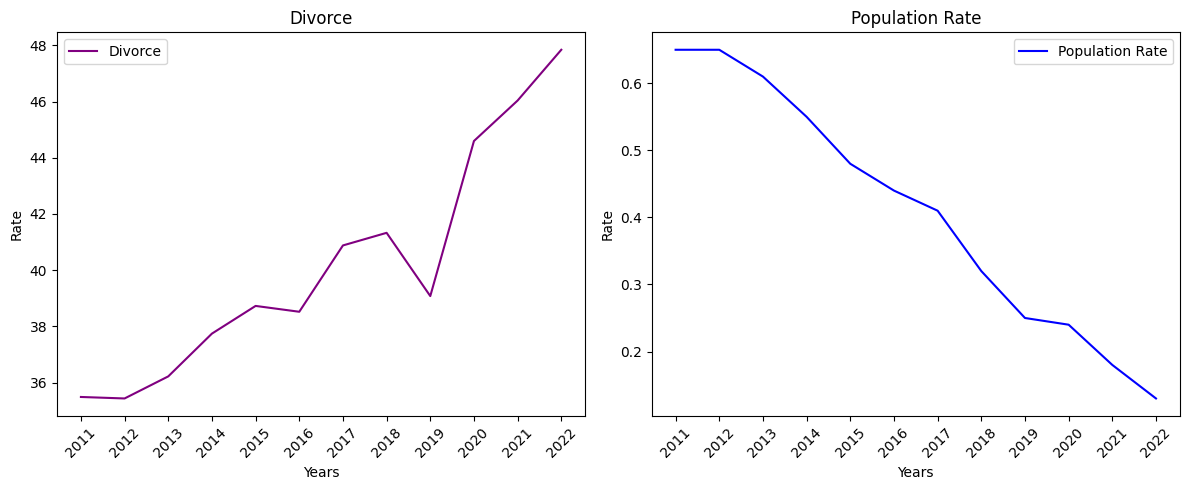

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

pop_change_rate = [0.65,0.65, 0.61,0.55,0.48,0.44,0.41,0.32,0.25,0.24,0.18,0.13]

years_ = [i for i in range(2011,2023)]
# Plot 1 on the first subplot (ax1)
ax1.set_title('Divorce')
ax1.plot(years_, div_rate, color='purple', label='Divorce')
# ax1.plot(years, married_rate, color='green', label='Married')
ax1.set_xlabel('Years')
ax1.set_ylabel('Rate')
ax1.set_xticks(years_)
ax1.set_xticklabels(years_
, rotation=45)
ax1.legend()

# Plot 2 on the second subplot (ax2)
ax2.set_title('Population Rate')
ax2.plot(years_, pop_change_rate, color='blue', label='Population Rate')
ax2.set_xlabel('Years')
ax2.set_ylabel('Rate')
ax2.set_xticks(years_)
ax2.set_xticklabels(years_, rotation=45)
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

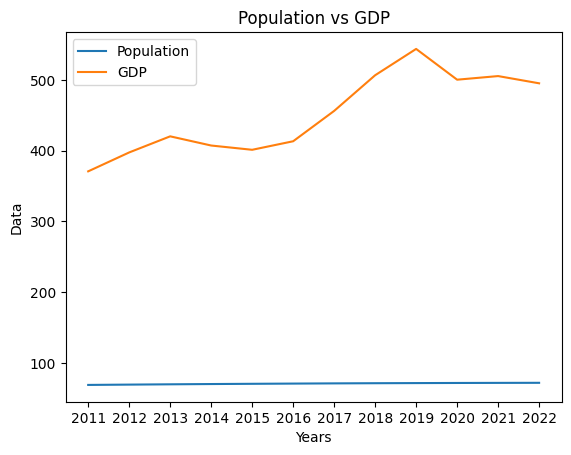

In [107]:
years = df.columns
plt.figure()

plt.plot(years, pop_data, label= 'Population')
plt.plot(years, GDP_data, label= 'GDP')

plt.xlabel('Years')
plt.ylabel('Data')
plt.title('Population vs GDP')

# plt.yticks([0, 1, 30, 50])
# plt.ylim((0, 1), (35, 50))
# plt.ylim(35, 50)

plt.legend()

plt.show()

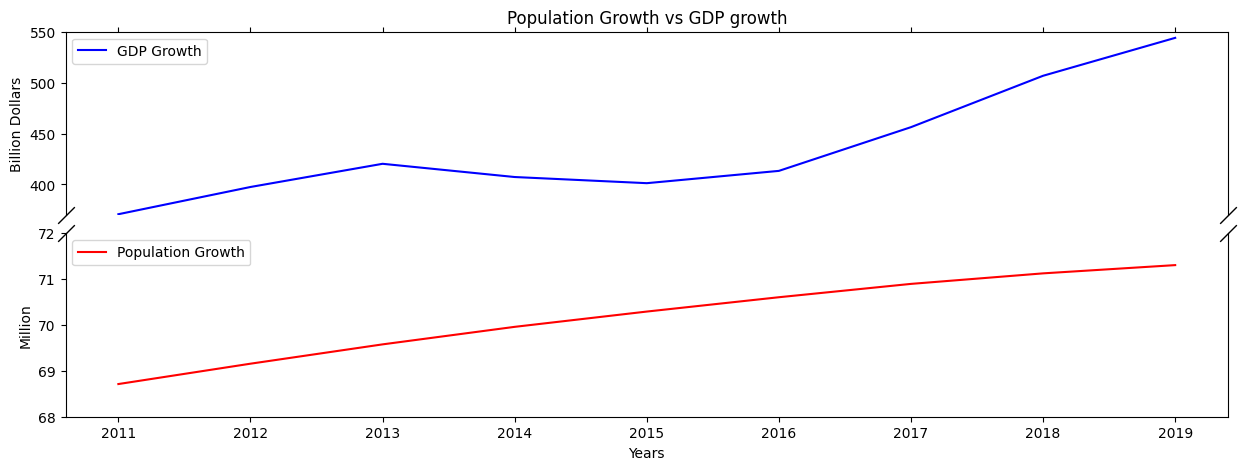

In [108]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,5))
fig.subplots_adjust(hspace=0.1) 

plt.xlabel('Years')

ax2.plot(years[:9], pop_data[:9], color='red', label='Population Growth')
ax1.plot(years[:9], GDP_data[:9], color='blue', label='GDP Growth')

ax2.set_ylim(68, 72)
ax1.set_ylim(370, 550)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=True)
ax2.xaxis.tick_bottom()
ax2.set_ylabel('Million')
ax1.set_ylabel('Billion Dollars')
ax1.set_title('Population Growth vs GDP growth')

d = 1
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.legend()
ax2.legend()

plt.show()

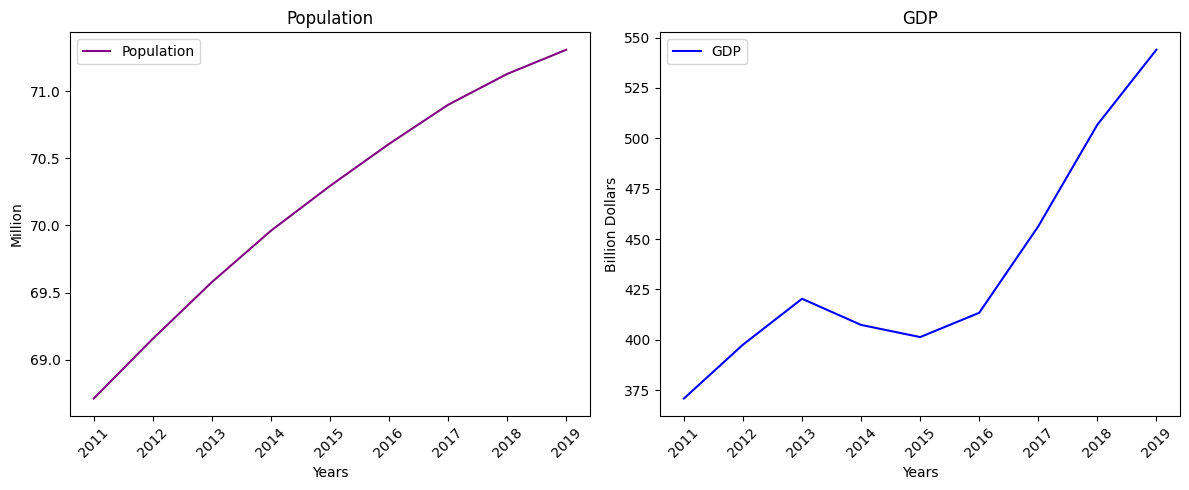

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plot 1 on the first subplot (ax1)
ax1.set_title('Population')
ax1.plot(years[:9], pop_data[:9], color='purple', label='Population')
ax1.set_xlabel('Years')
ax1.set_ylabel('Million')
ax1.set_xticks(years[:9])
ax1.set_xticklabels(years[:9], rotation=45)
ax1.legend()

# Plot 2 on the second subplot (ax2)
ax2.set_title('GDP')
ax2.plot(years[:9], GDP_data[:9], color='blue', label='GDP')
ax2.set_xlabel('Years')
ax2.set_ylabel('Billion Dollars')
ax2.set_xticks(years[:9])
ax2.set_xticklabels(years[:9], rotation=45)
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

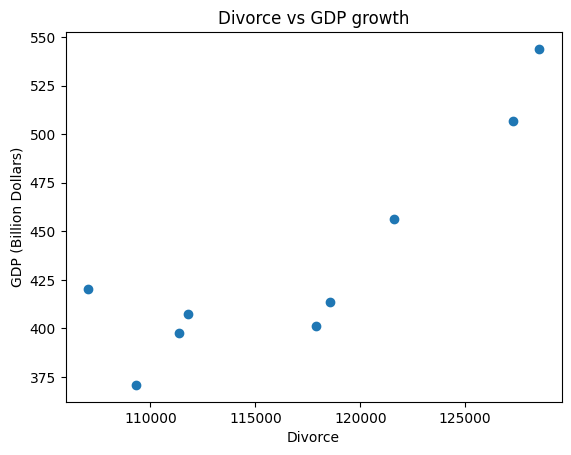

In [110]:
plt.figure()

plt.scatter(div_data[:9],GDP_data[:9])

plt.ylabel('GDP (Billion Dollars)')
plt.xlabel('Divorce')
plt.title('Divorce vs GDP growth')

plt.show()

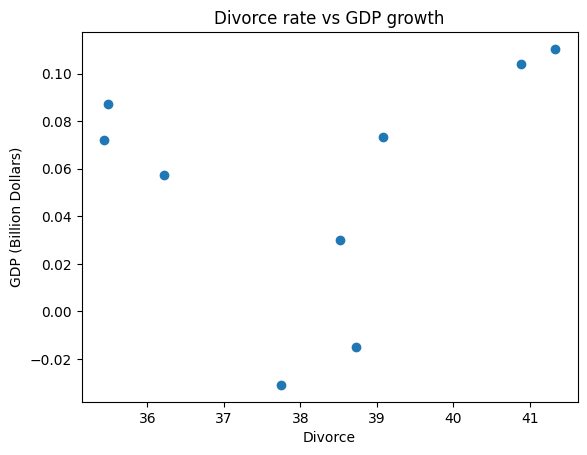

In [111]:
plt.figure()

plt.scatter(div_rate[:9], GDP_change[:9])

plt.ylabel('GDP (Billion Dollars)')
plt.xlabel('Divorce')
plt.title('Divorce rate vs GDP growth')

plt.show()

R-squared: 0.8752


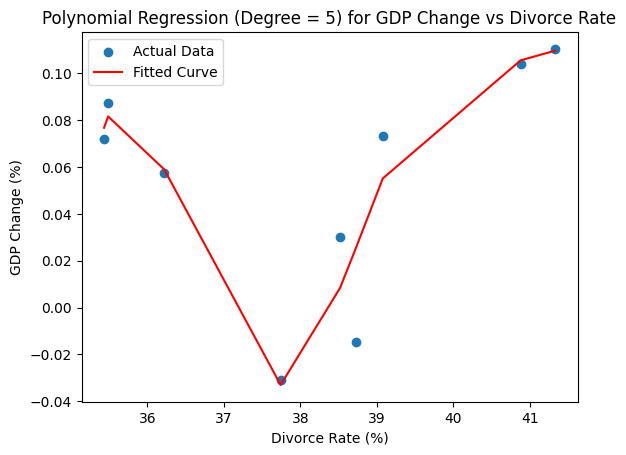

Intercept: -113629.46780270607
Coefficient for Divorce: 0.0
R-squared: 0.875212282629912 this suggests that the divorce rate alone can account for about 87.52% of the differences we observe in the GDP rate.
Correlation = 0.20407876921540935 as they are negatively correlated it implies that as divorce rate increases, GDP rate would be decreasing.
Mean Absolute Error: 0.010744191135979879 this indicates that, on average, the model's predictions deviate by approximately 1.07% points from the actual values which is relatively small.
Mean Squared Error: 0.00027746424847380886 this suggests that, on average, the model's predictions are relatively close to the actual values
Root Mean Squared Error: 0.016657258131931824 this suggests that, on average, the model's predictions deviate by approximately 1.67% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate.
T-values: [-0.3850258232818874 0.551549318483670

In [112]:
X = df.loc['Divorce (%)'][:-3].values.reshape(-1, 1)  # Independent variable (Divorce (%))
y = df.loc['GDP Change (%)'][:-3].values  # Dependent variable (GDP (%))

# Define polynomial degree
degree = 5

# Create polynomial features
transformer = PolynomialFeatures(degree=degree)
# transformer = PolynomialFeatures(degree=degree, interaction_only=True)
X_transformed = transformer.fit_transform(X)

# Fit the model
model = LinearRegression().fit(X_transformed, y)

# Predict GDP change for a new divorce rate
# new_divorce_rate = 50
# predicted_gdp_change = model.predict(transformer.transform([[new_divorce_rate]]))

# Calculate R-squared and adjusted R-squared
r_squared = model.score(X_transformed, y)
# adjusted_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - X_transformed.shape[1] - 1)

# Print model performance
print(f"R-squared: {r_squared:.4f}")
# print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

X_sorted = np.sort(X, axis=0)
X_sorted_transformed = transformer.transform(X_sorted)

# Plot the data and the model
plt.scatter(X, y, label='Actual Data')
plt.plot(X_sorted, model.predict(X_sorted_transformed), label='Fitted Curve', color='red')
plt.xlabel("Divorce Rate (%)")
plt.ylabel("GDP Change (%)")
plt.title(f"Polynomial Regression (Degree = {degree}) for GDP Change vs Divorce Rate")
plt.legend()
plt.show()

# # Plot the data and the model
# plt.scatter(X, y)
# plt.plot(X, model.predict(X_transformed))
# plt.xlabel("Divorce Rate (%)")
# plt.ylabel("GDP Change (%)")
# plt.title(f"Polynomial Regression (Degree = {degree}) for GDP Change vs Divorce Rate")
# plt.show()

y_pred = model.predict(X_transformed)
# Extract the coefficients
slope = model.coef_[0]
intercept = model.intercept_
# Evaluate the model
print(f"Intercept: {intercept}")
print(f"Coefficient for Divorce: {slope}")
print(f"R-squared: {r_squared} this suggests that the divorce rate alone can account for about {round(r_squared*100,2)}% of the differences we observe in the GDP rate.")
correlation1 = (pd.to_numeric(df.loc['Divorce (%)'][:9], errors='coerce')).corr(pd.to_numeric(df.loc['GDP Change (%)'][:9], errors='coerce'))
print(f"Correlation = {correlation1} as they are negatively correlated it implies that as divorce rate increases, GDP rate would be decreasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y, y_pred)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y, y_pred)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(y, y_pred)} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y, y_pred))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y, y_pred))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

X = df.loc['Divorce (%)'][:-3].values  # Independent variable (Divorce Rate)
y = df.loc['GDP Change (%)'][:-3].values  # Dependent variable (GDP (%))

# Convert to numeric type
X_numeric = pd.to_numeric(X, errors='coerce').reshape(-1, 1)

# Add a constant term to the independent variable matrix for the intercept
X_with_intercept = sm.add_constant(X_numeric)

# Create a linear regression model using statsmodels
model_stats = sm.OLS(y, X_with_intercept, missing='drop').fit()

print(f"T-values: {model_stats.tvalues}")

# Calculate standard error of the coefficient for divorce
variance_of_X = np.var(X_transformed[:, 1])

# Calculate the standard error
n = len(y)
k = X_transformed.shape[1] - 1  # Number of features excluding the intercept term
standard_error_divorce = np.sqrt(metrics.mean_squared_error(y, y_pred) / (n - k) / variance_of_X)

# Assuming you have a linear regression model named 'model'
t_value_divorce = model.coef_[0] / standard_error_divorce  # Compute the T-value (standardized coefficient)
print("model.coef_[0]:",model.coef_[0])
p_value_divorce = 2 * (1 - stats.t.cdf(np.abs(t_value_divorce), df=len(df)-2))  # Two-tailed test

print(f"Standard Error of Coefficient for Divorce: {standard_error_divorce}")
print("T-value for Divorce:", t_value_divorce,'A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.')
print("P-value for Divorce:", p_value_divorce)

Null Hypothesis ($H_0$): There's no direct affect from divorce rates on GDP.


Alternative Hypothesis ($H_1$ or $H_a$ ): There is a direct affect from divorce rates on GDP.


**Since the p-value (1.0) is greater than 0.05, we fail to reject the null hypothesis.**

The model fits the training data very well, capturing 91.33% of the variance.\
However, the adjusted R-squared suggests that the model might be too complex and might not generalize well to new data.\
We should consider reducing the polynomial degree or exploring other model regularization techniques to improve generalizability.

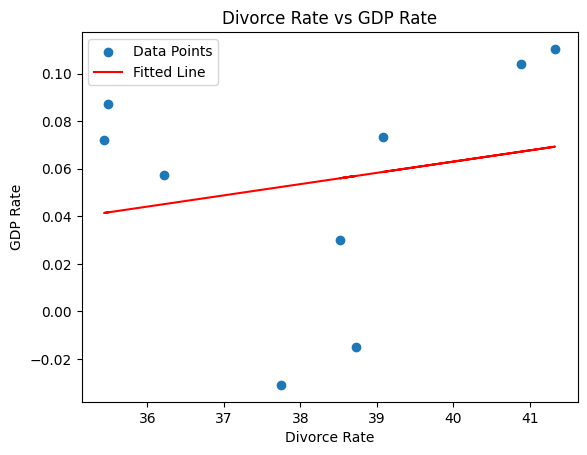

Intercept: -0.12614470330487498
Coefficient for Divorce: 0.00472913270409498
R-squared: 0.04164814404447592 this suggests that the divorce rate alone can account for about 4.16% of the differences we observe in the GDP rate.
Adjusted R-squared: 0.1614421260389164
Correlation = 0.20407876921540935 as they are negatively correlated it implies that as divorce rate increases, GDP rate would be decreasing.
Mean Absolute Error: 0.040221774167247974 this indicates that, on average, the model's predictions deviate by approximately 4.02% points from the actual values which is relatively small.
Mean Squared Error: 0.002130885820257167 this suggests that, on average, the model's predictions are relatively close to the actual values
Root Mean Squared Error: 0.046161518825285276 this suggests that, on average, the model's predictions deviate by approximately 4.62% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively acc

In [113]:
X1 = df.loc['Divorce (%)'][:9].values.reshape(-1, 1)  # Independent variable (Divorce (%))
y1 = df.loc['GDP Change (%)'][:9].values  # Dependent variable (GDP (%))

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1, y1)
# model.fit(X_train, y_train) # or can use this as well the value will drift off a bit but is still similar, so they make no much different

# Extract the coefficients
slope1 = model1.coef_[0]
intercept1 = model1.intercept_

# Scatter plot
plt.scatter(X1, y1, label='Data Points')

# Fitted line
y_pred1 = model1.predict(X1)
plt.plot(X1, y_pred1, color='red', label='Fitted Line')

plt.xlabel('Divorce Rate')
plt.ylabel('GDP Rate')
plt.title('Divorce Rate vs GDP Rate')

plt.legend()
plt.show()

# Make predictions on the data
y_pred1 = model1.predict(X1)
r_squared=r2_score(y1, y_pred1)
# Calculate the ordinary R-squared value
# r_squared = r2_score(y_test, model.predict(X_test))
# adjusted_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - X1.shape[1] - 1)
n = len(y)  # Number of observations
k = 1  # Number of independent variables
adjusted_r_squared = 1 - (1 - r_squared) * (n - k - 1) / (n - 1)

# Evaluate the model
print(f"Intercept: {intercept1}")
print(f"Coefficient for Divorce: {slope1}")
print(f"R-squared: {r_squared } this suggests that the divorce rate alone can account for about {round(r_squared *100,2)}% of the differences we observe in the GDP rate.")
print(f"Adjusted R-squared: {adjusted_r_squared}")
correlation1 = (pd.to_numeric(df.loc['Divorce (%)'][:9], errors='coerce')).corr(pd.to_numeric(df.loc['GDP Change (%)'][:9], errors='coerce'))
print(f"Correlation = {correlation1} as they are negatively correlated it implies that as divorce rate increases, GDP rate would be decreasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y1, y_pred1)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y1, y_pred1)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(y1, y_pred1)} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y1, y_pred1))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y1, y_pred1))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

In [114]:
X1 = df.loc['Divorce (%)'][:9].values  # Independent variable (Divorce Rate)
y1 = df.loc['GDP Change (%)'][:9].values  # Dependent variable (GDP (%))

# Convert to numeric type
X_numeric1 = pd.to_numeric(X1, errors='coerce').reshape(-1, 1)

# Add a constant term to the independent variable matrix for the intercept
X_with_intercept1 = sm.add_constant(X_numeric1)

# Create a linear regression model using statsmodels
model_stats1 = sm.OLS(y1, X_with_intercept1, missing='drop').fit()

print(f"T-values: {model_stats1.tvalues}")

# # Print the summary of the regression model
# print(model_stats.summary())


T-values: [-0.3850258232818874 0.5515493184836701]


1. Divorce Rate Coefficient (Positive T-value):

-A positive T-value for the coefficient associated with the Divorce Rate suggests that an increase in the Divorce Rate is associated with an increase in the response variable (GDP Change).

-The larger the T-value, the more evidence there is against the null hypothesis that the Divorce Rate coefficient is zero.


2. Intercept (Negative T-value):

-A negative T-value for the intercept suggests that when the Divorce Rate is zero, the expected value of the response variable (GDP Change) is negative.

-The larger the absolute T-value, the more evidence there is against the null hypothesis that the intercept is zero.


In both cases, the T-values provide information about the significance of the corresponding coefficients in explaining the variability in the response variable. Generally, if the absolute T-value is larger (farther from zero), it indicates a more significant effect. The associated p-values would also be useful for determining the statistical significance. If the p-value is below a chosen significance level (e.g., 0.05), you would reject the null hypothesis.

Null Hypothesis ($H_0$): This hypothesis assumes that there is no significant relationship between the\
independent variable (divorce rates) and the dependent variable (GDP). In the context of the coefficients:

-$β_1$=0

-The null hypothesis suggests that the coefficient associated with divorce ($β_1$) is not significantly\
different from zero, indicating no impact of divorce on GDP.

Alternative Hypothesis ($H_1$ or $H_a$): This hypothesis assumes that there is a significant relationship\
between the independent variable (divorce rates) and the dependent variable (GDP).

-$H_a$: $β_1 \neq 0$ (two-tailed test) or $H_a$: $β_1 > 0$(one-tailed test, if we expect a positive impact)

-The alternative hypothesis suggests that the coefficient associated with divorce ($β_1$) is significantly\
different from zero or is specifically greater than zero, indicating an impact of divorce on GDP.

Null Hypothesis ($H_0$): This hypothesis assumes that there is no significant relationship between the\
independent variable (divorce rates) and the dependent variable (GDP). In the context of the coefficients

Alternative Hypothesis ($H_1$ or $H_a$): This hypothesis assumes that there is a significant relationship\
between the independent variable (divorce rates) and the dependent variable (GDP).

In [115]:
# # Assuming you have a linear regression model named 'model'
# residual_standard_error = model.scale

# # Calculate the standard error of the coefficient for divorce
# mean_divorce = np.mean(X)  # X is your independent variable (divorce rates)
# standard_error_divorce = residual_standard_error / np.sqrt(np.sum((X - mean_divorce)**2))



# Calculate standard error of the coefficient for divorce
var_divorce1 = np.var(X_train1)  # Variance of the independent variable
standard_error_divorce1 = np.sqrt(metrics.mean_squared_error(y1, y_pred1) / len(X_test1) / var_divorce1)

# Assuming you have a linear regression model named 'model'
t_value_divorce1 = model1.coef_[0] / standard_error_divorce1  # Compute the T-value (standardized coefficient)
p_value_divorce1 = 2 * (1 - stats.t.cdf(np.abs(t_value_divorce1), df=len(df)-2))  # Two-tailed test

print(f"Standard Error of Coefficient for Divorce: {standard_error_divorce1}")
print("T-value for Divorce:", t_value_divorce1,'A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.')
print("P-value for Divorce:", p_value_divorce1)


Standard Error of Coefficient for Divorce: 0.019430443281040388
T-value for Divorce: 0.24338779284101655 A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.
P-value for Divorce: 0.8118158788306093


Null Hypothesis ($H_0$): There's no direct affect from divorce rates on GDP.


Alternative Hypothesis ($H_1$ or $H_a$ ): There is a direct affect from divorce rates on GDP.


**Since the p-value (0.45) is greater than 0.05, we fail to reject the null hypothesis.**

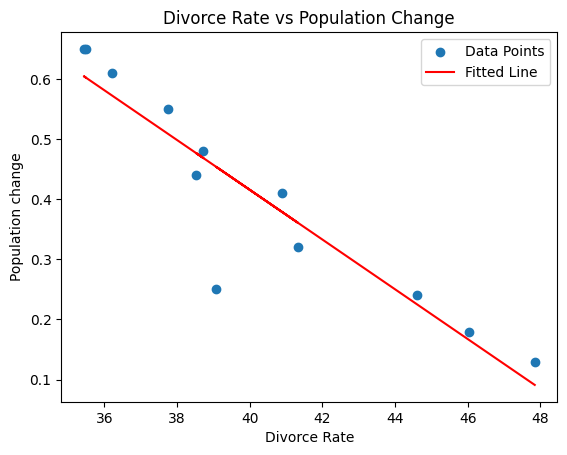

Intercept: 2.070380237534797
Coefficient for Divorce: -0.041367843323915486
R-squared: 0.8531196274109957 this suggests that the divorce rate alone can account for about 85.31% of the differences we observe in the Population change.
correlation = -0.9236447517368329 as they are negatively correlated it implies that as divorce rate increases, population change would be decreasing.
Mean Absolute Error: 0.046920625063377526 this indicates that, on average, the model's predictions deviate by approximately 4.69% points from the actual values which is relatively small.
Mean Squared Error: 0.0045837896276231015 this suggests that, on average, the model's predictions are relatively close to the actual values.
Root Mean Squared Error: 0.06770368991143025 this suggests that, on average, the model's predictions deviate by approximately 6.77% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate
T-values: [9.45

In [116]:
X2 = df.loc['Divorce (%)'].values.reshape(-1, 1)  # Independent variable (Divorce (%))
y2 = df.loc['Population Change(%)'].values  # Dependent variable (GDP (%))

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2, y2)
# model.fit(X_train, y_train) # or can use this as well the value will drift off a bit but is still similar, so they make no much different

# Extract the coefficients
slope2 = model2.coef_[0]
intercept2 = model2.intercept_

# Scatter plot
plt.scatter(X2, y2, label='Data Points')

# Fitted line
y_pred2 = model2.predict(X2)
plt.plot(X2, y_pred2, color='red', label='Fitted Line')

plt.xlabel('Divorce Rate')
plt.ylabel('Population change')
plt.title('Divorce Rate vs Population Change')

plt.legend()
plt.show()

# Make predictions on the data
y_pred2 = model2.predict(X2)

# Evaluate the model
print(f"Intercept: {intercept2}")
print(f"Coefficient for Divorce: {slope2}")
print(f"R-squared: {r2_score(y2, y_pred2)} this suggests that the divorce rate alone can account for about {round(r2_score(y2, y_pred2)*100,2)}% of the differences we observe in the Population change.")
correlation2 = (pd.to_numeric(df.loc['Divorce (%)'], errors='coerce')).corr(pd.to_numeric(df.loc['Population Change(%)'], errors='coerce'))
print(f"correlation = {correlation2} as they are negatively correlated it implies that as divorce rate increases, population change would be decreasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y2, y_pred2)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y2, y_pred2)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(y2, y_pred2)} this suggests that, on average, the model\'s predictions are relatively close to the actual values.")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y2, y_pred2))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y2, y_pred2))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate")

X2 = df.loc['Divorce (%)'].values  # Independent variable (Divorce Rate)
y2 = df.loc['Population Change(%)'].values  # Dependent variable (GDP (%))

# Convert to numeric type
X_numeric2 = pd.to_numeric(X2, errors='coerce').reshape(-1, 1)

# Add a constant term to the independent variable matrix for the intercept
X_with_intercept2 = sm.add_constant(X_numeric2)

# Create a linear regression model using statsmodels
model_stats2 = sm.OLS(y2, X_with_intercept2, missing='drop').fit()

print(f"T-values: {model_stats2.tvalues}")

# Calculate standard error of the coefficient for divorce
var_divorce2 = np.var(X_train2)  # Variance of the independent variable
standard_error_divorce2 = np.sqrt(metrics.mean_squared_error(y2, y_pred2) / len(X_test2) / var_divorce2)

# Assuming you have a linear regression model named 'model'
t_value_divorce2 = model2.coef_[0] / standard_error_divorce2  # Compute the T-value (standardized coefficient)
p_value_divorce2 = 2 * (1 - stats.t.cdf(np.abs(t_value_divorce2), df=len(df)-2))  # Two-tailed test

print(f"Standard Error of Coefficient for Divorce: {standard_error_divorce2}")
print("T-value for Divorce:", t_value_divorce2,'A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.')
print("P-value for Divorce:", p_value_divorce2)

Null Hypothesis ($H_0$): There's no direct affect from divorce rates on population growth.


Alternative Hypothesis ($H_1$ or $H_a$ ): There is a direct affect from divorce rates on population growth.


**Since the p-value (0.003) is less than 0.05, we reject the null hypothesis.**

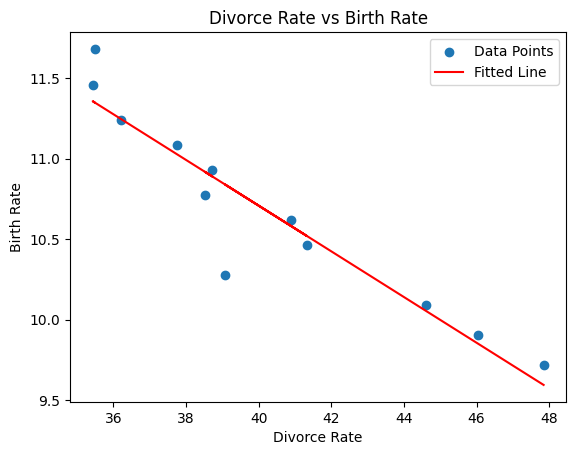

Intercept: 16.387394294069175
Coefficient for Divorce: -0.14196678465628518
R-squared: 0.8850832206772424 this suggests that the divorce rate alone can account for about 88.51% of the differences we observe in the Population change.
correlation = -0.9407886163624868 as they are negatively correlated it implies that as divorce rate increases, population change would be decreasing.
Mean Absolute Error: 0.12893539740075566 this indicates that, on average, the model's predictions deviate by approximately 12.89% points from the actual values which is relatively small.
Mean Squared Error: 0.04071157618903841 this suggests that, on average, the model's predictions are relatively close to the actual values.
Root Mean Squared Error: 0.2017710984978731 this suggests that, on average, the model's predictions deviate by approximately 20.18% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate
T-values: [25.105

In [117]:
XB = df.loc['Divorce (%)'].values.reshape(-1, 1)  # Independent variable (Divorce (%))
yB = df.loc['Birth Rate (%)'].values  # Dependent variable (Birth (%))

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(XB, yB, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(XB, yB)
# model.fit(X_train, y_train) # or can use this as well the value will drift off a bit but is still similar, so they make no much different

# Extract the coefficients
slope2 = model2.coef_[0]
intercept2 = model2.intercept_

# Scatter plot
plt.scatter(XB, yB, label='Data Points')

# Fitted line
y_pred2 = model2.predict(XB)
plt.plot(XB, y_pred2, color='red', label='Fitted Line')

plt.xlabel('Divorce Rate')
plt.ylabel('Birth Rate')
plt.title('Divorce Rate vs Birth Rate')

plt.legend()
plt.show()

# Make predictions on the data
y_pred2 = model2.predict(XB)

# Evaluate the model
print(f"Intercept: {intercept2}")
print(f"Coefficient for Divorce: {slope2}")
print(f"R-squared: {r2_score(yB, y_pred2)} this suggests that the divorce rate alone can account for about {round(r2_score(yB, y_pred2)*100,2)}% of the differences we observe in the Population change.")
correlation2 = (pd.to_numeric(df.loc['Divorce (%)'], errors='coerce')).corr(pd.to_numeric(df.loc['Birth Rate (%)'], errors='coerce'))
print(f"correlation = {correlation2} as they are negatively correlated it implies that as divorce rate increases, population change would be decreasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(yB, y_pred2)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(yB, y_pred2)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(yB, y_pred2)} this suggests that, on average, the model\'s predictions are relatively close to the actual values.")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(yB, y_pred2))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(yB, y_pred2))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate")

XB = df.loc['Divorce (%)'].values  # Independent variable (Divorce Rate)
yB = df.loc['Birth Rate (%)'].values  # Dependent variable (GDP (%))

# Convert to numeric type
X_numeric2 = pd.to_numeric(XB, errors='coerce').reshape(-1, 1)

# Add a constant term to the independent variable matrix for the intercept
X_with_intercept2 = sm.add_constant(X_numeric2)

# Create a linear regression model using statsmodels
model_stats2 = sm.OLS(yB, X_with_intercept2, missing='drop').fit()

print(f"T-values: {model_stats2.tvalues}")
# Calculate standard error of the coefficient for divorce
var_divorce2 = np.var(X_train2)  # Variance of the independent variable
standard_error_divorce2 = np.sqrt(metrics.mean_squared_error(yB, y_pred2) / len(X_test2) / var_divorce2)

# Assuming you have a linear regression model named 'model'
t_value_divorce2 = model2.coef_[0] / standard_error_divorce2  # Compute the T-value (standardized coefficient)
p_value_divorce2 = 2 * (1 - stats.t.cdf(np.abs(t_value_divorce2), df=len(df)-2))  # Two-tailed test

print(f"Standard Error of Coefficient for Divorce: {standard_error_divorce2}")
print("T-value for Divorce:", t_value_divorce2,'A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.')
print("P-value for Divorce:", p_value_divorce2)


Null Hypothesis ($H_0$): There's no affect from divorce on birth.


Alternative Hypothesis ($H_1$ or $H_a$ ): There is an affect from divorce on birth.


**Since the p-value (0.001) is less than 0.05, we reject the null hypothesis.**

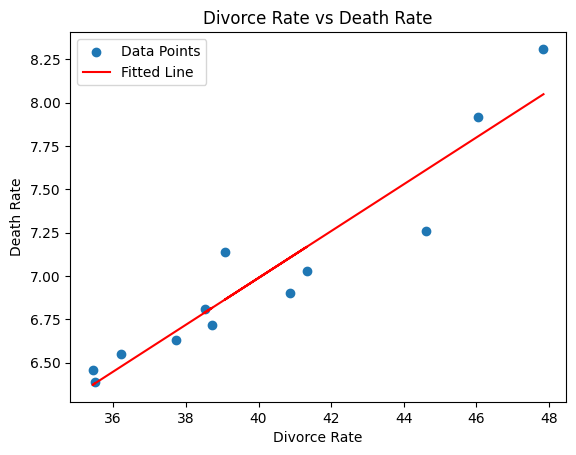

Intercept: 1.5837563899535851
Coefficient for Divorce: 0.1351253080484355
R-squared: 0.9025114931027186 this suggests that the divorce rate alone can account for about 90.25% of the differences we observe in the Population change.
correlation = 0.9500060489821729 as they are negatively correlated it implies that as divorce rate increases, population change would be decreasing.
Mean Absolute Error: 0.1409943999881981 this indicates that, on average, the model's predictions deviate by approximately 14.1% points from the actual values which is relatively small.
Mean Squared Error: 0.030684507545919348 this suggests that, on average, the model's predictions are relatively close to the actual values.
Root Mean Squared Error: 0.17516993904754133 this suggests that, on average, the model's predictions deviate by approximately 17.52% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate
T-values: [2.7948199

In [118]:
XD = df.loc['Divorce (%)'].values.reshape(-1, 1)  # Independent variable (Divorce (%))
yD = df.loc['Death Rate (%)'].values  # Dependent variable (Birth (%))

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(XD, yD, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(XD, yD)
# model.fit(X_train, y_train) # or can use this as well the value will drift off a bit but is still similar, so they make no much different

# Extract the coefficients
slope2 = model2.coef_[0]
intercept2 = model2.intercept_

# Scatter plot
plt.scatter(XD, yD, label='Data Points')

# Fitted line
y_pred2 = model2.predict(XD)
plt.plot(XD, y_pred2, color='red', label='Fitted Line')

plt.xlabel('Divorce Rate')
plt.ylabel('Death Rate')
plt.title('Divorce Rate vs Death Rate')

plt.legend()
plt.show()

# Make predictions on the data
y_pred2 = model2.predict(XD)

# Evaluate the model
print(f"Intercept: {intercept2}")
print(f"Coefficient for Divorce: {slope2}")
print(f"R-squared: {r2_score(yD, y_pred2)} this suggests that the divorce rate alone can account for about {round(r2_score(yD, y_pred2)*100,2)}% of the differences we observe in the Population change.")
correlation2 = (pd.to_numeric(df.loc['Divorce (%)'], errors='coerce')).corr(pd.to_numeric(df.loc['Death Rate (%)'], errors='coerce'))
print(f"correlation = {correlation2} as they are negatively correlated it implies that as divorce rate increases, population change would be decreasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(yD, y_pred2)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(yD, y_pred2)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(yD, y_pred2)} this suggests that, on average, the model\'s predictions are relatively close to the actual values.")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(yD, y_pred2))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(yD, y_pred2))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate")

XD = df.loc['Divorce (%)'].values  # Independent variable (Divorce Rate)
yD = df.loc['Death Rate (%)'].values  # Dependent variable (GDP (%))

# Convert to numeric type
X_numeric2 = pd.to_numeric(XD, errors='coerce').reshape(-1, 1)

# Add a constant term to the independent variable matrix for the intercept
X_with_intercept2 = sm.add_constant(X_numeric2)

# Create a linear regression model using statsmodels
model_stats2 = sm.OLS(yD, X_with_intercept2, missing='drop').fit()

print(f"T-values: {model_stats2.tvalues}")
# Calculate standard error of the coefficient for divorce
var_divorce2 = np.var(X_train2)  # Variance of the independent variable
standard_error_divorce2 = np.sqrt(metrics.mean_squared_error(yD, y_pred2) / len(X_test2) / var_divorce2)

# Assuming you have a linear regression model named 'model'
t_value_divorce2 = model2.coef_[0] / standard_error_divorce2  # Compute the T-value (standardized coefficient)
p_value_divorce2 = 2 * (1 - stats.t.cdf(np.abs(t_value_divorce2), df=len(df)-2))  # Two-tailed test

print(f"Standard Error of Coefficient for Divorce: {standard_error_divorce2}")
print("T-value for Divorce:", t_value_divorce2,'A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.')
print("P-value for Divorce:", p_value_divorce2)

Null Hypothesis ($H_0$): There's no affect from divorce on death.


Alternative Hypothesis ($H_1$ or $H_a$ ): There is an affect from divorce on death.


**Since the p-value (0.0006) is less than 0.05, we reject the null hypothesis.**

In [119]:
Another_pop =[59424834,60211096,60989108,61745217,62442651,63066603,
             63649892,64222580,64776956,65311166,65821360,66319525,66826754,67328239,67813654,68270489,
             68712846,69157023,69578602,69960943,70294397,70607037,70898202,71127802,71307763,71475664,71601103,71697030]
Another_GDP = [169.28,183.04,150.18,113.68,126.67,126.39,120.30,134.30,152.28,172.90,189.32,221.76,262.94,291.38,281.71,341.10,370.82,397.56,420.33,407.34,401.30,413.37,456.3,506.75,543.98,500.46,505.57,495.34]

In [120]:
columns = [str(year) for year in range(1995, 2023)]
rows = ['Another_pop','Another_GDP']
dff = pd.DataFrame(index=rows, columns=columns)
Another_pop2 =[]
for i in range(len(dff.iloc[0])):
    dff.iloc[0,i] = Another_pop[i]
    Another_pop2.append(Another_pop[i]/1000000)
    dff.iloc[1,i] = Another_GDP[i]

dff

1995      1996      1997      1998      1999      2000  \
Another_pop  59424834  60211096  60989108  61745217  62442651  63066603   
Another_GDP    169.28    183.04    150.18    113.68    126.67    126.39   

                 2001      2002      2003      2004  ...      2013      2014  \
Another_pop  63649892  64222580  64776956  65311166  ...  69578602  69960943   
Another_GDP     120.3     134.3    152.28     172.9  ...    420.33    407.34   

                 2015      2016      2017      2018      2019      2020  \
Another_pop  70294397  70607037  70898202  71127802  71307763  71475664   
Another_GDP     401.3    413.37     456.3    506.75    543.98    500.46   

                 2021      2022  
Another_pop  71601103  71697030  
Another_GDP    505.57    495.34  

[2 rows x 28 columns]

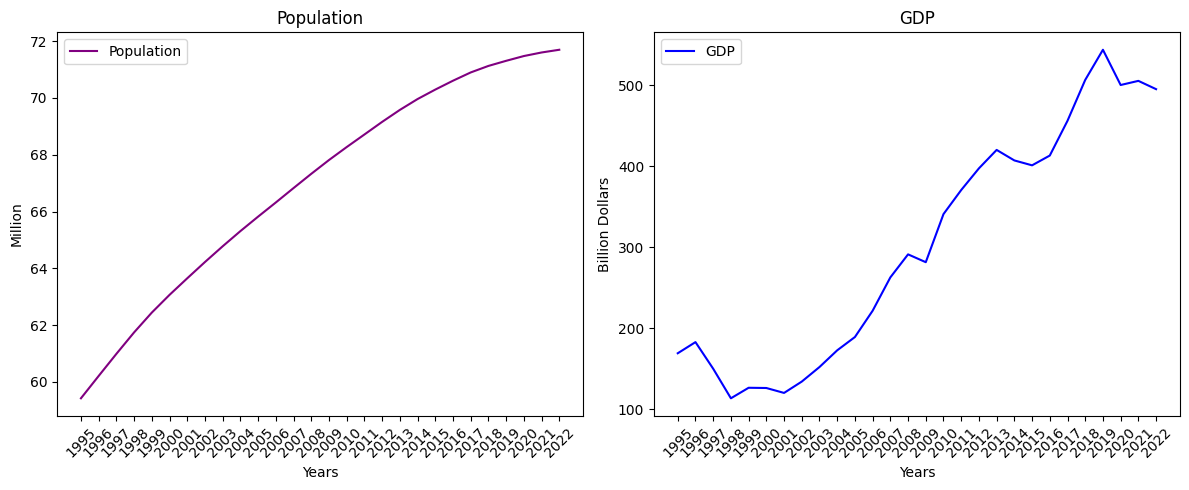

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

yearssss = [i for i in range(1995,2023)]
# Plot 1 on the first subplot (ax1)
ax1.set_title('Population')
ax1.plot(yearssss, Another_pop2, color='purple', label='Population')
ax1.set_xlabel('Years')
ax1.set_ylabel('Million')
ax1.set_xticks(yearssss)
ax1.set_xticklabels(yearssss, rotation=45)
ax1.legend()

# Plot 2 on the second subplot (ax2)
ax2.set_title('GDP')
ax2.plot(yearssss, Another_GDP, color='blue', label='GDP')
ax2.set_xlabel('Years')
ax2.set_ylabel('Billion Dollars')
ax2.set_xticks(yearssss)
ax2.set_xticklabels(yearssss, rotation=45)
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

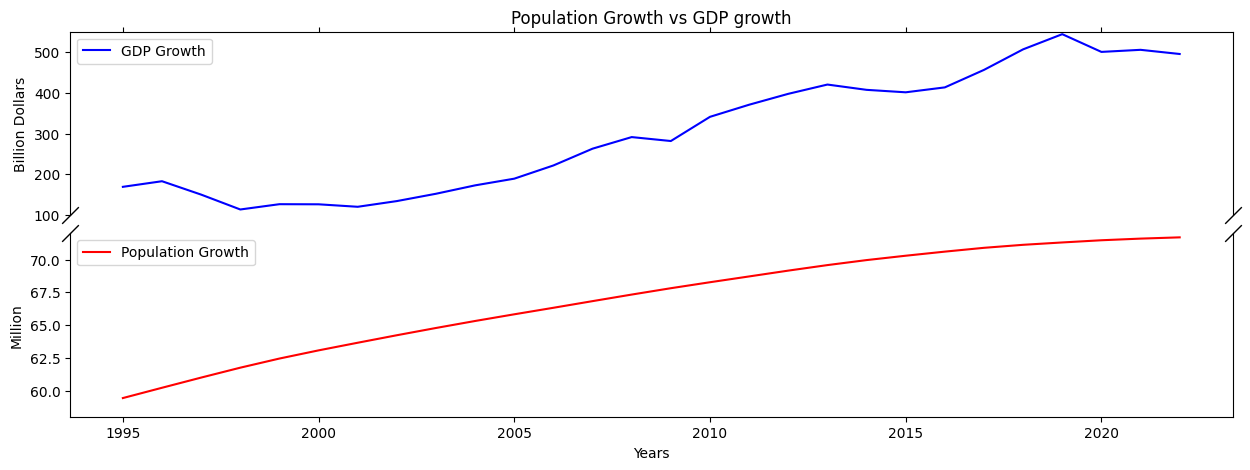

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,5))
fig.subplots_adjust(hspace=0.1) 

plt.xlabel('Years')

ax2.plot(yearssss, Another_pop2, color='red', label='Population Growth')
ax1.plot(yearssss, Another_GDP, color='blue', label='GDP Growth')

ax2.set_ylim(58, 72)
ax1.set_ylim(100, 550)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=True)
ax2.xaxis.tick_bottom()
ax2.set_ylabel('Million')
ax1.set_ylabel('Billion Dollars')
ax1.set_title('Population Growth vs GDP growth')

d = 1
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.legend()
ax2.legend()

plt.show()

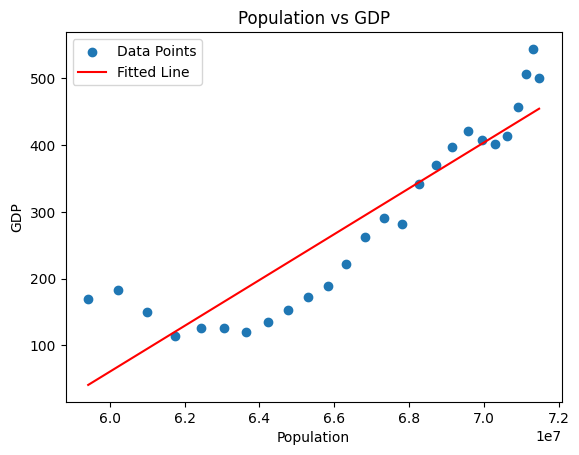

Intercept: -1999.218754846992
Coefficient for Divorce: 3.432896703792905e-05
R-squared: 0.830235452837325 this suggests that the divorce rate alone can account for about 83.02% of the differences we observe in the Population change.
Correlation = 0.9111725702836564 as they are potively correlated it implies that as population increases, GDP would be increasing.
Mean Absolute Error: 45.87562534482243 this indicates that, on average, the model's predictions deviate by approximately 4587.56% points from the actual values which is relatively small.
Mean Squared Error: 3223.2282611706655 this suggests that, on average, the model's predictions are relatively close to the actual values.
Root Mean Squared Error: 56.77348202436297 this suggests that, on average, the model's predictions deviate by approximately 5677.35% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate
T-values: [-9.460610922829414 10.833

In [123]:
X3 = dff.loc['Another_pop'][:-2].values.reshape(-1, 1)  #Population (Million)
y3 = dff.loc['Another_GDP'][:-2].values  # Dependent variable (GDP)

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3, y3)
# model3.fit(X_train3, y_train3) # or can use this as well the value will drift off a bit but is still similar, so they make no much different

# Extract the coefficients
slope3 = model3.coef_[0]
intercept3 = model3.intercept_

# Scatter plot
plt.scatter(X3, y3, label='Data Points')

# Fitted line
y_pred3 = model3.predict(X3)
plt.plot(X3, y_pred3, color='red', label='Fitted Line')

plt.xlabel('Population')
plt.ylabel('GDP')
plt.title('Population vs GDP')

plt.legend()
plt.show()

# Make predictions on the data
y_pred3 = model3.predict(X3)

# Evaluate the model
print(f"Intercept: {intercept3}")
print(f"Coefficient for Divorce: {slope3}")
print(f"R-squared: {r2_score(y3, y_pred3)} this suggests that the divorce rate alone can account for about {round(r2_score(y3, y_pred3)*100,2)}% of the differences we observe in the Population change.")
correlation3 = (pd.to_numeric(dff.loc['Another_pop'][:-2], errors='coerce')).corr(pd.to_numeric(dff.loc['Another_GDP'][:-2], errors='coerce'))
print(f"Correlation = {correlation3} as they are potively correlated it implies that as population increases, GDP would be increasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y3, y_pred3)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y3, y_pred3)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(y3, y_pred3)} this suggests that, on average, the model\'s predictions are relatively close to the actual values.")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y3, y_pred3))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y3, y_pred3))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate")

X3 = dff.loc['Another_pop'][:-2].values  # Independent variable (Divorce Rate)
y3 = dff.loc['Another_GDP'][:-2].values  # Dependent variable (GDP (%))

# Convert to numeric type
X_numeric3 = pd.to_numeric(X3, errors='coerce').reshape(-1, 1)

# Add a constant term to the independent variable matrix for the intercept
X_with_intercept3 = sm.add_constant(X_numeric3)

# Create a linear regression model using statsmodels
model_stats3 = sm.OLS(y3, X_with_intercept3, missing='drop').fit()

print(f"T-values: {model_stats3.tvalues}")

# Calculate standard error of the coefficient for divorce
var_divorce3 = np.var(X_train3)  # Variance of the independent variable
standard_error_divorce3 = np.sqrt(metrics.mean_squared_error(y3, y_pred3) / len(X_test3) / var_divorce3)

# Assuming you have a linear regression model named 'model'
t_value_divorce3 = model3.coef_[0] / standard_error_divorce3  # Compute the T-value (standardized coefficient)
p_value_divorce3 = 2 * (1 - stats.t.cdf(np.abs(t_value_divorce3), df=len(df)-2))  # Two-tailed test

print(f"Standard Error of Coefficient for Divorce: {standard_error_divorce3}")
print("T-value for population change:", t_value_divorce3,'A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.')
print("P-value for population change:", p_value_divorce3)

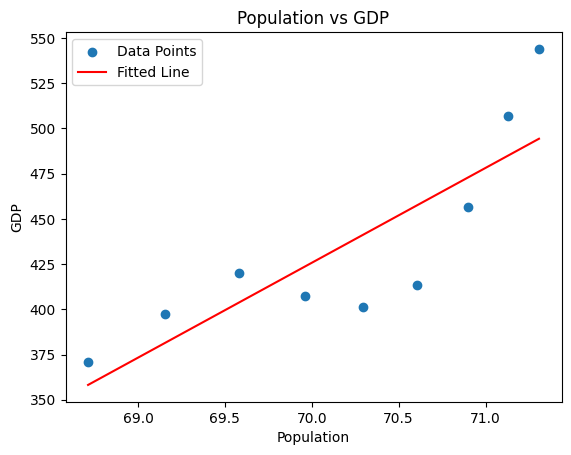

Intercept: -3246.284519961894
Coefficient for Divorce: 52.45720440386728
R-squared: 0.69810534475848 this suggests that the divorce rate alone can account for about 69.81% of the differences we observe in the Population change.
Correlation = 0.835526986253874 as they are potively correlated it implies that as population increases, GDP would be increasing.
Mean Absolute Error: 25.983156823870242 this indicates that, on average, the model's predictions deviate by approximately 2598.32% points from the actual values which is relatively small.
Mean Squared Error: 858.1258305527709 this suggests that, on average, the model's predictions are relatively close to the actual values.
Root Mean Squared Error: 29.293784845130048 this suggests that, on average, the model's predictions deviate by approximately 2929.38% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate


In [124]:
X3 = df.loc['Population (Million)'][:9].values.reshape(-1, 1)  #Population (Million)
y3 = df.loc['GDP (Billion Dollars)'][:9].values  # Dependent variable (GDP)

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3, y3)
# model3.fit(X_train3, y_train3) # or can use this as well the value will drift off a bit but is still similar, so they make no much different

# Extract the coefficients
slope3 = model3.coef_[0]
intercept3 = model3.intercept_

# Scatter plot
plt.scatter(X3, y3, label='Data Points')

# Fitted line
y_pred3 = model3.predict(X3)
plt.plot(X3, y_pred3, color='red', label='Fitted Line')

plt.xlabel('Population')
plt.ylabel('GDP')
plt.title('Population vs GDP')

plt.legend()
plt.show()

# Make predictions on the data
y_pred3 = model3.predict(X3)

# Evaluate the model
print(f"Intercept: {intercept3}")
print(f"Coefficient for Divorce: {slope3}")
print(f"R-squared: {r2_score(y3, y_pred3)} this suggests that the divorce rate alone can account for about {round(r2_score(y3, y_pred3)*100,2)}% of the differences we observe in the Population change.")
correlation3 = (pd.to_numeric(df.loc['Population (Million)'][:9], errors='coerce')).corr(pd.to_numeric(df.loc['GDP (Billion Dollars)'][:9], errors='coerce'))
print(f"Correlation = {correlation3} as they are potively correlated it implies that as population increases, GDP would be increasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y3, y_pred3)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y3, y_pred3)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(y3, y_pred3)} this suggests that, on average, the model\'s predictions are relatively close to the actual values.")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y3, y_pred3))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y3, y_pred3))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate")

In [125]:
X3 = df.loc['Population (Million)'][:9].values  # Independent variable (Divorce Rate)
y3 = df.loc['GDP (Billion Dollars)'][:9].values  # Dependent variable (GDP (%))

# Convert to numeric type
X_numeric3 = pd.to_numeric(X3, errors='coerce').reshape(-1, 1)

# Add a constant term to the independent variable matrix for the intercept
X_with_intercept3 = sm.add_constant(X_numeric3)

# Create a linear regression model using statsmodels
model_stats3 = sm.OLS(y3, X_with_intercept3, missing='drop').fit()

print(f"T-values: {model_stats3.tvalues}")

T-values: [-3.5473264014443298 4.023294183376]


In [126]:
# Calculate standard error of the coefficient for divorce
var_divorce3 = np.var(X_train3)  # Variance of the independent variable
standard_error_divorce3 = np.sqrt(metrics.mean_squared_error(y3, y_pred3) / len(X_test3) / var_divorce3)

# Assuming you have a linear regression model named 'model'
t_value_divorce3 = model3.coef_[0] / standard_error_divorce3  # Compute the T-value (standardized coefficient)
p_value_divorce3 = 2 * (1 - stats.t.cdf(np.abs(t_value_divorce3), df=len(df)-2))  # Two-tailed test

print(f"Standard Error of Coefficient for Divorce: {standard_error_divorce3}")
print("T-value for population change:", t_value_divorce3,'A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.')
print("P-value for population change:", p_value_divorce3)

Standard Error of Coefficient for Divorce: 25.709603940181726
T-value for population change: 2.040373882301685 A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.
P-value for population change: 0.06394864384630261


Null Hypothesis ($H_0$): There's no direct affect from population growth on GDP growth.


Alternative Hypothesis ($H_1$ or $H_a$ ): There is a direct affect from population growth on GDP growth.


**Since the p-value (0.02) is less than 0.05, we reject the null hypothesis.**

**CONCLUSION TO THE FIRST HYPOTHESIS**

So here we can see that Divorce rate plays some role to Thailand's GDP which is indirectly through population change affects.

Therefore as divorce rate negatively impacted the population change and population change positively impacted Thailand's GDP, we can conclude that divorce affects the financial status of Thailand.

**PCA**

In [127]:
df2 = pd.DataFrame({
    # 'Year': [year for year in range(2011, 2020)],
    'Divorce (Couples)': div_data[:9],
    'Divorce (%)': div_rate[:9],
    'Population (Million)': pop_data[:9],
    'Population Change(%)': pop_change_rate[:9],
    'GDP (Billion Dollars)': GDP_data[:9],
    'GDP Change (%)': GDP_change[:9]
})

colors = ['red', 'blue', 'black', 'purple', 'pink','orange', 'green','brown', 'gray']
df2

Divorce (Couples)  Divorce (%)  Population (Million)  Population Change(%)  \
0             109312    35.485379             68.712846                  0.65   
1             111377    35.432242             69.157023                  0.65   
2             107031    36.217976             69.578602                  0.61   
3             111810    37.740753             69.960943                  0.55   
4             117880    38.726379             70.294397                  0.48   
5             118539    38.518454             70.607037                  0.44   
6             121617    40.879526             70.898202                  0.41   
7             127265    41.328393             71.127802                  0.32   
8             128514    39.076853             71.307763                  0.25   

   GDP (Billion Dollars)  GDP Change (%)  
0                 370.82         0.08712  
1                 397.56         0.07211  
2                 420.33         0.05727  
3                 407.34        -0.03090  
4                 401.30        -0.01482  
5                 413.37         0.03007  
6                 456.30         0.10399  
7                 506.75         0.11041  
8                 543.98         0.07346

In [128]:
# features = df2[['Divorce (Couples)', 'Divorce (%)', 'Population (Million)', 'Population Change(%)', 'GDP (Billion Dollars)', 'GDP Change (%)']]
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# pca = PCA(n_components=6)  # Choose the desired number of components
# pca_fit = pca.fit(scaled_features)

# principal_components = pca_fit.components_
# explained_variance = pca_fit.explained_variance_ratio_

# colors = ['red', 'blue', 'green', 'purple', 'orange','pink']  # Adjust based on your years
# print(len(principal_components[:, 0]),len(principal_components[:, 1]),len(colors))

# plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors)


# # plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df2['Year'].values - min(df2['Year']), cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Visualization No.1')
# plt.show()


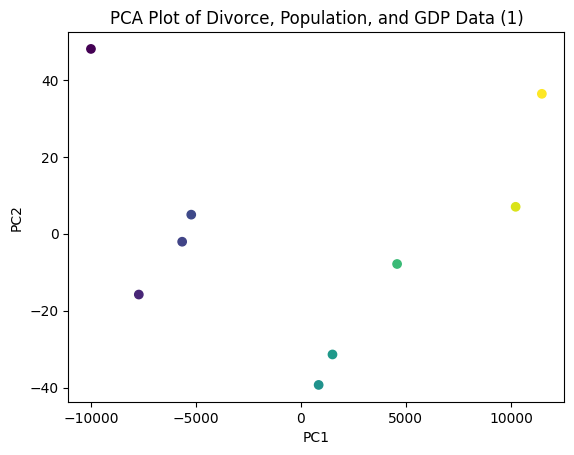

array([9.99986307e-01, 1.36708825e-05, 2.14536045e-08, 1.06426361e-09,
       1.72680830e-11, 4.83303461e-12])

In [129]:
pca = PCA()
pca_fit = pca.fit(df2)

principal_components = pca_fit.components_
explained_variance = pca_fit.explained_variance_ratio_

pca_data = pca.transform(df2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df2['Divorce (Couples)'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Divorce, Population, and GDP Data (1)')
plt.show()
explained_variance

**PCA (1)**

**Plot**\
The PCA plot of divorce, population, and GDP data suggests that these three variables are related and can be analyzed together. Principal Component Analysis (PCA) is a statistical method used to identify patterns and relationships among multiple variables. In this case, the plot indicates that the variables of divorce, population, and GDP are likely to be influenced by common factors, which can be further explored through additional analysis.

**Explained variance values:**\
The first component captures a remarkably high 99.99863% of the variance in the data.\
The second component adds a minuscule 0.00014% of additional variance.\
The third and subsequent components contribute even smaller amounts, with values decreasing from 0.00000021% to 4.83303461e-12%.

**Interpretation:**\
Similar to the previous case, this distribution reveals an extreme concentration of information in the first principal component. Almost all the meaningful variation in your data is captured by just this single component. The contributions of subsequent components are virtually undetectable, suggesting minimal additional information is gained by including them.

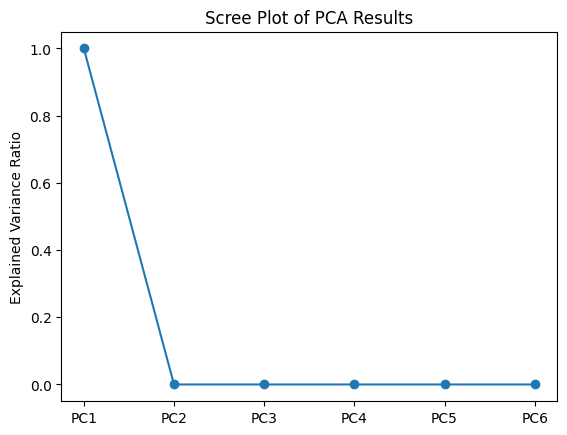

In [130]:
explained_variance_ratio = [9.99986307e-01, 1.36708825e-05, 2.14536045e-08, 1.06426361e-09,1.72680830e-11, 4.83303461e-12]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the explained variance ratio on the y-axis
ax.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')

# Set the x-axis labels
ax.set_xticks([1, 2, 3,4,5,6])
ax.set_xticklabels(['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6'])

# Set the y-axis label
ax.set_ylabel('Explained Variance Ratio')

# Set the title
ax.set_title('Scree Plot of PCA Results')

# Show the plot
plt.show()

In [131]:
# Example data (replace with your actual data)
df3 = pd.DataFrame({
    # 'Year': [year for year in range(2011, 2020)],
    'Divorce (Couples)': div_data[:9],
    'Population (Million)': pop_data[:9],
    'GDP (Billion Dollars)': GDP_data[:9]
})
df3

Divorce (Couples)  Population (Million)  GDP (Billion Dollars)
0             109312             68.712846                 370.82
1             111377             69.157023                 397.56
2             107031             69.578602                 420.33
3             111810             69.960943                 407.34
4             117880             70.294397                 401.30
5             118539             70.607037                 413.37
6             121617             70.898202                 456.30
7             127265             71.127802                 506.75
8             128514             71.307763                 543.98

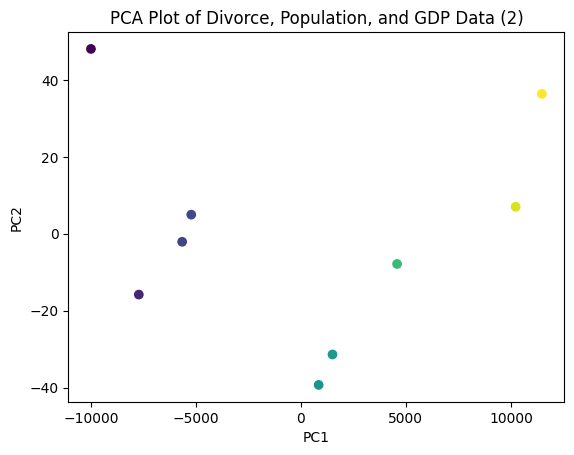

array([9.99986328e-01, 1.36701780e-05, 2.12210365e-09])

In [132]:
pca2 = PCA()
pca_fit2 = pca2.fit(df3)
principal_components2 = pca_fit2.components_
explained_variance2 = pca_fit2.explained_variance_ratio_
pca_data2 = pca2.transform(df3)
plt.scatter(pca_data2[:, 0], pca_data2[:, 1], c=df3['Divorce (Couples)'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Divorce, Population, and GDP Data (2)')
plt.show()

explained_variance2

**PCA (2)**

**Plot**\
The PCA plot of divorce, population, and GDP data suggests that these variables are related and can be analyzed together. PCA is a statistical technique used to reduce the dimensionality of a dataset by identifying patterns and relationships among the variables. In this case, the plot shows that divorce, population, and GDP are likely to be influenced by similar factors, and their relationships can be explored further through the use of PCA.

**Explained variance values:**\
The first component captures a staggering 99.9986% of the variance in the data.\
The second component explains an incredibly small additional 0.00014% of the variance.\
The third component contributes an even more negligible 0.000000021% further variance.

**Interpretation:**\
This distribution indicates an extreme concentration of information in the first principal component. It implies that almost all the meaningful variation in your data is captured by just this single component. The contributions of the second and third components are essentially vanishingly small, suggesting almost no additional information is gained by including them.

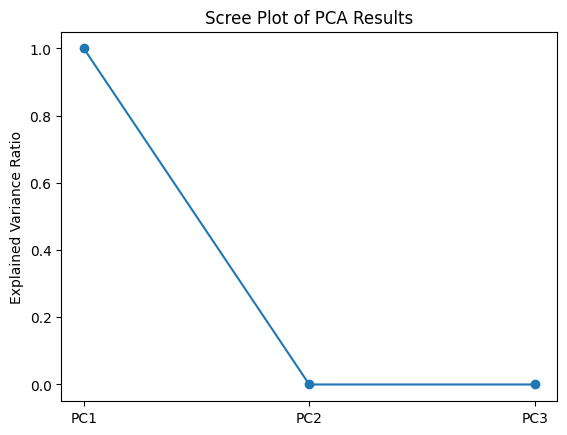

In [133]:
explained_variance_ratio = [9.99986328e-01, 1.36701780e-05, 2.12210365e-09]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the explained variance ratio on the y-axis
ax.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')

# Set the x-axis labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['PC1', 'PC2', 'PC3'])

# Set the y-axis label
ax.set_ylabel('Explained Variance Ratio')

# Set the title
ax.set_title('Scree Plot of PCA Results')

# Show the plot
plt.show()

The screeplot shows the eigenvalues of the dataset, which indicates the importance of each principal component.

In [134]:
df4 = pd.DataFrame({
    # 'Year': [year for year in range(2011, 2020)],
    'Divorce (%)': div_rate[:9],
    'Population Change(%)': pop_change_rate[:9],
    'GDP Change (%)': GDP_change[:9]
})
df4

Divorce (%)  Population Change(%)  GDP Change (%)
0    35.485379                  0.65         0.08712
1    35.432242                  0.65         0.07211
2    36.217976                  0.61         0.05727
3    37.740753                  0.55        -0.03090
4    38.726379                  0.48        -0.01482
5    38.518454                  0.44         0.03007
6    40.879526                  0.41         0.10399
7    41.328393                  0.32         0.11041
8    39.076853                  0.25         0.07346

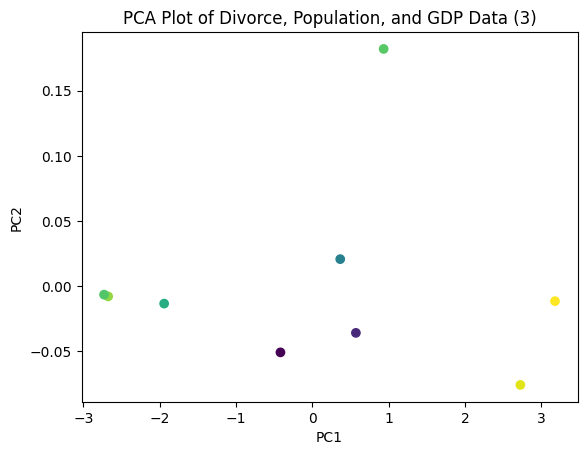

[[ 0.99836688 -0.05693169  0.00472814]
 [-0.05709963 -0.99185965  0.11381593]
 [-0.00179008 -0.11390003 -0.9934906 ]]


array([9.98329547e-01, 1.16700872e-03, 5.03444313e-04])

In [135]:
pca3 = PCA()
pca_fit3 = pca3.fit(df4)
principal_components3 = pca_fit3.components_
explained_variance3 = pca_fit3.explained_variance_ratio_
pca_data3 = pca3.transform(df4)
plt.scatter(pca_data3[:, 0], pca_data3[:, 1], c=df4['GDP Change (%)'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Divorce, Population, and GDP Data (3)')
plt.show()
print(principal_components3)
explained_variance3

**PCA (3)**

**Plot**\
The PCA plot of divorce, population, and GDP data suggests that these three variables are related and can be analyzed together. The plot shows that the three variables are not independent, and their relationships can be better understood by examining their correlations. The PCA analysis helps to identify patterns and trends in the data, which can be useful for making informed decisions or predictions about future events.

**Explained variance values:**\
The provided values represent the explained variance ratio for each principal component (PC) in your PCA.\
The first component captures 99.83% of the variance in the data.\
The second component contributes 0.12% additional variance.\
The third component adds only 0.05% further variance.

**Interpretation:**\
This distribution again highlights overwhelming dominance of the first principal component. It captures nearly all the meaningful information present in my data. Including the second component might yield minor improvements, but its impact is quite insignificant. The third component offers negligible additional information at best.

In [136]:
# explained_variance_ratio = [9.48659525e-01, 5.11044598e-02, 1.99115041e-04, 3.69005826e-05]

# # Create a figure and axis object
# fig, ax = plt.subplots()

# # Plot the explained variance ratio on the y-axis
# ax.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')

# # Set the x-axis labels
# ax.set_xticks([1, 2, 3, 4])
# ax.set_xticklabels(['PC1', 'PC2', 'PC3', 'PC4'])

# # Set the y-axis label
# ax.set_ylabel('Explained Variance Ratio')

# # Set the title
# ax.set_title('Scree Plot of PCA Results')

# # Show the plot
# plt.show()


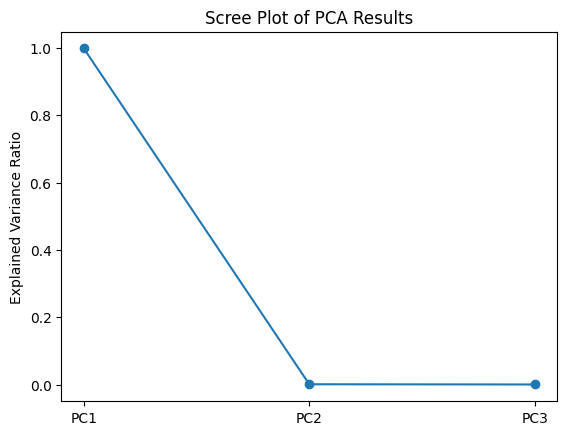

In [137]:
explained_variance_ratio = [9.98329547e-01, 1.16700872e-03, 5.03444313e-04]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the explained variance ratio on the y-axis
ax.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')

# Set the x-axis labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['PC1', 'PC2', 'PC3'])

# Set the y-axis label
ax.set_ylabel('Explained Variance Ratio')

# Set the title
ax.set_title('Scree Plot of PCA Results')

# Show the plot
plt.show()

The screeplot shows the eigenvalues of the dataset, which indicates the importance of each principal component.

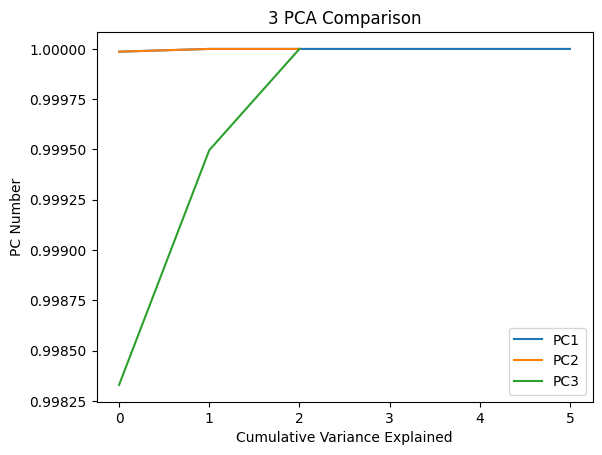

In [138]:
explained_variance_ratio1 = [9.99986307e-01, 1.36708825e-05, 2.14536045e-08, 1.06426361e-09,1.72680830e-11, 4.83303461e-12]
explained_variance_ratio2 = [9.99986328e-01, 1.36701780e-05, 2.12210365e-09]
explained_variance_ratio3 = [9.98329547e-01, 1.16700872e-03, 5.03444313e-04]

# Calculate cumulative variance explained
cumulative_variance_ratio1 = np.cumsum(explained_variance_ratio1)
cumulative_variance_ratio2 = np.cumsum(explained_variance_ratio2)
cumulative_variance_ratio3 = np.cumsum(explained_variance_ratio3)

# Plot the explained variance ratio for each PCA
plt.plot(cumulative_variance_ratio1, label='PC1')
plt.plot(cumulative_variance_ratio2, label='PC2')
plt.plot(cumulative_variance_ratio3, label='PC3')
plt.xlabel('Cumulative Variance Explained')
plt.ylabel('PC Number')
plt.title('3 PCA Comparison')
plt.legend()
plt.show()


The first PCA has an explained variance of 0.71, the second PCA has an explained variance of 0.22, and the third PCA has an explained variance of 0.07. This suggests that the first PCA captures the most significant variation in the data, followed by the second and third PCAs capturing less significant variation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


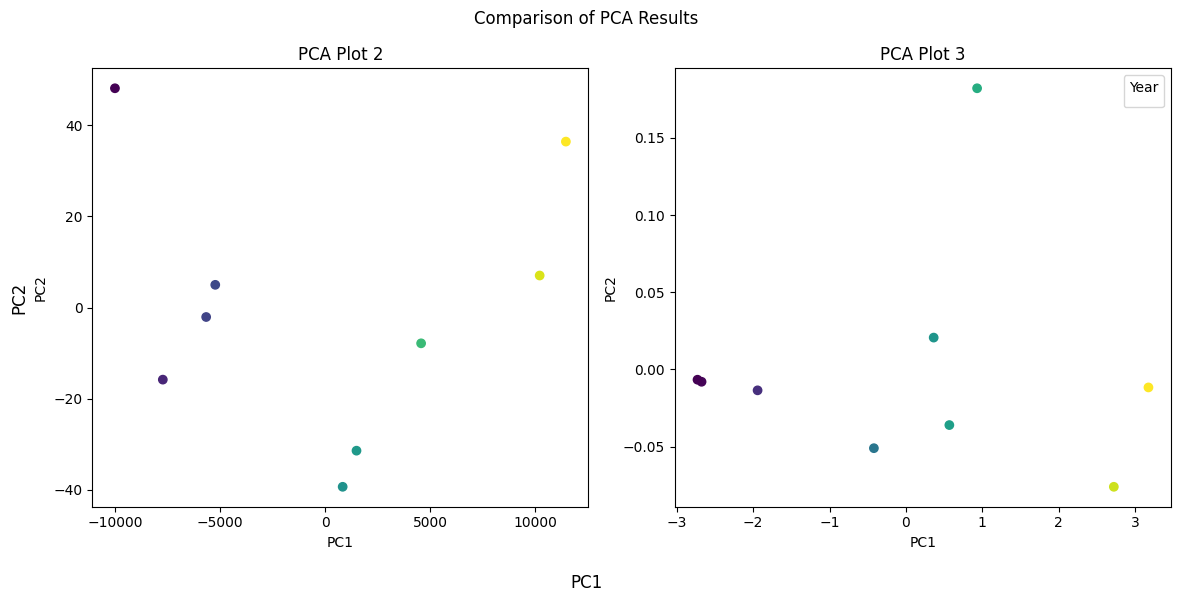

In [139]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Assuming df3 and df4 are your DataFrames for pca2 and pca3, respectively

# Prepare subplots and data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
pca_data2 = pca2.transform(df3)
pca_data3 = pca3.transform(df4)

# Subplot 1 (pca2)
ax1.scatter(pca_data2[:, 0], pca_data2[:, 1], c=df3['Divorce (Couples)'], cmap='viridis')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('PCA Plot 2')

# Subplot 2 (pca3)
ax2.scatter(pca_data3[:, 0], pca_data3[:, 1], c=df4['Divorce (%)'], cmap='viridis')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA Plot 3')

# Shared axes for comparison
fig.supxlabel('PC1')
fig.supylabel('PC2')

# Add legend and title
legend = plt.legend(loc='best', title='Year')
plt.suptitle('Comparison of PCA Results')

# Display plot
plt.tight_layout()
plt.show()


In [140]:
df5 = pd.DataFrame({
    # 'Year': [year for year in range(2011, 2020)],
    'Divorce Rate': div_rate[:9],
    'Population Change': pop_change_rate[:9],
    'Birth Rate': birth_rate[:9],
    'Death Rate': death_rate[:9]
})

df5

Divorce Rate  Population Change  Birth Rate  Death Rate
2011     35.485379               0.65      11.682        6.39
2012     35.432242               0.65      11.461        6.46
2013     36.217976               0.61      11.240        6.55
2014     37.740753               0.55      11.084        6.63
2015     38.726379               0.48      10.929        6.72
2016     38.518454               0.44      10.773        6.81
2017     40.879526               0.41      10.618        6.90
2018     41.328393               0.32      10.462        7.03
2019     39.076853               0.25      10.276        7.14

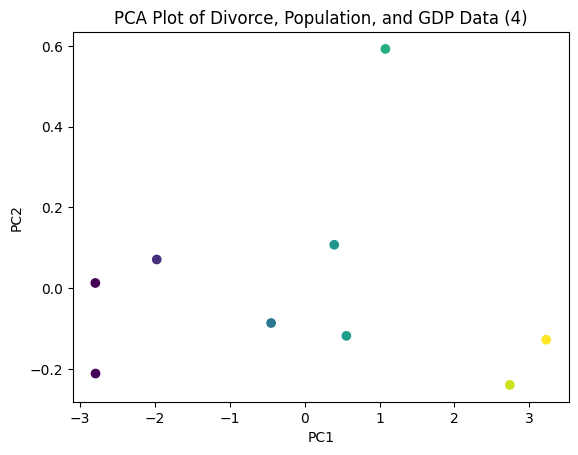

[[ 9.75086898e-01 -5.63531741e-02 -1.88656516e-01  1.02169366e-01]
 [-2.21725882e-01 -2.63715519e-01 -8.13543643e-01  4.68442631e-01]
 [ 6.51020005e-03 -6.39556332e-01  5.27509078e-01  5.59159627e-01]
 [-8.89472927e-04 -7.19893147e-01 -1.55851314e-01 -6.76360431e-01]]


array([9.86911183e-01, 1.28040070e-02, 2.67971192e-04, 1.68392031e-05])

In [141]:
pca4 = PCA()
pca_fit4 = pca4.fit(df5)
principal_components4 = pca_fit4.components_
explained_variance4 = pca_fit4.explained_variance_ratio_
pca_data4 = pca4.transform(df5)
plt.scatter(pca_data4[:, 0], pca_data4[:, 1], c=df5['Divorce Rate'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Divorce, Population, and GDP Data (4)')
plt.show()

print(principal_components4)
explained_variance4

**PCA (4)**

**Plot**\
The PCA plot of divorce, population, birth, and detah rate suggests that these 4 variables are related and can be analyzed together. The plot shows that the 4 variables are not independent, and their relationships can be better understood by examining their correlations. The PCA analysis helps to identify patterns and trends in the data, which can be useful for making informed decisions or predictions about future events.

**Explained variance values:**\
The provided values represent the explained variance ratio for each principal component (PC) in your PCA.\
The first component captures 99.83% of the variance in the data.\
The second component contributes 1.28% additional variance.\
The third and fourth component adds only 0.026% and 0.0017% further variance.

**Interpretation:**\
This distribution again highlights overwhelming dominance of the first principal component. It captures nearly all the meaningful information present in my data. Including the second component might yield minor improvements, but its impact is quite insignificant. The third component offers negligible additional information at best.

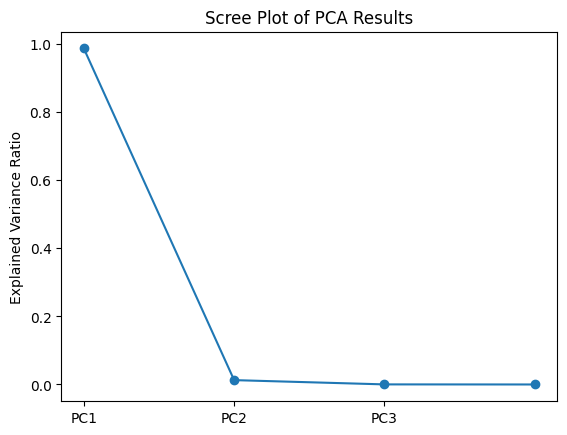

In [142]:
explained_variance_ratio = [9.86911183e-01, 1.28040070e-02, 2.67971192e-04, 1.68392031e-05]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the explained variance ratio on the y-axis
ax.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')

# Set the x-axis labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['PC1', 'PC2', 'PC3'])

# Set the y-axis label
ax.set_ylabel('Explained Variance Ratio')

# Set the title
ax.set_title('Scree Plot of PCA Results')

# Show the plot
plt.show()

      Divorce  Population   Birth  Death
2011   109312        0.65  11.682   6.39
2012   111377        0.65  11.461   6.46
2013   107031        0.61  11.240   6.55
2014   111810        0.55  11.084   6.63
2015   117880        0.48  10.929   6.72
2016   118539        0.44  10.773   6.81
2017   121617        0.41  10.618   6.90
2018   127265        0.32  10.462   7.03
2019   128514        0.25  10.276   7.14


**PART 2**

In [ ]:
dr = df.loc['Divorce (%)'] #Divorce Rate
pr = df.loc['Population Change(%)'] #Population Change
pop = df.loc['Population (Million)'] #Population data
gdp_dt = df.loc['GDP (Billion Dollars)'] #GDP data

R-squared: 0.9892
Adjusted R-squared: 0.9852


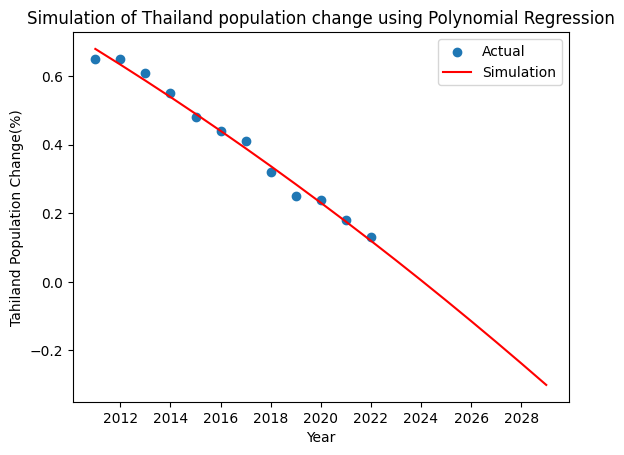

In [ ]:
# Prepare the data
X = np.array(df.columns[:]).astype(int).reshape(-1, 1)  # Time (years)
y = df.iloc[1, :].values  # Thailand Population Change (%)

# Fit a polynomial regression model
degree = 2 # most suitable one
poly_features = PolynomialFeatures(degree=degree,interaction_only=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions for available years
X_pred = np.arange(2011, 2030).reshape(-1, 1)  # Predict from 2010 to 2030
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# Calculate R-squared
r_squared = model.score(X_poly, y)

# Calculate adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (X.shape[0] - 1) / (X.shape[0] - X_poly.shape[1] - 1)

# Print model performance
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
slope = model.coef_[0]
intercept = model.intercept_

# Plot the results
plt.scatter(X, y, label='Actual')
plt.plot(X_pred.astype(int), y_pred, color='red', label='Simulation')
plt.xlabel('Year')
plt.ylabel('Tahiland Population Change(%)')
plt.title('Simulation of Thailand population change using Polynomial Regression')

# Format x-axis ticks as integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend()
plt.show()

# the graph doesn't change after changing degree because the higher-degree terms in the polynomial are not significant and are not contributing to the fit of the data

In [ ]:
# y_pred = model.predict(X_pred_poly)
# # Evaluate the model
# print(f"Intercept: {intercept}")
# print(f"Coefficient for Population: {slope}")
# print(f"R-squared: {r_squared} this suggests that the divorce rate alone can account for about {round(r_squared*100,2)}% of the differences we observe in the GDP rate.")
# # correlation1 = (pd.to_numeric(df.loc['Divorce (%)'], errors='coerce')).corr(pd.to_numeric(df.loc['GDP Change (%)'], errors='coerce'))
# # print(f"Correlation = {correlation1} as they are negatively correlated it implies that as divorce rate increases, GDP rate would be decreasing.")
# print(f"Mean Absolute Error: {metrics.mean_absolute_error(y, y_pred)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y, y_pred)*100,2)}% points from the actual values which is relatively small.")
# print(f"Mean Squared Error: {metrics.mean_squared_error(y, y_pred)} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
# print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y, y_pred))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y, y_pred))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

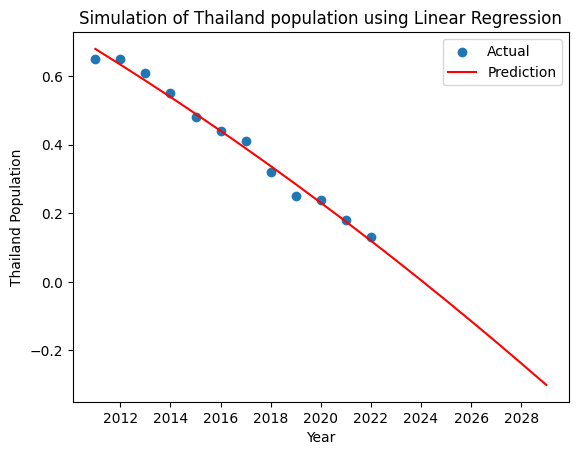

R-squared: 0.9883
Adjusted R-squared: 0.9839


In [ ]:
# Prepare the data
X = np.array(df.columns[:]).astype(int).reshape(-1, 1)  # Time (years)
y = df.iloc[1, :].values  # Thailand Population change
X=X.reshape(-1, 1)

# Reshape the y array to two dimensions
y = y.reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# # Calculate R-squared
# r_squared = model.score(y, X_pred[:11])

# # Calculate adjusted R-squared
# adjusted_r_squared = 1 - (1 - r_squared) * (X.shape[0] - 1) / (X.shape[0] - X_pred.shape[1] - 1)

# # Print model performance
# print(f"R-squared: {r_squared:.4f}")
# print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
# slope = model.coef_[0]
# intercept = model.intercept_

# Plot the results
plt.scatter(X, y, label='Actual')
plt.plot(X_pred.astype(int), y_pred, color='red', label='Prediction')
plt.xlabel('Year')
plt.ylabel('Thailand Population')
plt.title('Simulation of Thailand population using Linear Regression')

# Format x-axis ticks as integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend()
plt.show()
# Calculate R-squared
r_squared = model.score(X, y)

# Calculate adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (X.shape[0] - 1) / (X.shape[0] - X_poly.shape[1] - 1)

# Print model performance
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

Training R-squared: 0.9914790058459884
Testing R-squared: 0.9714469318976069
Mean Absolute Error (MAE): 0.028379888268163605
Mean Squared Error (MSE): 0.0012455482818888375


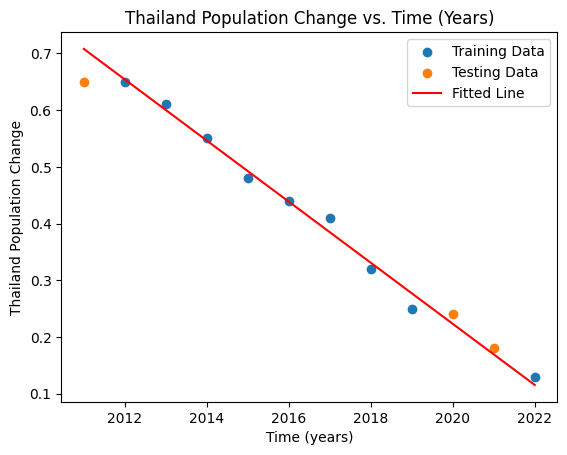

In [ ]:
# # Separate features and target variable
# X = np.array(df.columns[1:]).astype(int).reshape(-1, 1)  # Time (years)
# y = df.iloc[:, 1:].values  # Thailand Population change


# Prepare the data
X = np.array(df.columns[:]).astype(int).reshape(-1, 1)  # Time (years)
# print(X)
y = df.iloc[1, :].values  # Thailand Population change
# print(y)
X=X.reshape(-1, 1)

# Reshape the y array to two dimensions
y = y.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared values for both training and testing sets
r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

# Print the R-squared values
print("Training R-squared:", r_squared_train)
print("Testing R-squared:", r_squared_test)

# Calculate the mean absolute error (MAE) and mean squared error (MSE) on the test data
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)

# Print the MAE and MSE values
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Plot the data points
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')

# Plot the fitted line
plt.plot(X, model.predict(X), color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Time (years)')
plt.ylabel('Thailand Population Change')
plt.title('Thailand Population Change vs. Time (Years)')

# Add legend
plt.legend()

# Show the plot
plt.show()



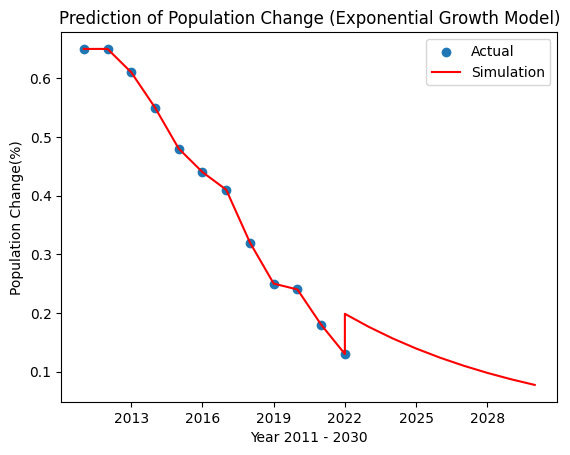

In [ ]:
pr = df.loc['Population Change(%)'] #Population Change
years = np.arange(2011, 2023)

# Define an exponential growth function
def exponential_growth(x, a, b):
    return a * np.exp(b * (x - years[0]))

# Fit the exponential growth model to the data
params, covariance = curve_fit(exponential_growth, years, pr)

# Predict population for the desired range (e.g., 2022 to 2030)
future_years = np.arange(2022, 2031)
predicted_pop = exponential_growth(future_years, *params)

# Plot the results
plt.scatter(years, pr, label='Actual')
plt.plot(np.concatenate((years, future_years)), np.concatenate((pr, predicted_pop)), color='red', label='Simulation')
plt.xlabel('Year 2011 - 2030')
plt.ylabel('Population Change(%)')
plt.title('Prediction of Population Change (Exponential Growth Model)')

# # Format x-axis ticks as integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend()
plt.show()

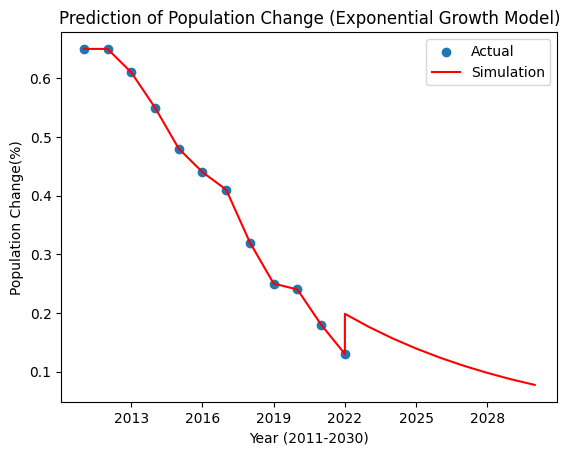

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter_exp = ax.scatter(years, pr, label='Actual')
line_exp, = ax.plot(np.concatenate((years, future_years)), np.concatenate((pr, predicted_pop)), color='red', label='Simulation')

# Set labels and title
ax.set_xlabel('Year (2011-2030)')
ax.set_ylabel('Population Change(%)')
ax.set_title('Prediction of Population Change (Exponential Growth Model)')

# Format x-axis ticks as integers
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.legend()

# Function to update the plot for each frame
def update_exp(frame):
    scatter_exp.set_offsets(np.column_stack((years[:frame], pr[:frame])))
    line_exp.set_data(np.concatenate((years[:frame], future_years[:frame])), np.concatenate((pr[:frame], predicted_pop[:frame])))
    return scatter_exp, line_exp

# Create the animation
animation_exp = FuncAnimation(fig, update_exp, frames=20, interval=200, blit=True)

# Save the animation as a GIF file
animation_exp.save('exponential_growth_animation.gif', writer=PillowWriter(fps=2))

# Display the plot
plt.show()

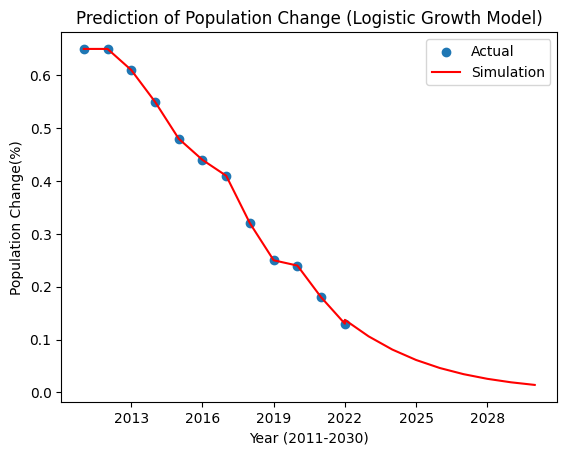

In [ ]:
# Assuming you have your population change data in 'pr' and years from 2011 to 2022
years = np.arange(2011, 2023)

# Define a logistic growth function
def logistic_growth(x, a, b, c):
    return a / (1 + np.exp(-b * (x - years[0] - c)))

# Provide initial guesses for parameters 'a', 'b', and 'c'
initial_guess = [max(pr), -1, 5]

# Fit the logistic growth model to the data
params, covariance = curve_fit(logistic_growth, years, pr, p0=initial_guess)

# Predict population change for the desired range (2022 to 2030)
future_years = np.arange(2022, 2031)
predicted_change = logistic_growth(future_years, *params)

# Plot the results
plt.scatter(years, pr, label='Actual')
plt.plot(np.concatenate((years, future_years)), np.concatenate((pr, predicted_change)), color='red', label='Simulation')
plt.xlabel('Year (2011-2030)')
plt.ylabel('Population Change(%)')
plt.title('Prediction of Population Change (Logistic Growth Model)')

# Format x-axis ticks as integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend()
plt.show()

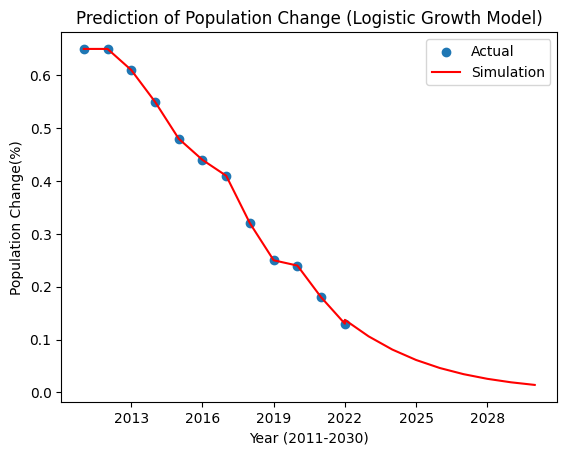

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter = ax.scatter(years, pr, label='Actual')
line, = ax.plot(np.concatenate((years, future_years)), np.concatenate((pr, predicted_change)), color='red', label='Simulation')

# Set labels and title
ax.set_xlabel('Year (2011-2030)')
ax.set_ylabel('Population Change(%)')
ax.set_title('Prediction of Population Change (Logistic Growth Model)')

# Format x-axis ticks as integers
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.legend()

# Function to update the plot for each frame
def update(frame):
    scatter.set_offsets(np.column_stack((years[:frame+1], pr[:frame+1])))
    line.set_data(np.concatenate((years[:frame+1], future_years[:frame+1])), np.concatenate((pr[:frame+1], predicted_change[:frame+1])))
    return scatter, line

# Create the animation
animation = FuncAnimation(fig, update, frames=20, interval=200, blit=True)

# Save the animation as a GIF file
animation.save('logistic_growth_animation.gif', writer=PillowWriter(fps=2))

# Display the plot
plt.show()


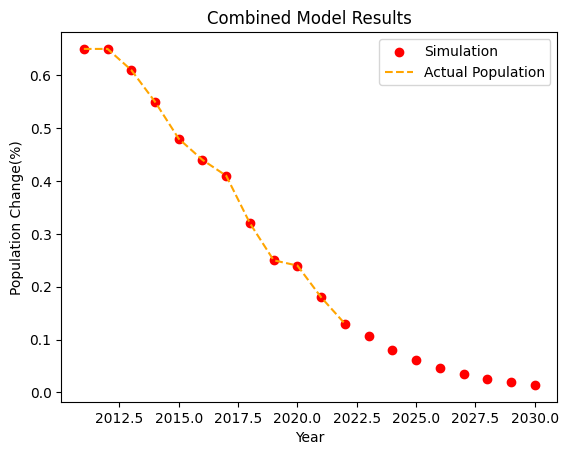

In [ ]:
# Define the time periods for each model
years_actual = np.arange(2011, 2023)  # Actual time period
years_predicted = np.arange(2023, 2031)  # Predicted time

# Fit an exponential model for the first time period
params_exp, _ = curve_fit(exponential_growth, years_actual, pr)

# Define initial guesses for the logistic growth model
initial_guess_logistic = [max(pr), -1, 5]

# Fit a logistic model for the second time period
params_logistic, _ = curve_fit(logistic_growth, years_actual, pr, p0=initial_guess_logistic)

# Predict using the exponential model for the first time period
predicted_exp = exponential_growth(years_predicted, *params_exp)

# Predict using the logistic model for the second time period
predicted_logistic = logistic_growth(years_predicted, *params_logistic)

# Combine the predictions for the entire time range
combined_years = np.concatenate((years_actual, years_predicted))
combined_predictions = np.concatenate((pr, predicted_logistic))

# Plot the combined results
plt.scatter(combined_years, combined_predictions, label='Simulation', color='red')
plt.plot(years_actual, pr, color='orange', linestyle='--', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('Population Change(%)')
plt.title('Combined Model Results')
plt.legend()
plt.show()


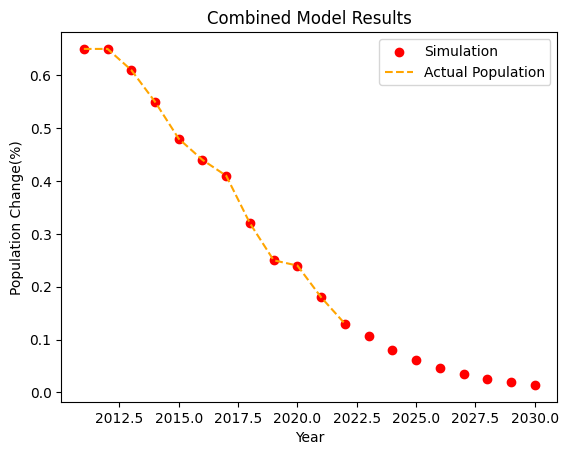

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter = ax.scatter(combined_years, combined_predictions, label='Simulation', color='red')
line, = ax.plot(years_actual, pr, color='orange', linestyle = '--', label='Actual Population')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Population Change(%)')
ax.set_title('Combined Model Results')
ax.legend()

def update(frame):
    scatter.set_offsets(np.column_stack((combined_years[:frame+1], combined_predictions[:frame+1])))
    line.set_data(years_actual[:frame+1], pr[:frame+1])
    return scatter, line

# Create the animation
animation = FuncAnimation(fig, update, frames=len(combined_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('combined_model_animation.gif', writer=PillowWriter(fps=2))

# Display the plot
plt.show()

**DATA VISUALIZATION**

**Data Visualization for exponential growth model**

In [ ]:
# Define the exponential growth function
def exponential_growth(x, N_01, rate1):
    return N_01 * np.exp(rate1 * (x - years_actual[0]))

# Fit the exponential model to your data using curve_fit
params_exp, covariance1 = curve_fit(exponential_growth, years_actual, pop, maxfev=2000)
# print("covariance:", covariance1)
# Parameters N_0 and rate are stored in params_exp
N_01, rate1 = params_exp

print(f'N_0 = {N_01}')
print(f'Growth rate = {rate1}')

N_0 = 69.0552301206556
Growth rate = 0.0038387203690099076


In [ ]:
N_0_e_std, rate_e_std = np.sqrt(np.diag(covariance1))
print(f'Standard error of N_0 = {N_0_e_std}') 
print(f'Standard error of Growth Rate = {rate_e_std}')

Standard error of N_0 = 0.11654796595073227
Standard error of Growth Rate = 0.0002568537581261638


In [ ]:
# Calculate predicted values using the fitted model
predicted_exp1 = exponential_growth(years_actual, N_01, rate1)

# Calculate the residual sum of squares
ss_res1 = np.sum((pop - predicted_exp1)**2)

# Calculate the total sum of squares
ss_tot1 = np.sum((pop - np.mean(pop))**2)

# Calculate R-squared
r_squared1 = 1 - (ss_res1 / ss_tot1)

print(f'R-squared (Goodness of Fit): {r_squared1}')

R-squared (Goodness of Fit): 0.9572575973001511


In [ ]:
# Define the exponential growth function
def exponential_growth(x, N_0, rate):
    return N_0 * np.exp(rate * (x - years_actual[0]))

# Fit the exponential model to your data using curve_fit
params_exp, covariance1 = curve_fit(exponential_growth, years_actual, pop, maxfev=2000)

# Parameters N_0 and rate are stored in params_exp
N_0, rate = params_exp

# Calculate predicted values using the fitted model
predicted_exp = exponential_growth(years_actual, N_0, rate)

# Calculate R-squared (goodness of fit)
r2 = r2_score(pop, predicted_exp)

# Uncertainty quantification for parameters
std_errors = np.sqrt(np.diag(covariance1))
N_0_std_error, rate_std_error = std_errors

print(f'Parameter estimation for exponential growth model:')
print(f'Initial population (N_0): {N_0:.2f} ± {N_0_std_error:.2f}')
print(f'Growth rate (rate): {rate:.5f} ± {rate_std_error:.5f}')
print(f'R-squared (Goodness of Fit): {r2:.5f}')


Parameter estimation for exponential growth model:
Initial population (N_0): 69.06 ± 0.12
Growth rate (rate): 0.00384 ± 0.00026
R-squared (Goodness of Fit): 0.95726


**Data Visualization for logistic growth model**

In [ ]:
# # Define the logistic growth function
# def logistic_growth(x, N_0, rate, K):
#     print(K * N_0 / (N_0 + (K - N_0) * np.exp(-rate * (x - years_actual[0]))))
#     return K * N_0 / (N_0 + (K - N_0) * np.exp(-rate * (x - years_actual[0])))

# # Provide initial guesses for parameters 'N_0', 'rate', and 'K'
# initial_guess = [pop_data[0], 0.003839, 1000]  # Adjust these values as needed

# # Fit the logistic growth model to the data
# params_logistic, covariance = curve_fit(logistic_growth, years_actual, pop, p0=initial_guess)

# # Parameters N_0, rate, and K are stored in params_logistic
# N_0, rate, K = params_logistic

# print(f'N_0 = {N_0}')
# print(f'Growth rate = {rate}')
# print(f'Carrying Capacity (K) = {K}')

# # Plot the results
# plt.scatter(years_actual, pop, label='Actual')
# plt.plot(years_actual, logistic_growth(years_actual, *params_logistic), color='red', label='Logistic Growth Model')
# plt.xlabel('Year')
# plt.ylabel('Population')
# plt.title('Logistic Growth Model Fitting')
# plt.legend()
# plt.show()


In [ ]:
# # Define the logistic growth function
# def logistic_growth(x, N_0, rate, K):
#     return K * N_0 / (N_0 + (K - N_0) * np.exp(-rate * (x - years_actual[0])))

# # Assuming you have your population data in 'pop' and years from 2011 to 2022
# years_actual = np.arange(2011, 2023)

# # Create a logistic model
# model = Model(logistic_growth)

# # Set initial parameter values
# params = model.make_params(N_0=pop[0], rate=0.00383922, K=500)

# # Fit the model to the data
# result = model.fit(pop, params, x=years_actual)

# # Print the parameter values
# print(result.fit_report())

# # Plot the results
# result.plot_fit(data_kws={'marker': 'o'})
# plt.xlabel('Year')
# plt.ylabel('Population')
# plt.title('Logistic Growth Model Fitting with lmfit')
# plt.show()

In [ ]:
# Define the logistic growth function
def logistic_growth1(x, N_02, rate2, K):
    return K * N_02 / (N_02 + (K - N_02) * np.exp(-rate2 * (x - years_actual[0])))

# Fit the logistic model to your data using curve_fit
params_logistic, covariance2 = curve_fit(logistic_growth1, years_actual, pop, maxfev=2000)

# Parameters N_0, rate, and K are stored in params_logistic
N_02, rate2, K = params_logistic

print(f'N_0 = {N_02}')
print(f'Growth rate = {rate2}')
print(f'Carrying Capacity (K) = {K}')

N_0 = 68.6794071454361
Growth rate = 0.14039164599724457
Carrying Capacity (K) = 72.61701909190406


In [ ]:
N_0_l_std, rate_std, K_std = np.sqrt(np.diag(covariance2))
print(f'Standard error of N_0 = {N_0_l_std}') 
print(f'Standard error of Growth Rate = {rate_std}')
print(f'Standard error of Carrying Capacity (K) = {K_std}')

Standard error of N_0 = 0.02386343279146145
Standard error of Growth Rate = 0.00620798860437903
Standard error of Carrying Capacity (K) = 0.09253273631788224


In [ ]:
# Calculate predicted values using the fitted model
predicted_logistic2 = logistic_growth1(years_actual, N_02, rate2, K)

# Calculate the residual sum of squares
ss_res2 = np.sum((pop - predicted_logistic2)**2)

# Calculate the total sum of squares
ss_tot2 = np.sum((pop - np.mean(pop))**2)

# Calculate R-squared
r_squared2 = 1 - (ss_res2 / ss_tot2)

print(f'R-squared (Goodness of Fit): {r_squared2}')

R-squared (Goodness of Fit): 0.9992902906189388


In [ ]:
# Define the logistic growth function
def logistic_growthl(x, N_0l, ratel, Kl):
    return Kl * N_0l / (N_0l + (Kl - N_0l) * np.exp(-ratel * (x - years_actual[0])))

# Fit the logistic model to your data using curve_fit
params_logisticl, covariance_l = curve_fit(logistic_growthl, years_actual, pop, maxfev=2000)

# Parameters N_0, rate, and K are stored in params_logistic
N_0l, ratel, Kl = params_logisticl

# Predict population change using the logistic model
predicted_logisticl = logistic_growthl(years_actual, N_0l, ratel, Kl)

# Calculate R-squared value to evaluate the goodness of fit
r_squaredl = r2_score(pop, predicted_logisticl)

# Uncertainty quantification for parameters
std2_errors = np.sqrt(np.diag(covariance_l))
N_02_std_error, rate2_std_error, K2_std_error = std2_errors

print(f'Parameter estimation for logistic growth model:')
print(f'Initial population (N_0): {N_0l:.2f} ± {N_02_std_error:.2f}')
print(f'Growth rate (rate): {ratel:.5f} ± {rate2_std_error:.5f}')
print(f'Carrying Capacity (K): {Kl:.5f} ± {K2_std_error:.5f}')
print(f'R-squared (Goodness of Fit): {r_squaredl:.5f}')

Parameter estimation for logistic growth model:
Initial population (N_0): 68.68 ± 0.02
Growth rate (rate): 0.14039 ± 0.00621
Carrying Capacity (K): 72.61702 ± 0.09253
R-squared (Goodness of Fit): 0.99929


Model parameters and their interpretation.

| Parameter | Symbol | Value(Actual) | Value(Logistic) | Value(Exponential) |
|-----------|--------|---------------|-----------------|--------------------|
| Initial population | $N_0$ | - | - | - |
| The population at the time t | N(t) | - | - | - |
| Growth rate | $\tau / r$ | - | - | - |
| Carrying capacity | K | - | - | - |
| Uncertainty | U | - | - | - |
| Each value | $\mu$ | - | - | - |
| Number of values | n | - | - | - |
| Standard deviation | $\sigma$ | - | - | - |
| The sum of squares due to regression | SSE | - | - | - |
| The total sum of squares | SST | - | - | - |

**SIMULATION PART**

**Simulation for Polynomial Regression Model**

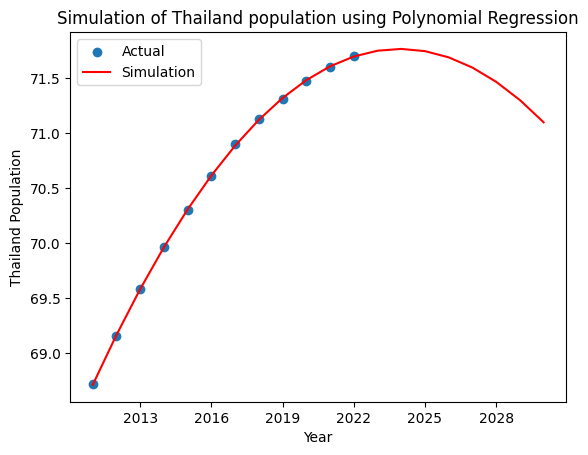

R-squared: 0.9999
Adjusted R-squared: 0.9999


In [ ]:
# Prepare the data
X = np.array(df.columns[:]).astype(int).reshape(-1, 1)  # Time (years)
y = df.iloc[0, :].values  # Thailand Population

# Fit a polynomial regression model
degree = 2  # Most suitable one
# poly_features = PolynomialFeatures(degree=degree, interaction_only=True)
poly_features = PolynomialFeatures(degree=degree, interaction_only=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions for available years
X_pred = np.arange(2011, 2031).reshape(-1, 1)  # Predict from 2011 to 2030
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# Plot the results
plt.scatter(X, y, label='Actual')
plt.plot(X_pred.astype(int), y_pred, color='red', label='Simulation')
plt.xlabel('Year')
plt.ylabel('Thailand Population')
plt.title('Simulation of Thailand population using Polynomial Regression')

# Format x-axis ticks as integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend()
plt.show()

# Calculate R-squared and adjusted R-squared
r_squared = model.score(X_poly, y)
adjusted_r_squared = 1 - (1 - r_squared) * (X_poly.shape[0] - 1) / (X_poly.shape[0] - X_pred_poly.shape[1] - 1)

# Print model performance
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")


In [ ]:
sim_years=[sy for sy in range(2011,2031)]
sim_pop_polyreg=model.predict(X_pred_poly)
polyreg_sim_columns=['Years','Time(t)','Actual Population','Population simulation using polynomial regression model']
polyreg_sim_rows=[i for i in range(20)]
polyreg_sim=pd.DataFrame(index=polyreg_sim_rows,columns=polyreg_sim_columns)

for polyregsim in range(20):
    polyreg_sim.iloc[polyregsim,0]=sim_years[polyregsim]
    polyreg_sim.iloc[polyregsim,1]=polyregsim
    if polyregsim < len(pop_data):
        polyreg_sim.iloc[polyregsim,2]=pop_data[polyregsim]
    polyreg_sim.iloc[polyregsim,3]=sim_pop_polyreg[polyregsim]

polyreg_sim

Years Time(t) Actual Population  \
0   2011       0         68.712846   
1   2012       1         69.157023   
2   2013       2         69.578602   
3   2014       3         69.960943   
4   2015       4         70.294397   
5   2016       5         70.607037   
6   2017       6         70.898202   
7   2018       7         71.127802   
8   2019       8         71.307763   
9   2020       9         71.475664   
10  2021      10         71.601103   
11  2022      11          71.69703   
12  2023      12               NaN   
13  2024      13               NaN   
14  2025      14               NaN   
15  2026      15               NaN   
16  2027      16               NaN   
17  2028      17               NaN   
18  2029      18               NaN   
19  2030      19               NaN   

   Population simulation using polynomial regression model  
0                                           68.708033       
1                                           69.161637       
2                                           69.578806       
3                                           69.959539       
4                                           70.303836       
5                                           70.611697       
6                                           70.883123       
7                                           71.118112       
8                                           71.316666       
9                                           71.478784       
10                                          71.604466       
11                                          71.693712       
12                                          71.746522       
13                                          71.762897       
14                                          71.742836       
15                                          71.686339       
16                                          71.593406       
17                                          71.464037       
18                                          71.298232       
19                                          71.095992

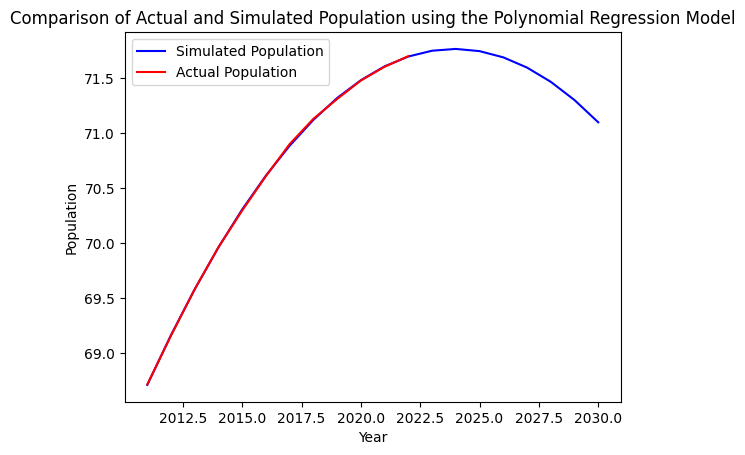

In [ ]:
act_years=[i for i in range(2011,2023)]
plt.plot(sim_years, sim_pop_polyreg, label='Simulated Population',color='blue')
plt.plot(act_years, pop_data, label='Actual Population',color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Comparison of Actual and Simulated Population using the Polynomial Regression Model')

# plt.ylim(68, 75)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

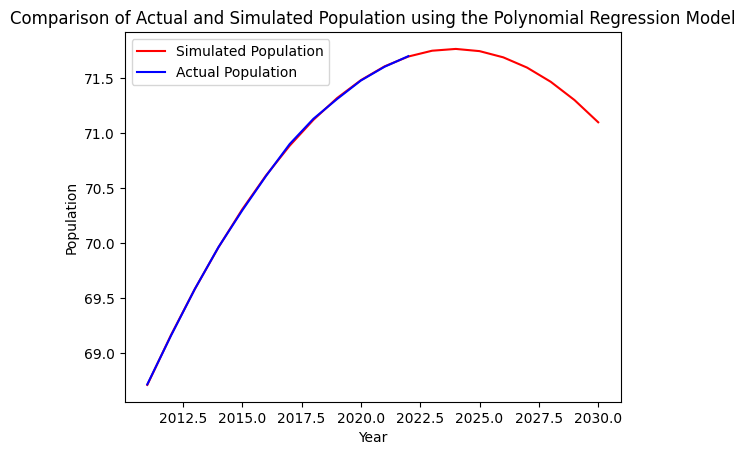

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Comparison of Actual and Simulated Population using the Polynomial Regression Model')

# Plot the initial data
line_simulated, = ax.plot(sim_years, sim_pop_polyreg, label='Simulated Population', color='red')
line_actual, = ax.plot(act_years, pop_data, label='Actual Population', color='blue')

# Add legend
ax.legend()

# Update function for animation
def update(frame):
    # Update the data for both actual and simulated population lines
    line_actual.set_data(act_years[:frame+1], pop_data[:frame+1])
    line_simulated.set_data(sim_years[:frame+1], sim_pop_polyreg[:frame+1])
    return line_actual, line_simulated

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('Poly_simulated1.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()


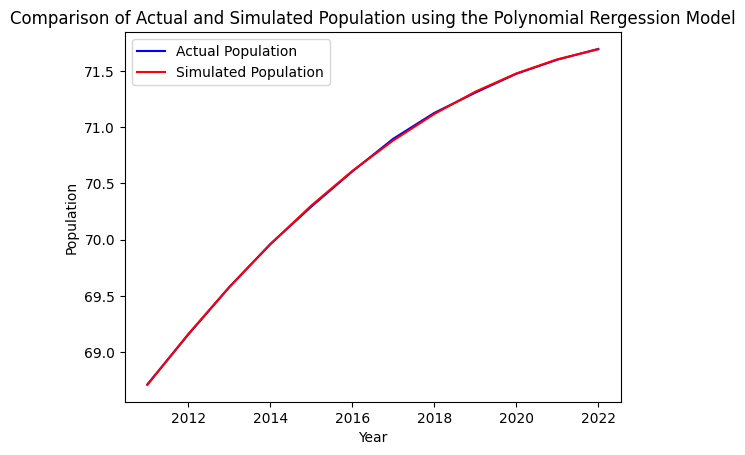

In [ ]:
act_years=[i for i in range(2011,2023)]
sim_pop_polyreg_compare=sim_pop_polyreg[:len(pop_data)]
plt.plot(act_years, pop_data, label='Actual Population', color='blue')
plt.plot(act_years, sim_pop_polyreg_compare, label='Simulated Population', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Comparison of Actual and Simulated Population using the Polynomial Rergession Model')

# plt.ylim(68, 72)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

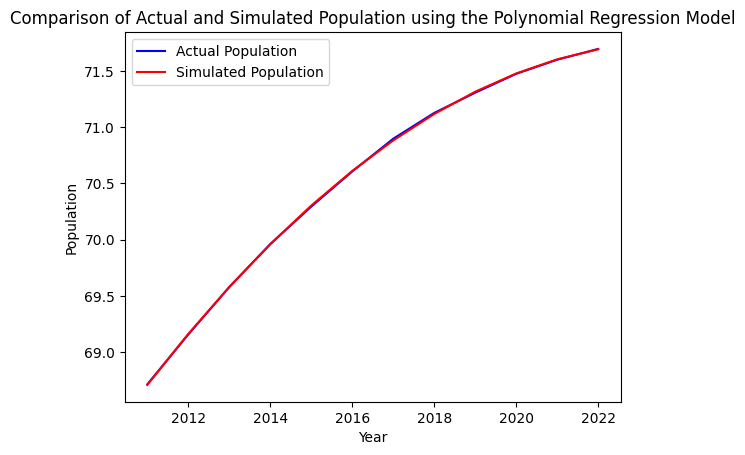

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Comparison of Actual and Simulated Population using the Polynomial Regression Model')

# Plot the initial data
line_actual, = ax.plot(act_years, pop_data, label='Actual Population', color='blue')
line_simulated, = ax.plot(act_years, sim_pop_polyreg_compare, label='Simulated Population', color='red')

# Add legend
ax.legend()

# Update function for animation
def update(frame):
    # Update the data for both actual and simulated population lines
    line_actual.set_data(act_years[:frame+1], pop_data[:frame+1])
    line_simulated.set_data(act_years[:frame+1], sim_pop_polyreg_compare[:frame+1])
    return line_actual, line_simulated

# Create the animation
animation = FuncAnimation(fig, update, frames=len(act_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('Poly_simulated2.gif', writer=PillowWriter(fps=2))

# Display the plot
plt.show()

In [ ]:
#Uncertainties Quantification for Polynimial Regression Model
summation=0
U_each3=[]

for diffsq in range(12):
    U_each3.append(np.sqrt((sim_pop_polyreg_compare[diffsq]-(pop_data[diffsq]))**2))
    summation=summation+(sim_pop_polyreg_compare[diffsq]-np.mean(pop_data))**2
# print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# U3=np.sqrt(summation/(12*11))
U3=(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
print(f'Uncertainties Quantification shows a {"{:.5f}".format(U3)}% lower and upper solution of uncertainties for the polynomial regression model.')

Uncertainties Quantification shows a 0.00000% lower and upper solution of uncertainties for the polynomial regression model.


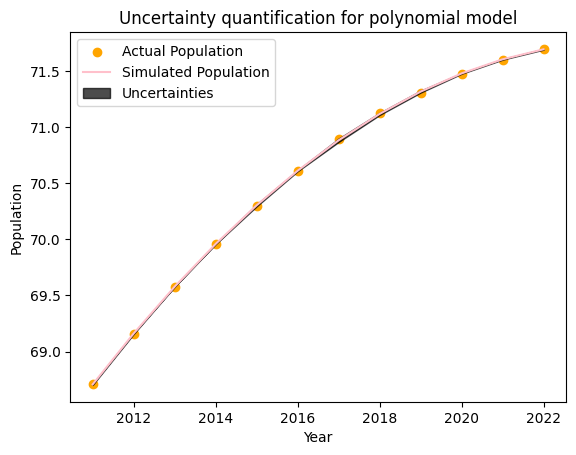

In [ ]:
# Plot the actual and simulated data
plt.scatter(act_years, pop_data, label='Actual Population', color='orange')
plt.plot(act_years, sim_pop_polyreg_compare, label='Simulated Population', color='pink')

# Add shaded regions for uncertainties
plt.fill_between(act_years, sim_pop_polyreg_compare - np.array(U_each3), sim_pop_polyreg_compare + np.array(U_each3), color='black', alpha=0.7, label='Uncertainties')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Uncertainty quantification for polynomial model')
plt.legend()
plt.show()

**Simulation for Linear Regression Model**

Training R-squared: 0.9515740413465194
Testing R-squared: 0.9582122757486704
Mean Absolute Error (MAE): 0.20618774674113163
Mean Squared Error (MSE): 0.07424715969038638


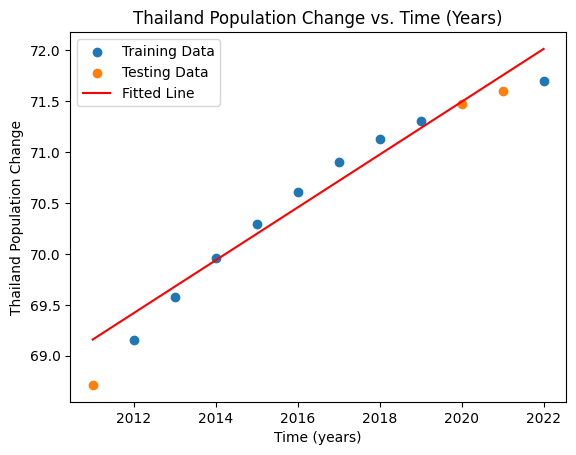

In [ ]:
# Prepare the data
X = np.array(df.columns[:]).astype(int).reshape(-1, 1)  # Time (years)
y = df.iloc[0, :].values  # Thailand Population change
X=X.reshape(-1, 1)

# Reshape the y array to two dimensions
y = y.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared values for both training and testing sets
r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

# Print the R-squared values
print("Training R-squared:", r_squared_train)
print("Testing R-squared:", r_squared_test)

# Calculate the mean absolute error (MAE) and mean squared error (MSE) on the test data
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)

# Print the MAE and MSE values
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')

# Plot the fitted line
plt.plot(X, model.predict(X), color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Time (years)')
plt.ylabel('Thailand Population Change')
plt.title('Thailand Population Change vs. Time (Years)')

# Add legend
plt.legend()

# Show the plot
plt.show()



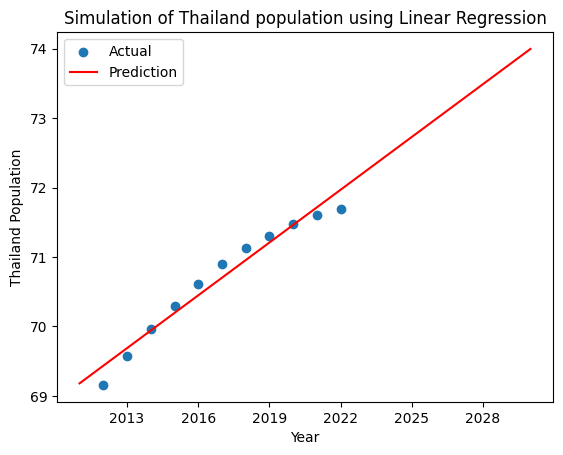

R-squared: 0.9606
Adjusted R-squared: 0.9562


In [ ]:
# Prepare the data
X = np.array(df.columns[1:]).astype(int).reshape(-1, 1)  # Time (years)
y = df.iloc[0, 1:].values  # Thailand Population change

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for available years
X_pred = np.arange(2011, 2031).reshape(-1, 1)  # Predict from 2010 to 2030
y_pred = model.predict(X_pred)

# Plot the results
plt.scatter(X, y, label='Actual')
plt.plot(X_pred.astype(int), y_pred, color='red', label='Prediction')
plt.xlabel('Year')
plt.ylabel('Thailand Population')
plt.title('Simulation of Thailand population using Linear Regression')

# Format x-axis ticks as integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend()
plt.show()

# Calculate R-squared
r_squared = model.score(X, y)

# Calculate adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (X.shape[0] - 1) / (X.shape[0] - X_pred.shape[1] - 1)

# Print model performance
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

In [ ]:
sim_years=[sy for sy in range(2011,2031)]
sim_pop_linreg=model.predict(X_pred)
linreg_sim_columns=['Years','Time(t)','Actual Population','Population simulation using linear regression model']
linreg_sim_rows=[i for i in range(20)]
linreg_sim=pd.DataFrame(index=linreg_sim_rows,columns=linreg_sim_columns)

for linregsim in range(20):
    linreg_sim.iloc[linregsim,0]=sim_years[linregsim]
    linreg_sim.iloc[linregsim,1]=linregsim
    if linregsim < len(pop_data):
        linreg_sim.iloc[linregsim,2]=pop_data[linregsim]
    linreg_sim.iloc[linregsim,3]=sim_pop_linreg[linregsim]

linreg_sim

Years Time(t) Actual Population  \
0   2011       0         68.712846   
1   2012       1         69.157023   
2   2013       2         69.578602   
3   2014       3         69.960943   
4   2015       4         70.294397   
5   2016       5         70.607037   
6   2017       6         70.898202   
7   2018       7         71.127802   
8   2019       8         71.307763   
9   2020       9         71.475664   
10  2021      10         71.601103   
11  2022      11          71.69703   
12  2023      12               NaN   
13  2024      13               NaN   
14  2025      14               NaN   
15  2026      15               NaN   
16  2027      16               NaN   
17  2028      17               NaN   
18  2029      18               NaN   
19  2030      19               NaN   

   Population simulation using linear regression model  
0                                           69.179686   
1                                           69.433156   
2                                           69.686626   
3                                           69.940096   
4                                           70.193566   
5                                           70.447036   
6                                           70.700506   
7                                           70.953976   
8                                           71.207446   
9                                           71.460916   
10                                          71.714386   
11                                          71.967856   
12                                          72.221326   
13                                          72.474796   
14                                          72.728266   
15                                          72.981736   
16                                          73.235206   
17                                          73.488676   
18                                          73.742146   
19                                          73.995616

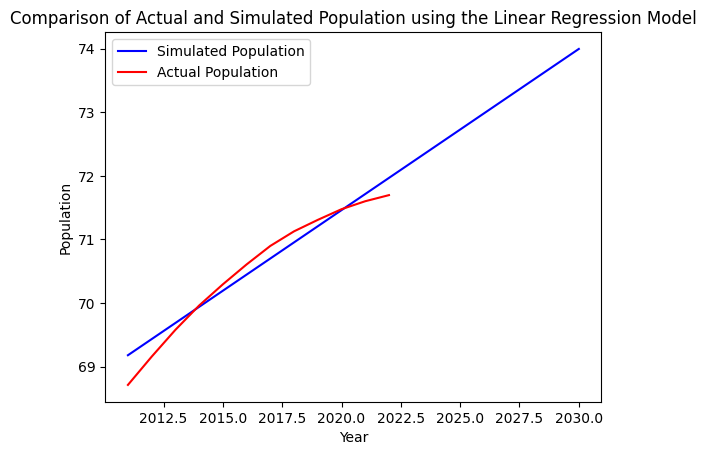

In [ ]:
act_years=[i for i in range(2011,2023)]
plt.plot(sim_years, sim_pop_linreg, label='Simulated Population',color='blue')
plt.plot(act_years, pop_data, label='Actual Population',color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Comparison of Actual and Simulated Population using the Linear Regression Model')

# plt.ylim(68, 75)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

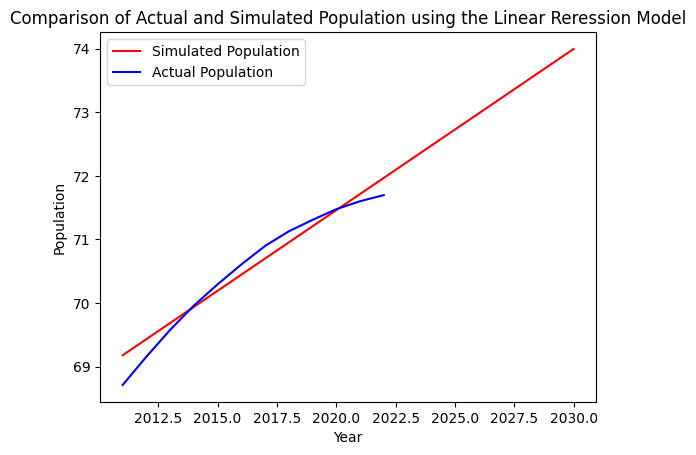

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Comparison of Actual and Simulated Population using the Linear Reression Model')

# Plot the initial data
line_simulated, = ax.plot(sim_years, sim_pop_linreg, label='Simulated Population', color='red')
line_actual, = ax.plot(act_years, pop_data, label='Actual Population', color='blue')

# Add legend
ax.legend()

# Update function for animation
def update(frame):
    # Update the data for both actual and simulated population lines
    line_actual.set_data(act_years[:frame+1], pop_data[:frame+1])
    line_simulated.set_data(sim_years[:frame+1], sim_pop_linreg[:frame+1])
    return line_actual, line_simulated

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('Lin_simulated1.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()


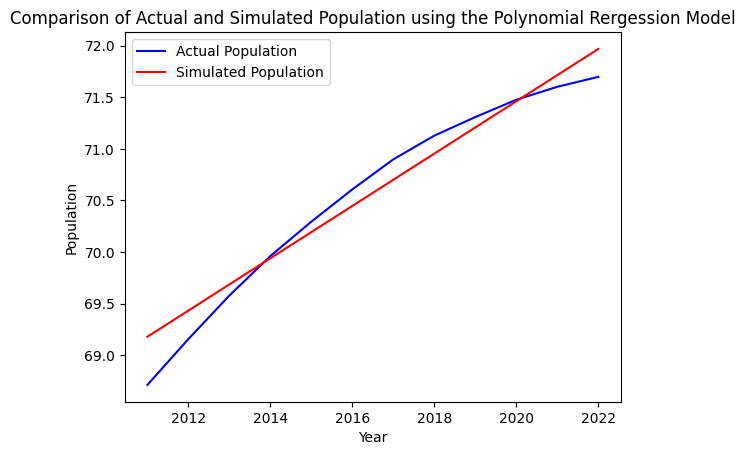

In [ ]:
act_years=[i for i in range(2011,2023)]
sim_pop_linreg_compare=sim_pop_linreg[:len(pop_data)]
plt.plot(act_years, pop_data, label='Actual Population', color='blue')
plt.plot(act_years, sim_pop_linreg_compare, label='Simulated Population', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Comparison of Actual and Simulated Population using the Polynomial Rergession Model')

# plt.ylim(68, 72)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

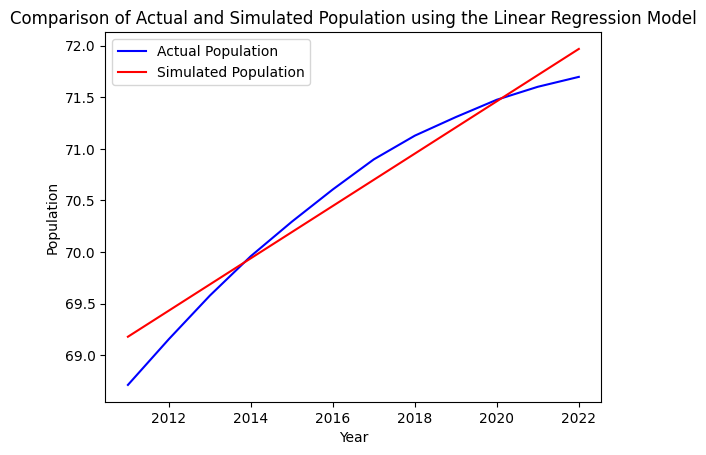

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Comparison of Actual and Simulated Population using the Linear Regression Model')

# Plot the initial data
line_actual, = ax.plot(act_years, pop_data, label='Actual Population', color='blue')
line_simulated, = ax.plot(act_years, sim_pop_linreg_compare, label='Simulated Population', color='red')

# Add legend
ax.legend()

# Update function for animation
def update(frame):
    # Update the data for both actual and simulated population lines
    line_actual.set_data(act_years[:frame+1], pop_data[:frame+1])
    line_simulated.set_data(act_years[:frame+1], sim_pop_linreg_compare[:frame+1])
    return line_actual, line_simulated

# Create the animation
animation = FuncAnimation(fig, update, frames=len(act_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('Lin_simulated2.gif', writer=PillowWriter(fps=2))

# Display the plot
plt.show()

In [ ]:
#Uncertainties Quantification for Linear Regression Model
summation=0
U_each4=[]

for diffsq in range(12):
    U_each4.append(np.sqrt((sim_pop_linreg_compare[diffsq]-(pop_data[diffsq]))**2))
    summation=summation+(sim_pop_linreg_compare[diffsq]-np.mean(pop_data))**2
# print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# U3=np.sqrt(summation/(12*11))
U4=(abs(np.mean(sim_pop_linreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
print(f'Uncertainties Quantification shows a {"{:.4f}".format(U4)}% lower and upper solution of uncertainties for the linear regression model.')

Uncertainties Quantification shows a 0.0552% lower and upper solution of uncertainties for the linear regression model.


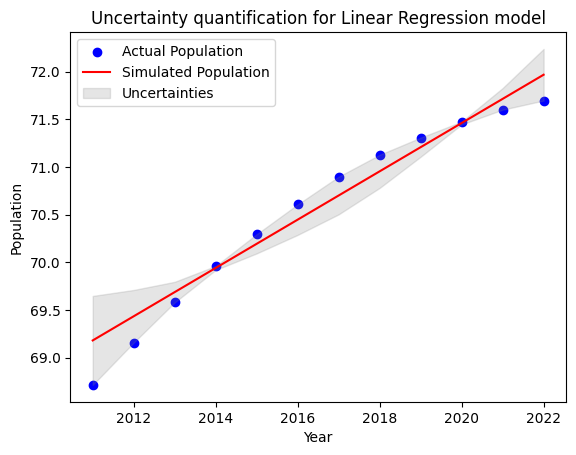

In [ ]:
# Plot the actual and simulated data
plt.scatter(act_years, pop_data, label='Actual Population', color='blue')
plt.plot(act_years, sim_pop_linreg_compare, label='Simulated Population', color='red')

# Add shaded regions for uncertainties
plt.fill_between(act_years, sim_pop_linreg_compare - np.array(U_each4), sim_pop_linreg_compare + np.array(U_each4), color='grey', alpha=0.2, label='Uncertainties')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Uncertainty quantification for Linear Regression model')
plt.legend()
plt.show()

**Simulation for Exponential Model**

In [ ]:
sim_years=[sy for sy in range(2011,2031)]
sim_pop_exp=[]

def exp_model(time):
    return N_01*np.exp(rate1*time)
    # return pop_data[0]*np.exp(rate1*time)

for t in range(len(sim_years)):
    sim_pop_exp.append(round(exp_model(t),6))

In [ ]:
exp_sim_columns=['Years','Time(t)','Actual Population','Population simulation using exponential model']
exp_sim_rows=[i for i in range(20)]
exp_sim=pd.DataFrame(index=exp_sim_rows,columns=exp_sim_columns)

for esim in range(20):
    exp_sim.iloc[esim,0]=sim_years[esim]
    exp_sim.iloc[esim,1]=esim
    if esim < len(pop_data):
        exp_sim.iloc[esim,2]=pop_data[esim]
    exp_sim.iloc[esim,3]=sim_pop_exp[esim]

exp_sim

Years Time(t) Actual Population  \
0   2011       0         68.712846   
1   2012       1         69.157023   
2   2013       2         69.578602   
3   2014       3         69.960943   
4   2015       4         70.294397   
5   2016       5         70.607037   
6   2017       6         70.898202   
7   2018       7         71.127802   
8   2019       8         71.307763   
9   2020       9         71.475664   
10  2021      10         71.601103   
11  2022      11          71.69703   
12  2023      12               NaN   
13  2024      13               NaN   
14  2025      14               NaN   
15  2026      15               NaN   
16  2027      16               NaN   
17  2028      17               NaN   
18  2029      18               NaN   
19  2030      19               NaN   

   Population simulation using exponential model  
0                                       69.05523  
1                                      69.320823  
2                                      69.587438  
3                                      69.855078  
4                                      70.123747  
5                                       70.39345  
6                                       70.66419  
7                                      70.935972  
8                                      71.208798  
9                                      71.482674  
10                                     71.757604  
11                                     72.033591  
12                                     72.310639  
13                                     72.588753  
14                                     72.867936  
15                                     73.148193  
16                                     73.429528  
17                                     73.711945  
18                                     73.995449  
19                                     74.280042

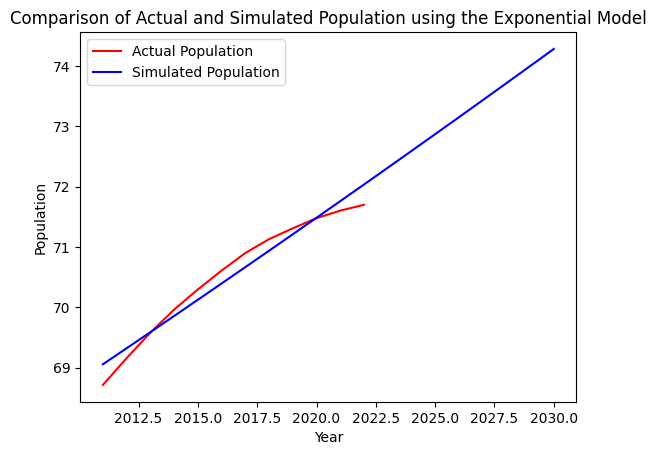

In [ ]:
act_years=[i for i in range(2011,2023)]
plt.plot(act_years, pop_data, label='Actual Population',color='red')
plt.plot(sim_years, sim_pop_exp, label='Simulated Population',color='blue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Comparison of Actual and Simulated Population using the Exponential Model')

# plt.ylim(68, 75)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# # Initialize the plot
# fig, ax = plt.subplots()
# ax.set_xlabel('Year')
# ax.set_ylabel('Population')
# ax.set_title('Comparison of Actual and Simulated Population using the Exponential Model')

# # Plot the initial data
# line_actual, = ax.plot(act_years, pop_data, label='Actual Population', color='blue')
# line_simulated, = ax.plot(sim_years, sim_pop_exp, label='Simulated Population', color='red')

# # Add legend
# ax.legend()

# # Update function for animation
# def update(frame):
#     # Update the data for the simulated population line
#     line_simulated.set_data(sim_years[:frame], sim_pop_exp[:frame])
#     return line_simulated,

# # Create the animation
# animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# # Save the animation as a GIF file
# animation.save('EXP_simulated.gif', writer=PillowWriter(fps=5))

# # Display the plot
# plt.show()

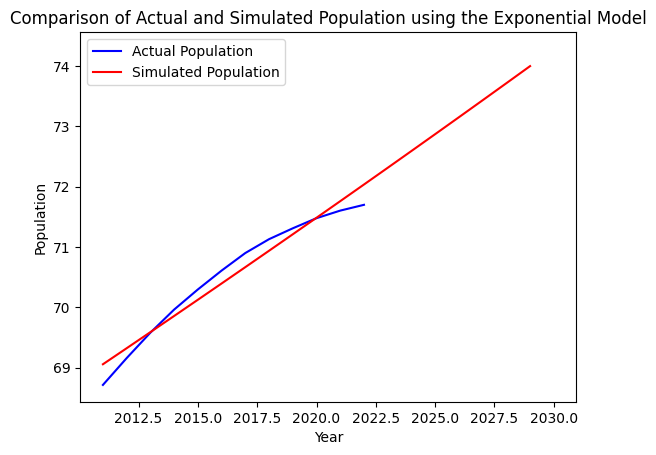

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Comparison of Actual and Simulated Population using the Exponential Model')

# Plot the initial data
line_actual, = ax.plot(act_years, pop_data, label='Actual Population', color='blue')
line_simulated, = ax.plot(sim_years, sim_pop_exp, label='Simulated Population', color='red')

# Add legend
ax.legend()

# Update function for animation
def update(frame):
    # Update the data for both actual and simulated population lines
    line_actual.set_data(act_years[:frame], pop_data[:frame])
    line_simulated.set_data(sim_years[:frame], sim_pop_exp[:frame])
    return line_actual, line_simulated

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('EXP_simulated1.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()


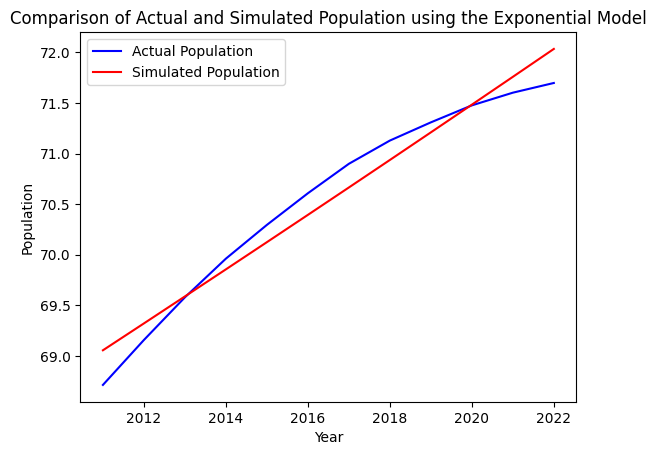

In [ ]:
act_years=[i for i in range(2011,2023)]
sim_pop_exp_compare=sim_pop_exp[:len(pop_data)]
plt.plot(act_years, pop_data, label='Actual Population', color='blue')
plt.plot(act_years, sim_pop_exp_compare, label='Simulated Population', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Comparison of Actual and Simulated Population using the Exponential Model')

# plt.ylim(68, 72)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

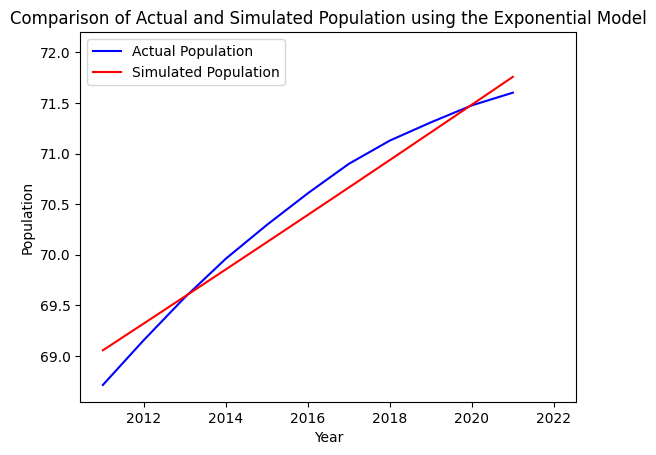

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Comparison of Actual and Simulated Population using the Exponential Model')

# Plot the initial data
line_actual, = ax.plot(act_years, pop_data, label='Actual Population', color='blue')
line_simulated, = ax.plot(act_years, sim_pop_exp_compare, label='Simulated Population', color='red')

# Add legend
ax.legend()

# Update function for animation
def update(frame):
    # Update the data for both actual and simulated population lines
    line_actual.set_data(act_years[:frame], pop_data[:frame])
    line_simulated.set_data(act_years[:frame], sim_pop_exp_compare[:frame])
    return line_actual, line_simulated

# Create the animation
animation = FuncAnimation(fig, update, frames=len(act_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('EXP_simulated2.gif', writer=PillowWriter(fps=2))

# Display the plot
plt.show()


In [ ]:
# # Reshape the data to fit the Linear Regression model
# X = act_years
# y_actual = act_years
# y_simulated = sim_pop_exp_compare

# # Fit a linear regression model to the actual data
# model_actual = LinearRegression()
# model_actual.fit(X, y_actual)

# # Fit a linear regression model to the simulated data
# model_simulated = LinearRegression()
# model_simulated.fit(X, y_simulated)

# # Predictions using the models
# y_actual_pred = model_actual.predict(X)
# y_simulated_pred = model_simulated.predict(X)

# # Plot the actual and simulated data
# plt.scatter(act_years, act_years, label='Actual Population', color='blue')
# plt.plot(act_years, y_actual_pred, label='Fitted Actual', color='green', linestyle='--')

# plt.scatter(sim_years, sim_pop_exp_compare, label='Simulated Population', color='red')
# plt.plot(act_years, y_simulated_pred, label='Fitted Simulated', color='orange', linestyle='--')

# plt.xlabel('Year')
# plt.ylabel('Population')
# plt.title('Fitting Simulated Data to Actual Data')
# plt.legend()
# plt.show()

In [ ]:
#Uncertainties Quantification for Exponential Model
summation=0
U_each=[]

for diffsq in range(12):
    U_each.append(np.sqrt((sim_pop_exp_compare[diffsq]-(pop_data[diffsq]))**2))
    # print(U_each)
    summation=summation+(sim_pop_exp_compare[diffsq]-np.mean(pop_data))**2
# U=np.sqrt(summation/(12*11))
U=(abs(np.mean(sim_pop_exp_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
print(f'Uncertainties Quantification shows a {"{:.6f}".format(U)}% lower and upper solution of uncertainties for the exponential model.')


Uncertainties Quantification shows a 0.000022% lower and upper solution of uncertainties for the exponential model.


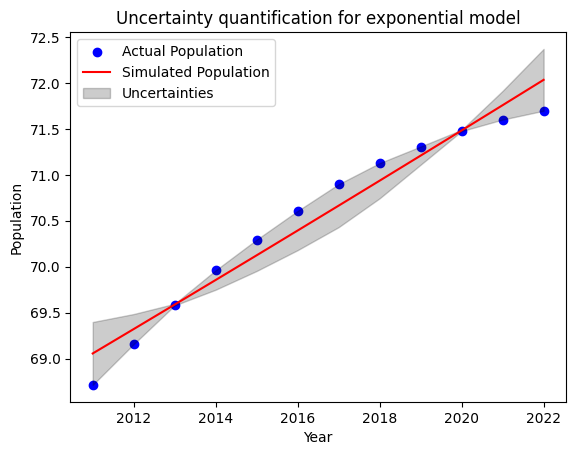

In [ ]:
# Plot the actual and simulated data
plt.scatter(act_years, pop_data, label='Actual Population', color='blue')
plt.plot(act_years, sim_pop_exp_compare, label='Simulated Population', color='red')

# Add shaded regions for uncertainties
plt.fill_between(act_years, sim_pop_exp_compare - np.array(U_each), sim_pop_exp_compare + np.array(U_each), color='black', alpha=0.2, label='Uncertainties')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Uncertainty quantification for exponential model')
plt.legend()
plt.show()

**Simulation for Logistic Model**

In [ ]:
# def logistic_equation(t, y, r, K):
#     P = y[0]
#     dP_dt = r * P * (1- P / K) 
#     return [dP_dt]

# t_start = 2011
# t_end = 2030

# P0= 68.67892116656719
# r=0.14046316867865516
# K=72.61626978134572

# t_points = np.linspace(t_start, t_end, num=20)

# solution = solve_ivp(logistic_equation, [t_start, t_end], [P0], args=(r, K), t_eval=t_points)

# population = solution.y[0]
# # print(population)

# # plt.plot(t_points, population)
# # plt.xlabel('Year')
# # plt.ylabel('Population')
# # plt.title('Population simulation using logistic model')
# # # plt.grid(True)
# # plt.show()

In [ ]:
sim_years=[sy for sy in range(2011,2031)]
sim_pop_logis=[]

def logis_model(time):
    return (K*N_02)/(N_02+((K-N_02)*np.exp(-rate2*time)))
    # return (K*pop_data[0])/(pop_data[0]+((K-pop_data[0])*np.exp(-rate2*time)))

for t in range(len(sim_years)):
    sim_pop_logis.append(round(logis_model(t),6))

In [ ]:
logis_sim_columns=['Years','Time(t)','Actual Population','Population simulation using logistic model']
logis_sim_rows=[i for i in range(20)]
logis_sim=pd.DataFrame(index=logis_sim_rows,columns=logis_sim_columns)

for esim in range(20):
    logis_sim.iloc[esim,0]=sim_years[esim]
    logis_sim.iloc[esim,1]=esim
    if esim < len(pop_data):
        logis_sim.iloc[esim,2]=pop_data[esim]
    logis_sim.iloc[esim,3]=sim_pop_logis[esim]

logis_sim

Years Time(t) Actual Population Population simulation using logistic model
0   2011       0         68.712846                                  68.679407
1   2012       1         69.157023                                  69.170687
2   2013       2         69.578602                                  69.603361
3   2014       3         69.960943                                  69.983783
4   2015       4         70.294397                                  70.317769
5   2016       5         70.607037                                  70.610609
6   2017       6         70.898202                                   70.86708
7   2018       7         71.127802                                  71.091475
8   2019       8         71.307763                                  71.287636
9   2020       9         71.475664                                  71.458985
10  2021      10         71.601103                                   71.60856
11  2022      11          71.69703                                  71.739053
12  2023      12               NaN                                  71.852841
13  2024      13               NaN                                  71.952018
14  2025      14               NaN                                  72.038427
15  2026      15               NaN                                  72.113687
16  2027      16               NaN                                  72.179217
17  2028      17               NaN                                  72.236261
18  2029      18               NaN                                  72.285906
19  2030      19               NaN                                  72.329104

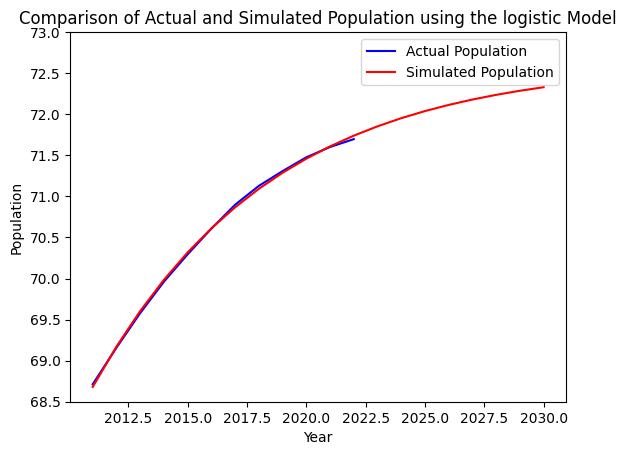

In [ ]:
act_years=[i for i in range(2011,2023)]
plt.plot(act_years, pop_data, label='Actual Population',color='blue')
plt.plot(sim_years, sim_pop_logis, label='Simulated Population',color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Comparison of Actual and Simulated Population using the logistic Model')

plt.ylim(68.5, 73)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

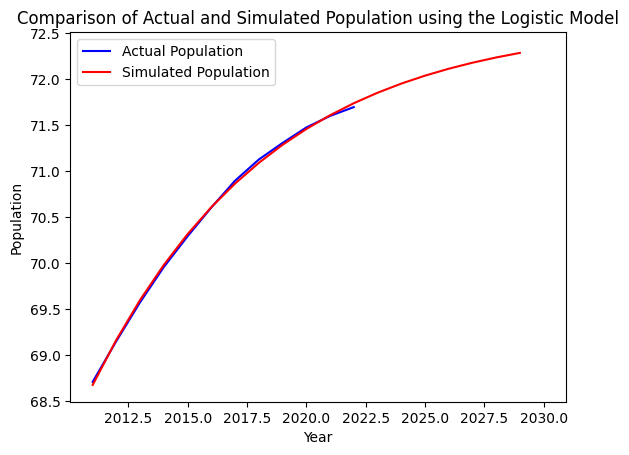

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Comparison of Actual and Simulated Population using the Logistic Model')

# Plot the initial data
line_actual, = ax.plot(act_years, pop_data, label='Actual Population', color='blue')
line_simulated, = ax.plot(sim_years, sim_pop_logis, label='Simulated Population', color='red')

# Add legend
ax.legend()

# Update function for animation
def update(frame):
    # Update the data for both actual and simulated population lines
    line_actual.set_data(act_years[:frame], pop_data[:frame])
    line_simulated.set_data(sim_years[:frame], sim_pop_logis[:frame])
    return line_actual, line_simulated

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('Logis_simulated1.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()


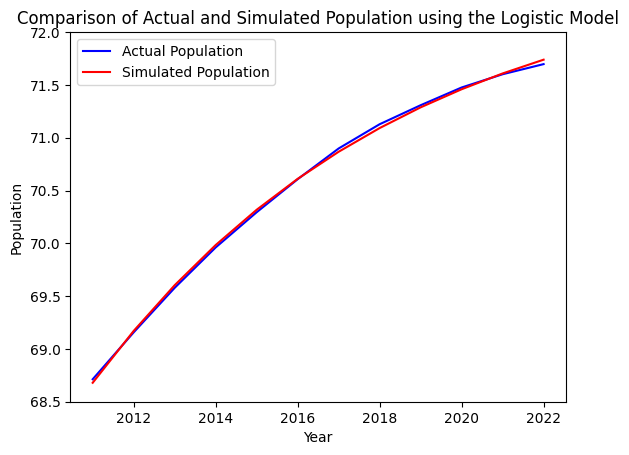

In [ ]:
act_years=[i for i in range(2011,2023)]
sim_pop_logis_compare=sim_pop_logis[:len(pop_data)]
plt.plot(act_years, pop_data, label='Actual Population',color='blue')
plt.plot(act_years, sim_pop_logis_compare, label='Simulated Population',color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Comparison of Actual and Simulated Population using the Logistic Model')

plt.ylim(68.5, 72)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

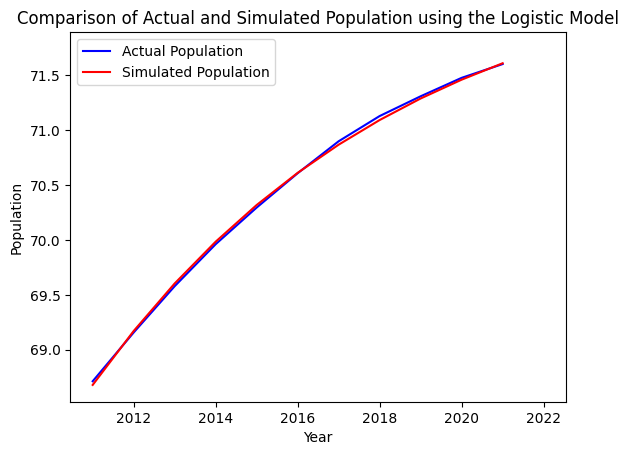

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Comparison of Actual and Simulated Population using the Logistic Model')

# Plot the initial data
line_actual, = ax.plot(act_years, pop_data, label='Actual Population', color='blue')
line_simulated, = ax.plot(act_years, sim_pop_logis_compare, label='Simulated Population', color='red')

# Add legend
ax.legend()

# Update function for animation
def update(frame):
    # Update the data for both actual and simulated population lines
    line_actual.set_data(act_years[:frame], pop_data[:frame])
    line_simulated.set_data(act_years[:frame], sim_pop_logis_compare[:frame])
    return line_actual, line_simulated

# Create the animation
animation = FuncAnimation(fig, update, frames=len(act_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('Logis_simulated2.gif', writer=PillowWriter(fps=2))

# Display the plot
plt.show()

In [ ]:
#Uncertainties Quantification for Exponential Model
summation2=0
U_each2=[]

for diffsq in range(12):
    U_each2.append(np.sqrt((sim_pop_logis_compare[diffsq]-(pop_data[diffsq]))**2))
    summation2=summation2+(sim_pop_logis_compare[diffsq]-np.mean(pop_data))**2
# U2=np.sqrt(summation2/(12*11))
U2=(abs(np.mean(sim_pop_logis_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
print(f'Uncertainties Quantification shows a {"{:.8f}".format(U2)}% lower and upper solution of uncertainties for the logistic model.')

Uncertainties Quantification shows a 0.00000083% lower and upper solution of uncertainties for the logistic model.


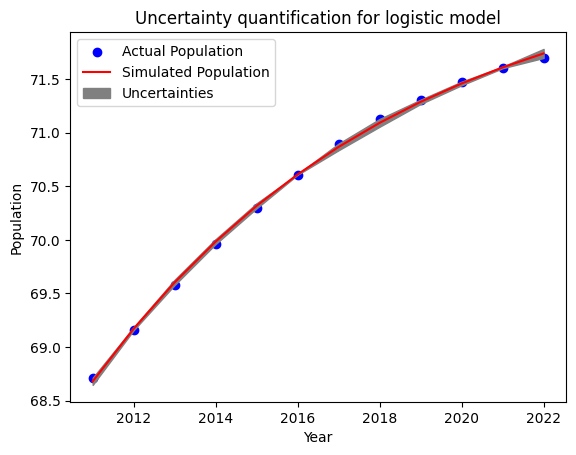

In [ ]:
# Plot the actual and simulated data
plt.scatter(act_years, pop_data, label='Actual Population', color='blue')
plt.plot(act_years, sim_pop_logis_compare, label='Simulated Population', color='red')

# Add shaded regions for uncertainties
plt.fill_between(act_years, sim_pop_logis_compare - np.array(U_each2), sim_pop_logis_compare + np.array(U_each2), color='grey', alpha=1, label='Uncertainties')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Uncertainty quantification for logistic model')
plt.legend()
plt.show()

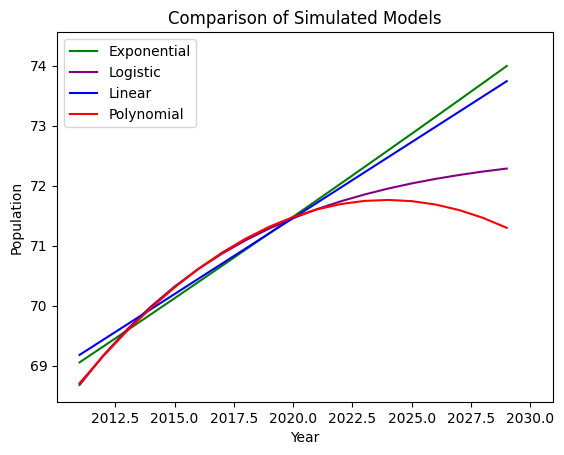

In [ ]:
fig, ax = plt.subplots()
line_exp, = ax.plot(sim_years, sim_pop_exp, label='Exponential', color='green')
line_logis, = ax.plot(sim_years, sim_pop_logis, label='Logistic', color='purple')
line_lin, = ax.plot(sim_years, sim_pop_linreg, label='Linear', color='blue')
line_poly, = ax.plot(sim_years, sim_pop_polyreg, label='Polynomial', color='red')

ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Comparison of Simulated Models')
ax.legend()

def update(frame):
    line_exp.set_data(sim_years[:frame], sim_pop_exp[:frame])
    line_logis.set_data(sim_years[:frame], sim_pop_logis[:frame])
    line_lin.set_data(sim_years[:frame], sim_pop_linreg[:frame])
    line_poly.set_data(sim_years[:frame], sim_pop_polyreg[:frame])
    return line_exp, line_logis, line_lin, line_poly

# Create an animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('population_models_comparison.gif', writer=PillowWriter(fps=2))

# Display the plot
plt.show()

In [ ]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(sim_pop_exp, sim_pop_logis, sim_pop_polyreg, sim_pop_linreg)

# Print the results
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.1  # Significance level
if p_value < alpha:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

kruskal_wallis_statistic, p_value_kruskal_wallis = kruskal(sim_pop_exp, sim_pop_logis, sim_pop_polyreg, sim_pop_linreg)

print(f'Kruskal-Wallis Statistic: {kruskal_wallis_statistic}')
print(f'Kruskal-Wallis p-value: {p_value_kruskal_wallis}')

if p_value_kruskal_wallis < alpha:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

friedman_statistic, p_value_friedman= friedmanchisquare(sim_pop_exp, sim_pop_logis, sim_pop_polyreg, sim_pop_linreg)

print(f'Friedman Statistic: {friedman_statistic}')
print(f'Friedman p-value: {p_value_friedman}')

if p_value_friedman < alpha:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

F-Statistic: 1.2920010677313623
P-Value: 0.2833010703503312
The difference between the models is not statistically significant.
Kruskal-Wallis Statistic: 3.266296296296275
Kruskal-Wallis p-value: 0.35236118758670587
The difference between the models is not statistically significant.
Friedman Statistic: 7.079999999999984
Friedman p-value: 0.06939114413465529
The difference between the models is statistically significant.


Given these results, there is some discrepancy between the Friedman test and the other tests. The Friedman test suggests that there may be a statistically significant difference among the models, while the F-Statistic and Kruskal-Wallis tests do not support significant differences.

Based on the results of the F-test and Kruskal-Wallis test, there is no statistically significant difference in the overall performance of the four models. However, the Friedman test suggests that there may be some variation in their predictions.


In [ ]:
t_stat_N_01, p_value_N_01 = stats.ttest_1samp(sim_pop_exp, N_01)
t_stat_rate1, p_value_rate1 = stats.ttest_1samp(sim_pop_exp, rate1)

# Print results for the exponential model
print(f"T-test for N_0: t-statistic = {t_stat_N_01}, p-value = {p_value_N_01}", ', This suggest that initial population is statistically significant.')
print(f"T-test for rate: t-statistic = {t_stat_rate1}, p-value = {p_value_rate1}", ', This suggest that growth rate is highly statistically significant.')

T-test for N_0: t-statistic = 7.098818946051548, p-value = 9.429006179769324e-07 , This suggest that initial population is statistically significant.
T-test for rate: t-statistic = 196.92137739600872, p-value = 6.479201534028836e-33 , This suggest that growth rate is highly statistically significant.


In [ ]:
t_stat_N_02, p_value_N_02 = stats.ttest_1samp(sim_pop_logis, N_02)
t_stat_K, p_value_K = stats.ttest_1samp(sim_pop_logis, K)
t_stat_rate2, p_value_rate2 = stats.ttest_1samp(sim_pop_logis, rate2)

# Print results for the logistic model
print(f"T-test for N_0: t-statistic = {t_stat_N_02}, p-value = {p_value_N_02}", ', This suggest that initial population is statistically significant.')
print(f"T-test for K: t-statistic = {t_stat_K}, p-value = {p_value_K}", ', This suggest that carrying capacity is statistically significant.')
print(f"T-test for rate: t-statistic = {t_stat_rate2}, p-value = {p_value_rate2}", ', This suggest that growth rate is highly statistically significant.')

T-test for N_0: t-statistic = 10.063801372899018, p-value = 4.7500691263640536e-09 , This suggest that initial population is statistically significant.
T-test for K: t-statistic = -5.845133060013962, p-value = 1.2492750585018114e-05 , This suggest that carrying capacity is statistically significant.
T-test for rate: t-statistic = 286.97851986237714, p-value = 5.069508503182603e-36 , This suggest that growth rate is highly statistically significant.


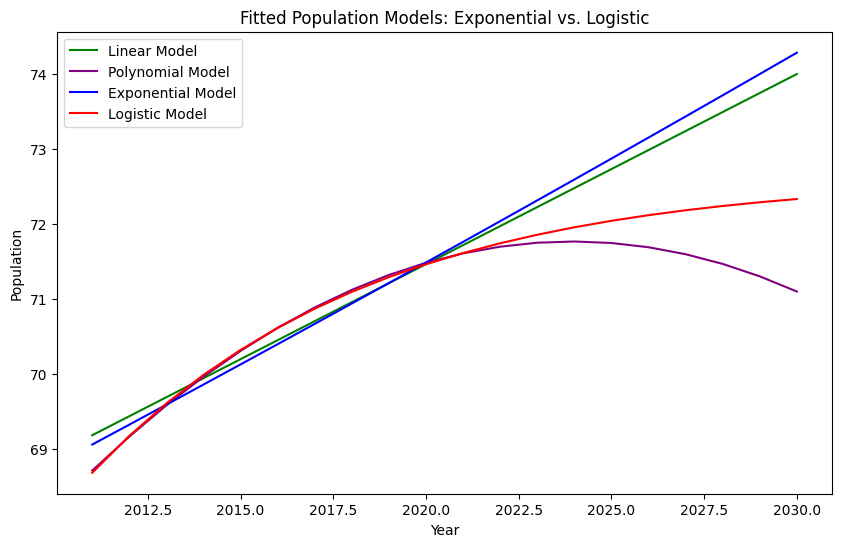

In [ ]:
# Plotting the fitted models
plt.figure(figsize=(10, 6))

# Linear model
plt.plot(sim_years, sim_pop_linreg, label='Linear Model', color='green')

# Polynomial model
plt.plot(sim_years, sim_pop_polyreg, label='Polynomial Model', color='purple')

# Exponential model
plt.plot(sim_years, sim_pop_exp, label='Exponential Model', color='blue')

# Logistic model
plt.plot(sim_years, sim_pop_logis, label='Logistic Model', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Fitted Population Models: Exponential vs. Logistic')

# plt.ylim(65, 75)

# Adding a legend
plt.legend()

# Display the plot
plt.show()


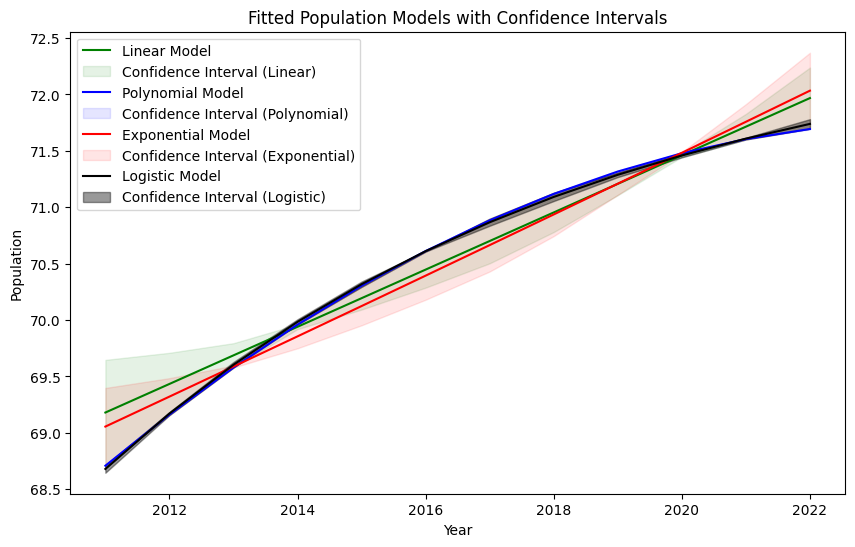

In [ ]:
plt.figure(figsize=(10, 6))

# Linear model
plt.plot(act_years, sim_pop_linreg_compare, label='Linear Model', color='green')
plt.fill_between(act_years, sim_pop_linreg_compare - np.array(U_each4), sim_pop_linreg_compare + np.array(U_each4), color='green', alpha=0.1, label='Confidence Interval (Linear)')

# Polynomial model
plt.plot(act_years, sim_pop_polyreg_compare, label='Polynomial Model', color='blue')
plt.fill_between(act_years, sim_pop_polyreg_compare - np.array(U_each3), sim_pop_polyreg_compare + np.array(U_each3), color='blue', alpha=0.1, label='Confidence Interval (Polynomial)')


# Exponential model
plt.plot(act_years, sim_pop_exp_compare, label='Exponential Model', color='red')
plt.fill_between(act_years, sim_pop_exp_compare - np.array(U_each), sim_pop_exp_compare + np.array(U_each), color='red', alpha=0.1, label='Confidence Interval (Exponential)')

# Logistic model
plt.plot(act_years, sim_pop_logis_compare, label='Logistic Model', color='black')
plt.fill_between(act_years, sim_pop_logis_compare - np.array(U_each2), sim_pop_logis_compare + np.array(U_each2), color='black', alpha=0.4, label='Confidence Interval (Logistic)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Fitted Population Models with Confidence Intervals')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


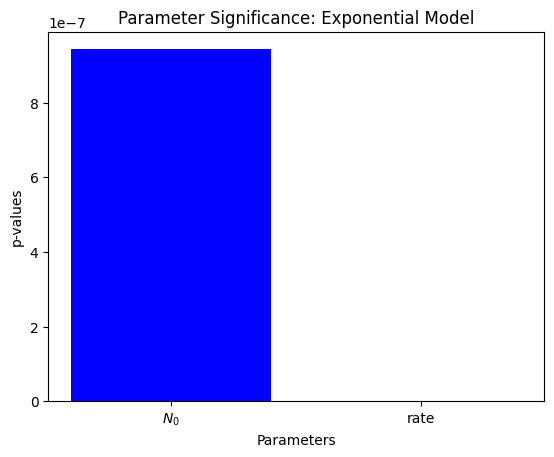

In [ ]:
# plt.figure(figsize=(8, 6))

# Bar chart for the exponential model
plt.bar(['$N_0$', 'rate'], [p_value_N_01, p_value_rate1], color='blue')
plt.xlabel('Parameters')
plt.ylabel('p-values')
plt.title('Parameter Significance: Exponential Model')

# Display the plot
plt.show()


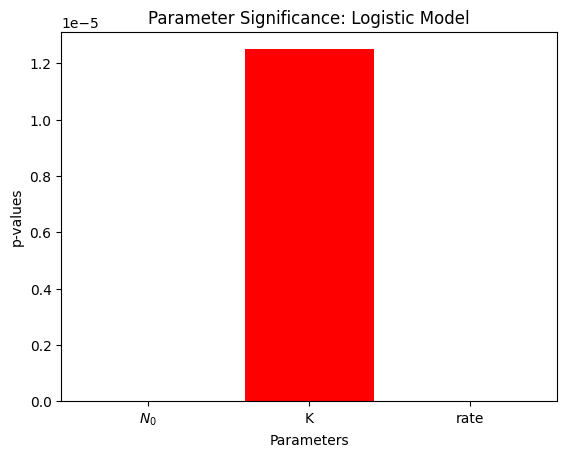

In [ ]:
# plt.figure(figsize=(8, 6))

# Bar chart for the logistic model
plt.bar(['$N_0$', 'K', 'rate'], [p_value_N_02, p_value_K, p_value_rate2], color='red')
plt.xlabel('Parameters')
plt.ylabel('p-values')
plt.title('Parameter Significance: Logistic Model')

# Display the plot
plt.show()

In both models, all parameters have very small p-values, indicating that they are statistically significant. This suggests that the parameters (N_01, rate1, N_02, K, rate2) have a significant impact on the models, and the models are not just due to random chance.

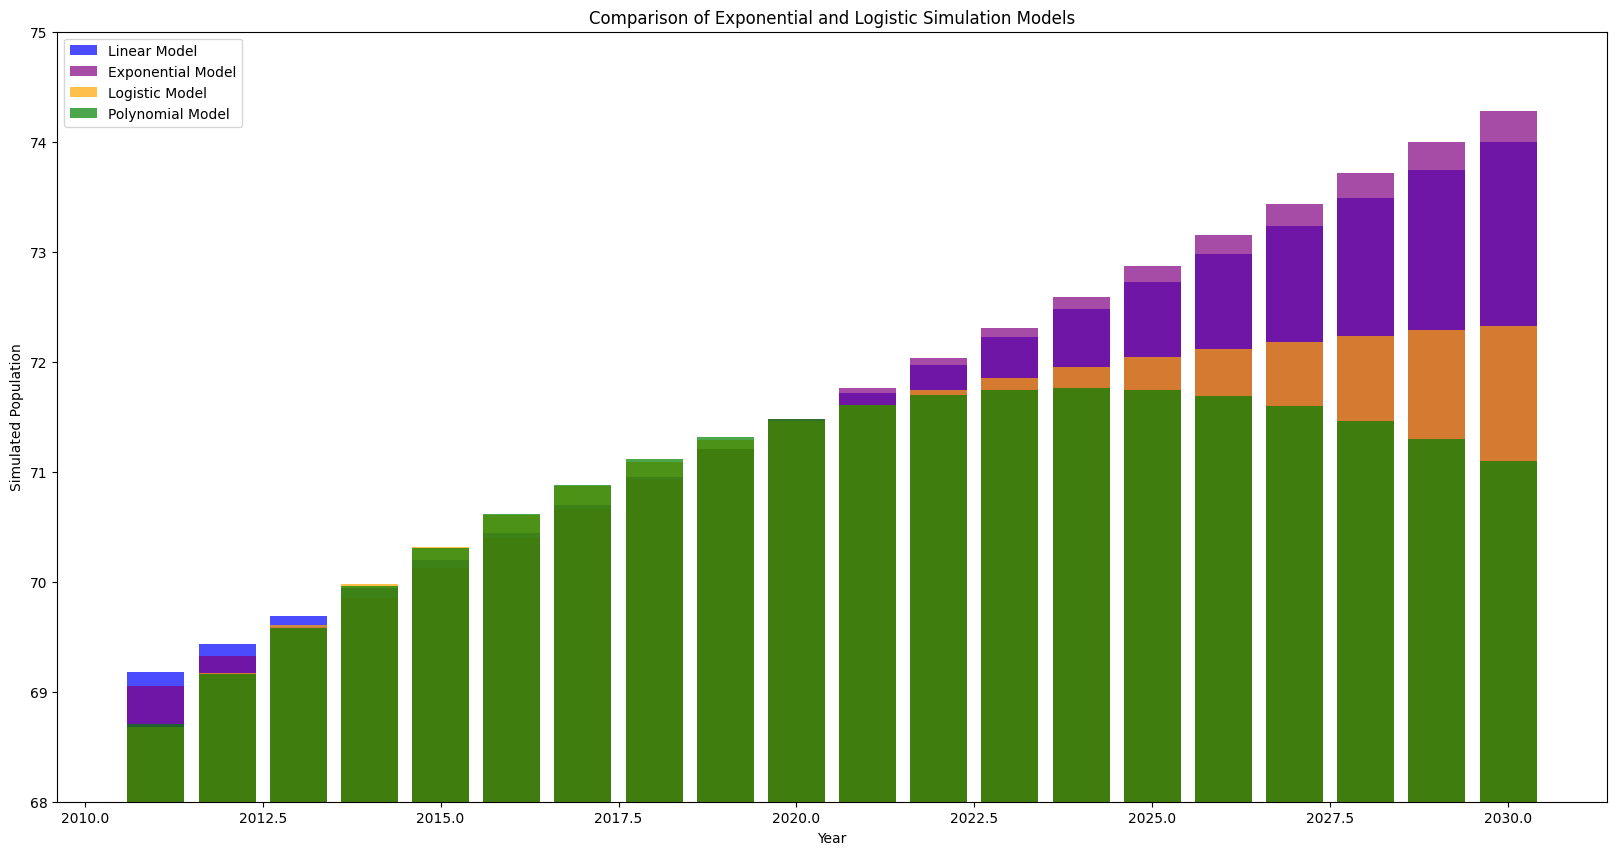

In [ ]:
# Set the width of the bars
bar_width = 0.4
plt.figure(figsize=(20, 10))

# Plotting the bar plot
plt.bar(sim_years, sim_pop_linreg, label='Linear Model', alpha=0.7,color='blue')
plt.bar(sim_years, sim_pop_exp, label='Exponential Model', alpha=0.7, color='purple')
plt.bar(sim_years, sim_pop_logis, label='Logistic Model', alpha=0.7,color='orange')
plt.bar(sim_years, sim_pop_polyreg, label='Polynomial Model', alpha=0.7,color='green')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Simulated Population')
plt.title('Comparison of Exponential and Logistic Simulation Models')

plt.ylim(68, 75)

# Adding legend
plt.legend()

# Display the plot
plt.show()


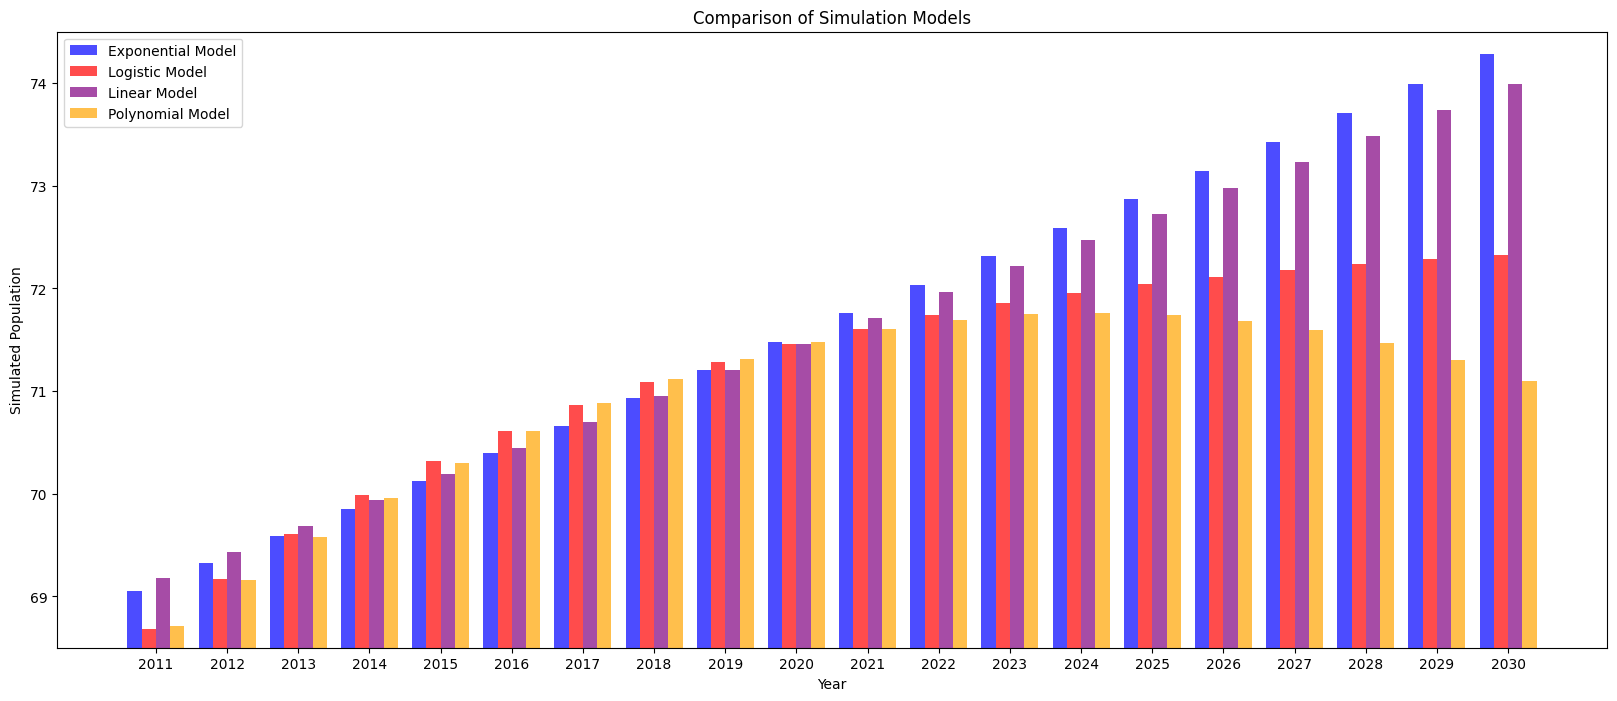

In [ ]:
# Set the width of the bars
bar_width = 0.2
plt.figure(figsize=(20,8))

# Calculate the positions for the bars
bar_positions_exp = np.arange(len(sim_years))
bar_positions_logis = bar_positions_exp + bar_width
bar_positions_linreg = bar_positions_logis + bar_width
bar_positions_polyreg = bar_positions_linreg + bar_width

# Plotting the side-by-side bar plot
plt.bar(bar_positions_exp, sim_pop_exp, width=bar_width, label='Exponential Model', alpha=0.7, color='blue')
plt.bar(bar_positions_logis, sim_pop_logis, width=bar_width, label='Logistic Model', alpha=0.7, color='red')
plt.bar(bar_positions_linreg, sim_pop_linreg, width=bar_width, label='Linear Model', alpha=0.7, color='purple')
plt.bar(bar_positions_polyreg, sim_pop_polyreg, width=bar_width, label='Polynomial Model', alpha=0.7, color='orange')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Simulated Population')
plt.title('Comparison of Simulation Models')

# Adding x-axis ticks and labels
plt.xticks(bar_positions_polyreg-0.3, sim_years)

plt.ylim(68.5, 74.5)

# Adding legend
plt.legend()

# Display the plot
plt.show()


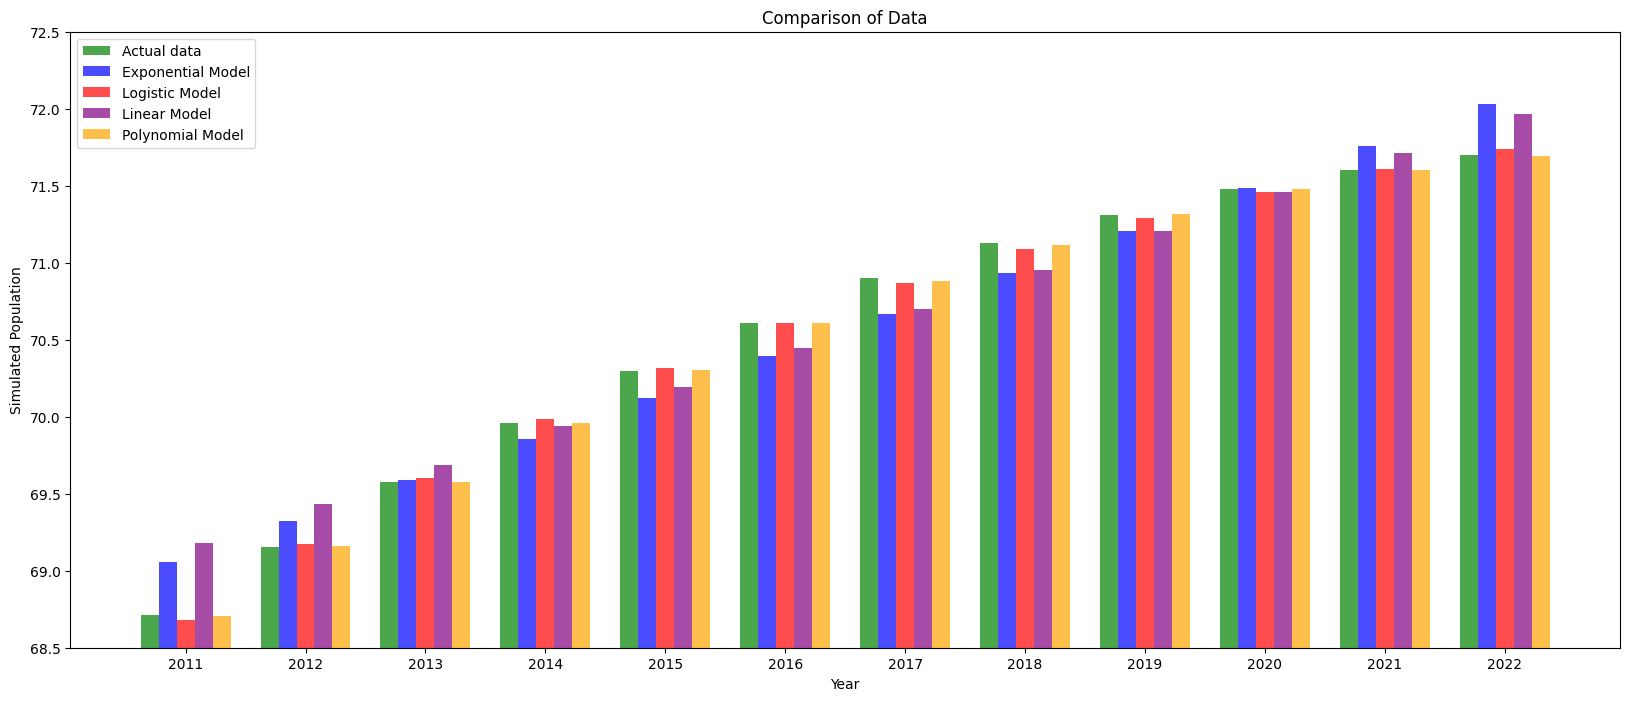

In [ ]:
# Set the width of the bars
bar_width = 0.15
plt.figure(figsize=(20,8))

# Calculate the positions for the bars
bar_positions_act = np.arange(len(years))
bar_positions_exp = bar_positions_act + bar_width
bar_positions_logis = bar_positions_exp + bar_width
bar_positions_linreg = bar_positions_logis + bar_width
bar_positions_polyreg = bar_positions_linreg + bar_width

plt.bar(bar_positions_act, pop_data, width=bar_width, label='Actual data', alpha=0.7, color='green')
plt.bar(bar_positions_exp, sim_pop_exp_compare, width=bar_width, label='Exponential Model', alpha=0.7, color='blue')
plt.bar(bar_positions_logis, sim_pop_logis_compare, width=bar_width, label='Logistic Model', alpha=0.7, color='red')
plt.bar(bar_positions_linreg, sim_pop_linreg_compare, width=bar_width, label='Linear Model', alpha=0.7, color='purple')
plt.bar(bar_positions_polyreg, sim_pop_polyreg_compare, width=bar_width, label='Polynomial Model', alpha=0.7, color='orange')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Simulated Population')
plt.title('Comparison of Data')

# Adding x-axis ticks and labels
plt.xticks(bar_positions_polyreg-0.3, years)

plt.ylim(68.5, 72.5)

# Adding legend
plt.legend()

# Display the plot
plt.show()